In [1]:
using Pkg
Pkg.update()
# Pkg.add("LSODA")

# ENV["GRDIR"]=""
# Pkg.build("GR")
# using Conda
# Conda.add("Seaborn")
# Pkg.update()
# Pkg.add("https://github.com/tanhevg/GpABC.jl")

  Updating registry at `C:\Users\leann\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % [=====>                                   ]  11.9 % [==============>                          ]  33.3 %====================>                    ]  47.6 %>          ]  73.8 %.6 %  Updating git-repo `https://github.com/tanhevg/GpABC.jl`
 Resolving package versions...
 Installed Suppressor ────────────── v0.2.1
 Installed MLJModelInterface ─────── v1.4.2
 Installed EllipticalSliceSampling ─ v0.4.7
 Installed Functors ──────────────── v0.2.8
 Installed InitialValues ─────────── v0.3.1
 Installed Roots ─────────────────── v1.3.15
 Installed BangBang ──────────────── v0.3.36
 Installed Tracker ───────────────── v0.2.19
 Installed ArgCheck ──────────────── v2.3.0
 Installed AdvancedVI ────────────── v0.1.4
 Installed MicroCollections ──────── v0.1.2
 Installed AbstractMCMC ──────────── v3.3.1
 

In [1]:
ENV["GKS_ENCODING"]="utf8"
using GpABC,OrdinaryDiffEq, Distances, Distributions, Plots, StatsBase, Printf, ODE, DifferentialEquations, Statistics, ModelingToolkit#, CSV
using DelimitedFiles, StatsPlots, Dates, KernelDensity, PyCall, PyPlot, GR, RecipesBase,Conda, LSODA
import Base.Iterators
@pyimport seaborn as sns
include("setup_ABC.jl") #imports the models and initial values
pyplot()

function log_euclidean(x,y)
    output = sqrt(sum((log10.(x.+0.00001) - log10.(y.+0.00001)) .^ 2))
    return (output/size(x)[1]) #average by the length of the vector
end

┌ Info: Precompiling GpABC [e850a1a4-d859-11e8-3d54-a195e6d045d3]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for th

log_euclidean (generic function with 1 method)

In [2]:
global k_cat_AA = 50.
global k_a_NH4 = 50. 
global k_NH4 = 50.
global k_x = 50.
global k_a = 50.
global a_per_AA= 2.
global NH4_per_AA = 2.
global sub_inflow = 5e9
global NH4_inflow = 5e9
global k_ribo_a = 10.0
global k_ribo_a_AA = 1000.0
global k_ribo_AA_a = 10000.0;


In [3]:
burn_in_prob_AA = ODEProblem(AA_simple, init, (0.,10000.0)) #set up the burn in problem
starting_NH4 = init[15]
println("burning in AA model")
global sol1_with_AA = solve(burn_in_prob_AA, saveat = 1.)
step_num = size(sol1_with_AA,2)
final_state_with_AA =sol1_with_AA[step_num]; #collect the end state after burning in to use as new initial values
# final_state_with_AA[1]= 1e12
println("running AA model")   
global AA_prob = ODEProblem(AA_simple_with_popn_growth, final_state_with_AA, (10000.0,20000.0)) #the problem to run ABC on using the burned in initial values
global sol2_with_AA = solve(AA_prob, saveat = 1.0)
println("successfully run AA model with params $k_cat_AA, $k_a_NH4, $k_NH4, $k_x, $k_a")
####################################
burn_in_prob_original = ODEProblem(original_model, init_original, (0.,10000.0)) #set up the burn in problem
println("burning in original model")
sol1 = solve(burn_in_prob_original, saveat = 1.)
step_num = size(sol1,2)
final_state_no_AA =sol1[step_num]; #collect the end state after burning in to use as new initial values
# final_state_no_AA[1]= 1e12
println("running original model")
# global a_dilution_tracker_no_AA=[]
original_prob = ODEProblem(original_model_popn_growth, final_state_no_AA, (10000.0,20000.0)) #the problem to run ABC on using the burned in initial values
global sol2_original_model = solve(original_prob, saveat = 1.,)
println("successfully run original model")

burning in AA model
running AA model
successfully run AA model with params 50.0, 50.0, 50.0, 50.0, 50.0
burning in original model
running original model
successfully run original model


In [4]:
println("initialising trackers")
global popn_tracker_original = []
global substrate_tracker_original = []
global ATP_tracker_original = []
global rmr_tracker_original=[]
global em_tracker_original = []
global et_tracker_original=[]
global q_tracker_original=[]
global total_r_tracker_original=[]
global total_proteome_tracker_original=[]
global si_tracker_original = []
global nucat_tracker_original =[]
global ttrate_tracker_original = []
global gamma_tracker_original= []                    
global a_dilution_tracker_original= []                    

                    
                    
                    
global popn_tracker_with_AA = []
global substrate_tracker_with_AA = []
global ATP_tracker_with_AA = []
global rmr_tracker_with_AA=[]
global AA_tracker_with_AA=[]
global AA_prot_tracker = []
global em_tracker_with_AA = []
global et_tracker_with_AA=[]
global q_tracker_with_AA=[]
global total_r_tracker_with_AA=[]
global total_proteome_tracker_with_AA=[]
global si_tracker_with_AA = []
global nucat_tracker_with_AA =[]
global ttrate_tracker_with_AA = []
global gamma_tracker_with_AA= []                    
global new_AA_tracker = []
global AA_a_use_tracker_with_AA=[]
global a_dilution_tracker_with_AA=[]
global AA_dilution_tracker= []
global NH4_tracker = []

println("pushing into trackers")
try for i in (1:10001)
    push!(popn_tracker_original,max(sol1.u[i][20],0.0))
    push!(substrate_tracker_original,max(sol1.u[i][1],0.0))
    push!(ATP_tracker_original,max(sol1.u[i][21],0.0))
    push!(rmr_tracker_original,max(sol1.u[i][2],0.0))
    push!(em_tracker_original, max(sol1.u[i][3],0.0))
    push!(et_tracker_original, max(sol1.u[i][6],0.0))
    push!(q_tracker_original, max(sol1.u[i][10],0.0))
    total_ribo_no_AA=sol1.u[i][2]+sol1.u[i][5]+sol1.u[i][4]+sol1[i][7]+sol1.u[i][14]    
    push!(total_r_tracker_original, max(total_ribo_no_AA,0.0))
    push!(total_proteome_tracker_original, max(sol1.u[i][3]+sol1.u[i][6]+sol1.u[i][10]+total_ribo_no_AA,0.0))
    push!(si_tracker_original, max(sol1.u[i][11],0.0))
    push!(nucat_tracker_original,find_nucat((sol1.u[i][3]),(sol1.u[i][11])))                            
    ttrate_original= find_ttrate_no_AA(sol1.u[i][4],sol1.u[i][2],sol1.u[i][5],sol1.u[i][7],sol1.u[i][17],sol1.u[i][25],sol1.u[i][21]) 
    push!(ttrate_tracker_original, ttrate_original)
    push!(gamma_tracker_original, find_gamma_no_AA(sol1.u[i][21]))
    push!(a_dilution_tracker_original, (ttrate_original/M)*sol1.u[i][21])

    
    push!(popn_tracker_with_AA,max(sol1_with_AA.u[i][20],0.0))
    push!(substrate_tracker_with_AA,max(sol1_with_AA.u[i][1],0.0))
    push!(ATP_tracker_with_AA,max(sol1_with_AA.u[i][21],0.0))
    push!(rmr_tracker_with_AA,max(sol1_with_AA.u[i][2],0.0))
    push!(AA_tracker_with_AA,max(sol1_with_AA.u[i][22],0.0))
    push!(AA_prot_tracker, max(sol1_with_AA.u[i][23],0.0))
    push!(em_tracker_with_AA, max(sol1_with_AA.u[i][3],0.0))
    push!(et_tracker_with_AA, max(sol1_with_AA.u[i][6],0.0))
    push!(q_tracker_with_AA, max(sol1_with_AA.u[i][10],0.0))
    total_ribo_AA=sol1_with_AA.u[i][2]+sol1_with_AA.u[i][5]+sol1_with_AA.u[i][4]+sol1_with_AA[i][7]+sol1_with_AA.u[i][25]+sol1_with_AA.u[i][14]
    push!(total_r_tracker_with_AA, max(total_ribo_AA,0.0))
    push!(total_proteome_tracker_with_AA, max(sol1_with_AA.u[i][3]+sol1_with_AA.u[i][6]+sol1_with_AA.u[i][10]+total_ribo_AA+sol1_with_AA.u[i][23],0.0))
    push!(si_tracker_with_AA, max(sol1_with_AA.u[i][11],0.0))
    push!(nucat_tracker_with_AA,find_nucat((sol1_with_AA.u[i][3]),(sol1_with_AA.u[i][11])))
    ttrate_with_AA =find_ttrate_with_AA(sol1_with_AA.u[i][4],sol1_with_AA.u[i][2],sol1_with_AA.u[i][5],sol1_with_AA.u[i][7],sol1_with_AA.u[i][17],sol1_with_AA.u[i][25],sol1_with_AA.u[i][21],sol1_with_AA.u[i][22])
    push!(ttrate_tracker_with_AA, ttrate_with_AA)
    push!(gamma_tracker_with_AA, find_gamma_with_AA(sol1_with_AA.u[i][21],sol1_with_AA.u[i][22]))
    new_AA = find_new_AA(sol1_with_AA.u[i][21],sol1_with_AA.u[i][15],sol1_with_AA.u[i][22],sol1_with_AA.u[i][23])
    push!(new_AA_tracker, new_AA)
    push!(AA_a_use_tracker_with_AA, new_AA*a_per_AA)
    push!(a_dilution_tracker_with_AA, (ttrate_with_AA/M)*sol1_with_AA.u[i][21])
    push!(AA_dilution_tracker, (ttrate_with_AA/M)*sol1_with_AA.u[i][22])
    push!(NH4_tracker, sol1_with_AA.u[i][15])
end
catch e
println("error in push trackers 1")
println("error is $e")
end
        
try for i in (1:10001)
    push!(popn_tracker_original,max(sol2_original_model.u[i][20],0.0))
    push!(substrate_tracker_original,max(sol2_original_model.u[i][1],0.0))
    push!(ATP_tracker_original,max(sol2_original_model.u[i][21],0.0))
    push!(rmr_tracker_original,max(sol2_original_model.u[i][2],0.0))
    push!(em_tracker_original, max(sol2_original_model.u[i][3],0.0))
    push!(et_tracker_original, max(sol2_original_model.u[i][6],0.0))
    push!(q_tracker_original, max(sol2_original_model.u[i][10],0.0))
    total_ribo_no_AA=sol2_original_model.u[i][2]+sol2_original_model.u[i][5]+sol2_original_model.u[i][4]+sol2_original_model[i][7]+sol2_original_model.u[i][14]    
    push!(total_r_tracker_original, max(total_ribo_no_AA,0.0))
    push!(total_proteome_tracker_original, max(sol2_original_model.u[i][3]+sol2_original_model.u[i][6]+sol2_original_model.u[i][10]+total_ribo_no_AA,0.0))
    push!(si_tracker_original, max(sol2_original_model.u[i][11],0.0))
    push!(nucat_tracker_original,find_nucat((sol2_original_model.u[i][3]),(sol2_original_model.u[i][11])))                            
    ttrate_original= find_ttrate_no_AA(sol2_original_model.u[i][4],sol2_original_model.u[i][2],sol2_original_model.u[i][5],sol2_original_model.u[i][7],sol2_original_model.u[i][17],sol2_original_model.u[i][25],sol2_original_model.u[i][21]) 
    push!(ttrate_tracker_original, ttrate_original)
    push!(gamma_tracker_original, find_gamma_no_AA(sol2_original_model.u[i][21]))
    push!(a_dilution_tracker_original, (ttrate_original/M)*sol2_original_model.u[i][21])
                            
                                                        
    push!(popn_tracker_with_AA,max(sol2_with_AA.u[i][20],0.0))
    push!(substrate_tracker_with_AA,max(sol2_with_AA.u[i][1],0.0))
    push!(ATP_tracker_with_AA,max(sol2_with_AA.u[i][21],0.0))
    push!(rmr_tracker_with_AA,max(sol2_with_AA.u[i][2],0.0))
    push!(AA_tracker_with_AA,max(sol2_with_AA.u[i][22],0.0))
    push!(AA_prot_tracker, max(sol2_with_AA.u[i][23],0.0))
    push!(em_tracker_with_AA, max(sol2_with_AA.u[i][3],0.0))
    push!(et_tracker_with_AA, max(sol2_with_AA.u[i][6],0.0))
    push!(q_tracker_with_AA, max(sol2_with_AA.u[i][10],0.0))
    total_ribo_AA=sol2_with_AA.u[i][2]+sol2_with_AA.u[i][5]+sol2_with_AA.u[i][4]+sol2_with_AA[i][7]+sol2_with_AA.u[i][25]+sol2_with_AA.u[i][14]
    push!(total_r_tracker_with_AA, max(total_ribo_AA,0.0))
    push!(total_proteome_tracker_with_AA, max(sol2_with_AA.u[i][3]+sol2_with_AA.u[i][6]+sol2_with_AA.u[i][10]+total_ribo_AA+sol2_with_AA.u[i][23],0.0))
    push!(si_tracker_with_AA, max(sol2_with_AA.u[i][11],0.0))
    push!(nucat_tracker_with_AA,find_nucat((sol2_with_AA.u[i][3]),(sol2_with_AA.u[i][11])))
    ttrate_with_AA =find_ttrate_with_AA(sol2_with_AA.u[i][4],sol2_with_AA.u[i][2],sol2_with_AA.u[i][5],sol2_with_AA.u[i][7],sol2_with_AA.u[i][17],sol2_with_AA.u[i][25],sol2_with_AA.u[i][21],sol2_with_AA.u[i][22])
    push!(ttrate_tracker_with_AA, ttrate_with_AA)
    push!(gamma_tracker_with_AA, find_gamma_with_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][22]))
    new_AA = find_new_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][15],sol2_with_AA.u[i][22],sol2_with_AA.u[i][23])
    push!(new_AA_tracker, new_AA)
    push!(AA_a_use_tracker_with_AA, new_AA*a_per_AA)
    push!(a_dilution_tracker_with_AA, (ttrate_with_AA/M)*sol2_with_AA.u[i][21])
    push!(AA_dilution_tracker, (ttrate_with_AA/M)*sol2_with_AA.u[i][22])
    push!(NH4_tracker, sol2_with_AA.u[i][15])
end
catch e
println("error in push trackers 2")
println("error is $e")
end
println("trackers ready to plot")

initialising trackers
pushing into trackers
trackers ready to plot


plotting

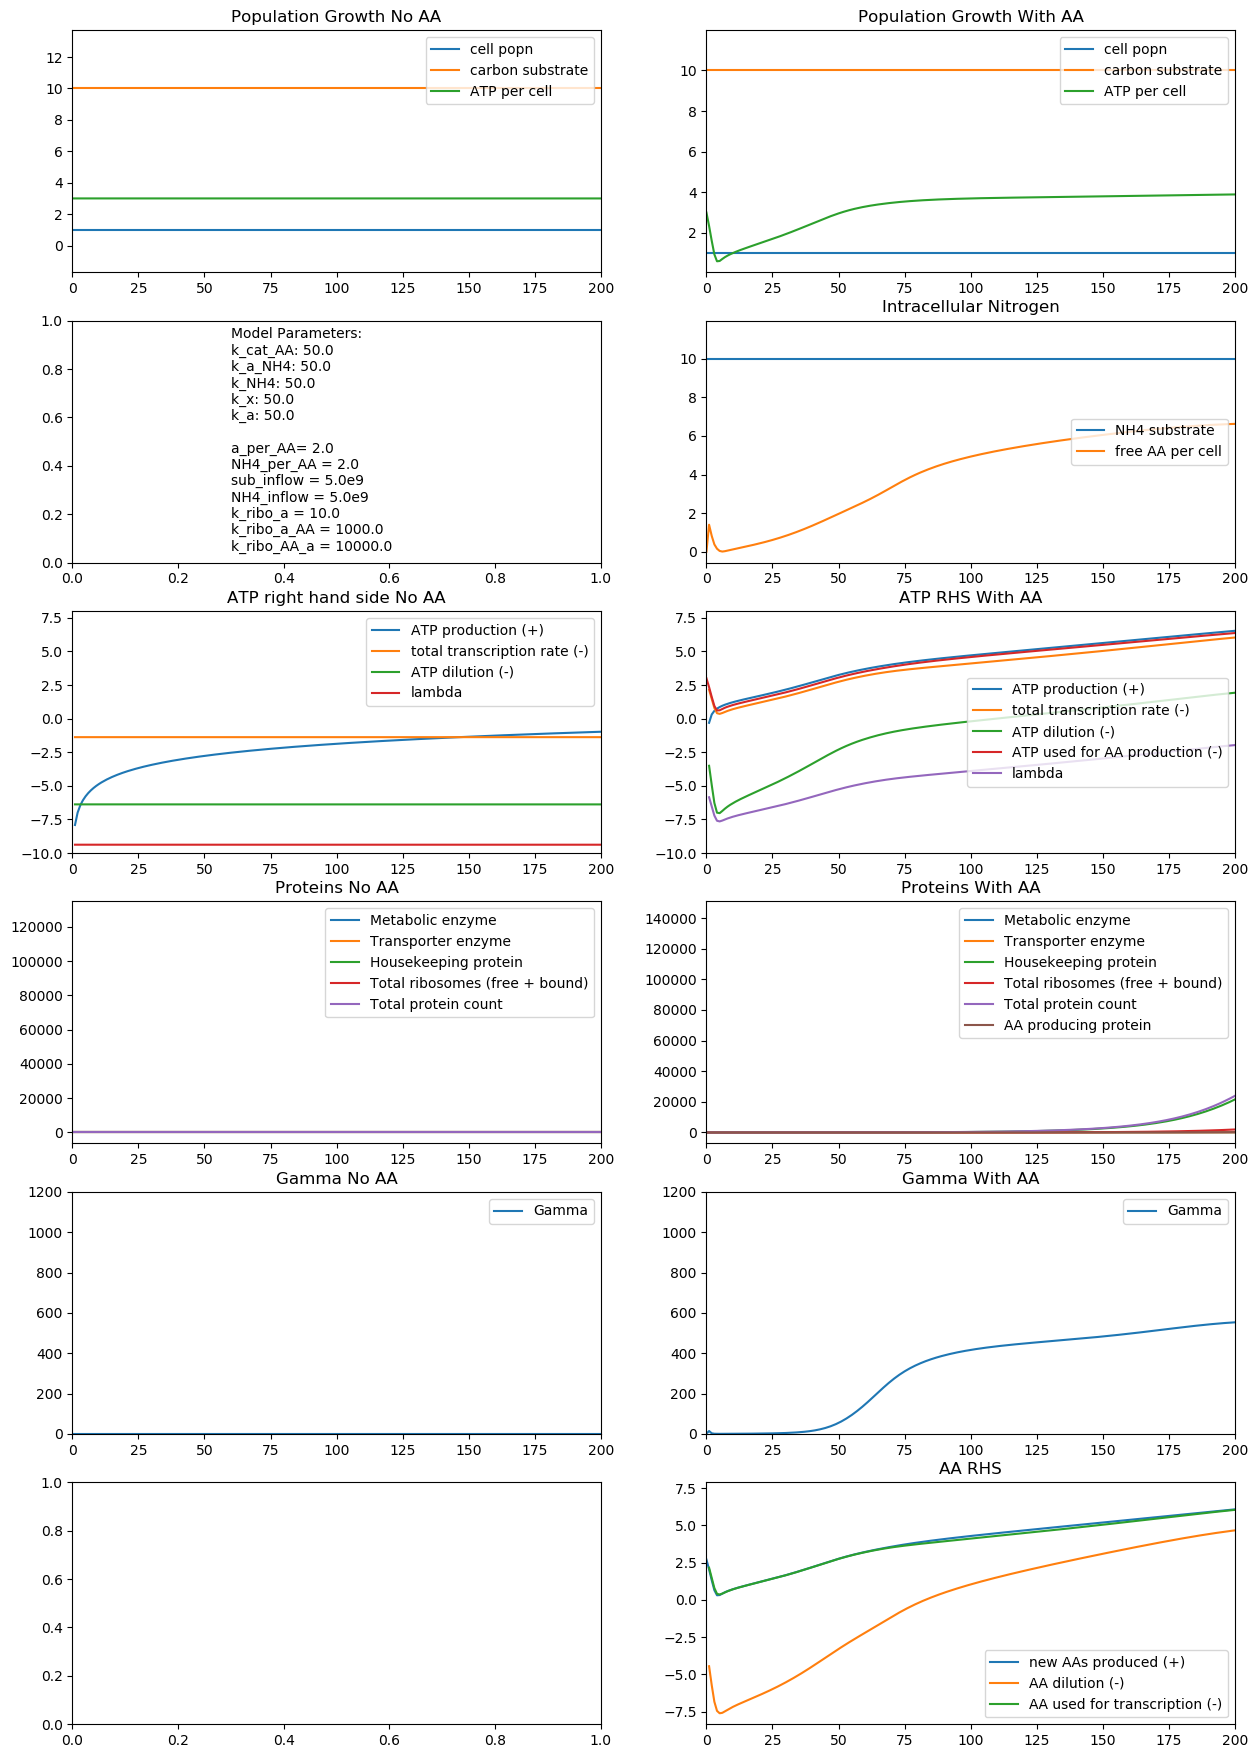


ODE plots saved


In [5]:
println("plotting")
xlims = (0,200)#(9800,11000)
try
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7,ax8,ax9,ax10,ax11,ax12) =PyPlot.subplots(figsize=(15,22),ncols=2, nrows=6)
ax1.plot(log10.(popn_tracker_original),label = "cell popn")
ax1.plot(log10.(substrate_tracker_original),label = "carbon substrate")
ax1.plot(log10.(ATP_tracker_original),label = "ATP per cell")
ax1.legend(loc = "upper right")
ax1.set_title("Population Growth No AA")
ax1.set_xlim(xlims)
ax1.vlines(10000,-1,13)

ax2.text(0.3,0.05,"Model Parameters:
k_cat_AA: $k_cat_AA
k_a_NH4: $k_a_NH4
k_NH4: $k_NH4
k_x: $k_x
k_a: $k_a
        
a_per_AA= $a_per_AA
NH4_per_AA = $NH4_per_AA
sub_inflow = $sub_inflow 
NH4_inflow = $NH4_inflow
k_ribo_a = $k_ribo_a
k_ribo_a_AA = $k_ribo_a_AA
k_ribo_AA_a = $k_ribo_AA_a")    
    
ax3.plot(log10.(nucat_tracker_original), label = "ATP production (+)")
ax3.plot(log10.(ttrate_tracker_original), label = "total transcription rate (-)")
ax3.plot(log10.(a_dilution_tracker_original), label = "ATP dilution (-)")
ax3.plot(log10.(ttrate_tracker_original/M), label = "lambda")
ax3.legend()
ax3.set_title("ATP right hand side No AA")
ax3.set_xlim(xlims)
ax3.set_ylim(-10,8)
# ax3.plot(log10.(em_tracker_original), label = "Metabolic enzyme")
# ax3.plot(log10.(et_tracker_original), label = "Transporter enzyme")
# ax3.plot(log10.(q_tracker_original), label = "Housekeeping protein")
# ax3.plot(log10.(total_r_tracker_original), label = "Total ribosomes (free + bound)")
    
ax4.plot((em_tracker_original), label = "Metabolic enzyme")
ax4.plot((et_tracker_original), label = "Transporter enzyme")
ax4.plot((q_tracker_original), label = "Housekeeping protein")
ax4.plot((total_r_tracker_original), label = "Total ribosomes (free + bound)")
ax4.plot(total_proteome_tracker_original, label = "Total protein count")
ax4.set_title("Proteins No AA")
ax4.set_xlim(xlims)
# ax6.set_ylim(0,120000)
ax4.legend()   
                    
ax5.plot((gamma_tracker_original), label = "Gamma")                    
ax5.set_title("Gamma No AA")
ax5.set_xlim(xlims)
ax5.set_ylim(0,1200)
ax5.legend()                            


    
ax7.plot(log10.(popn_tracker_with_AA),label = "cell popn")
ax7.plot(log10.(substrate_tracker_with_AA),label = "carbon substrate")
ax7.plot(log10.(ATP_tracker_with_AA),label = "ATP per cell")
ax7.legend(loc = "upper right")
ax7.set_title("Population Growth With AA")
ax7.set_xlim(xlims)
    
ax8.plot(log10.(NH4_tracker),label = "NH4 substrate")
ax8.plot(log10.(AA_tracker_with_AA),label = "free AA per cell")
ax8.legend(loc = "right")
ax8.set_title("Intracellular Nitrogen")
ax8.set_xlim(xlims)
    
ax9.plot(log10.(nucat_tracker_with_AA), label = "ATP production (+)")
ax9.plot(log10.(ttrate_tracker_with_AA), label = "total transcription rate (-)")
ax9.plot(log10.(a_dilution_tracker_with_AA), label = "ATP dilution (-)")
ax9.plot(log10.(AA_a_use_tracker_with_AA), label = "ATP used for AA production (-)")
ax9.plot(log10.(ttrate_tracker_with_AA/M), label = "lambda")
ax9.legend(loc= "right")
ax9.set_title("ATP RHS With AA")
ax9.set_xlim(xlims)
ax9.set_ylim(-10,8)
    
ax10.plot((em_tracker_with_AA), label = "Metabolic enzyme")
ax10.plot((et_tracker_with_AA), label = "Transporter enzyme")
ax10.plot((q_tracker_with_AA), label = "Housekeeping protein")
ax10.plot((total_r_tracker_with_AA), label = "Total ribosomes (free + bound)")
ax10.plot(total_proteome_tracker_with_AA, label = "Total protein count")
ax10.plot((AA_prot_tracker), label = "AA producing protein")
ax10.set_title("Proteins With AA")
ax10.set_xlim(xlims)
ax10.legend()
                    
ax11.plot((gamma_tracker_with_AA), label = "Gamma")                    
ax11.set_title("Gamma With AA")
# ax11.plot(log10.(AA_tracker_with_AA),label = "free AA per cell")
# ax11.plot(log10.(ATP_tracker_with_AA),label = "ATP per cell")
ax11.set_xlim(xlims)
ax11.set_ylim(0,1200)
# ax11.set_ylabel("non log scale")
ax11.legend()     
    
    
ax12.plot(log10.(new_AA_tracker), label = "new AAs produced (+)")
ax12.plot(log10.(AA_dilution_tracker), label = "AA dilution (-)")
ax12.plot(log10.(ttrate_tracker_with_AA), label = "AA used for transcription (-)")
ax12.set_title("AA RHS")
ax12.set_xlim(xlims)
ax12.legend()
    
PyPlot.savefig("results/$k_cat_AA-$k_a_NH4-$k_NH4-$k_x-$k_a-ODE_plots.png")
println("ODE plots saved")
catch e
println("error in plot 1")
println(e)
end

In [34]:
i=10000
em_now = sol2_original_model.u[i][3]
println("em is $em_now")
si_now = sol2_original_model.u[i][11]
println("si is $si_now")
find_nucat((sol2_original_model.u[i][3]),(sol2_original_model.u[i][11]))


em is 596.0798136160739
si is 0.0009208475145434583


318.3609034441293

In [129]:
new_AA = find_new_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][15],sol2_with_AA.u[i][22],sol2_with_AA.u[i][23])


17731.806849810768

In [47]:
sol2_original_model[274]

25-element Array{Float64,1}:
     47.40175407358578    
   5930.304484270547      
    542.6248873641578     
   3075.0534136111423     
     16.221331114895253   
    542.6248873641578     
     16.221331114895253   
     29.323636729703825   
     29.323636729703825   
 104801.76151368003       
      5.69712659638944    
   5555.476306923484      
   6284.518922133013      
      0.9989781703542471  
      0.0                 
      0.0                 
      0.0                 
      0.0                 
      0.0                 
      2.8044813678825856e6
      6.684225069717191e7 
      0.0                 
      0.0                 
      0.0                 
      0.0                 

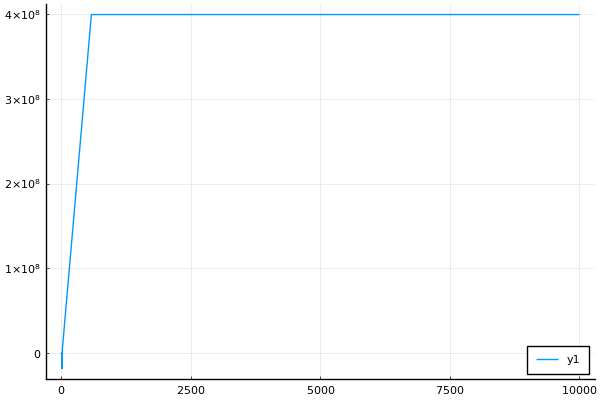

In [13]:
Plots.plot(new_AA_tracker .- AA_dilution_tracker .- ttrate_tracker_with_AA)

burning in AA model
running AA model
successfully run AA model with params 5.0, 5.0, 5.0, 5.0, 5.0
burning in original model
running original model
successfully run original model with params 5.0, 5.0, 5.0, 5.0, 5.0
plotting
ODE plots saved
burning in AA model
running AA model
successfully run AA model with params 5.0, 5.0, 5.0, 5.0, 500.0
burning in original model
running original model
successfully run original model with params 5.0, 5.0, 5.0, 5.0, 500.0
plotting
ODE plots saved
burning in AA model
running AA model
successfully run AA model with params 5.0, 5.0, 5.0, 500.0, 5.0
burning in original model
running original model
successfully run original model with params 5.0, 5.0, 5.0, 500.0, 5.0
plotting
ODE plots saved
burning in AA model
running AA model
successfully run AA model with params 5.0, 5.0, 5.0, 500.0, 500.0
burning in original model
running original model
successfully run original model with params 5.0, 5.0, 5.0, 500.0, 500.0
plotting
ODE plots saved
burning in AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


successfully run AA model with params 500.0, 5.0, 500.0, 5.0, 500.0
burning in original model
running original model
successfully run original model with params 500.0, 5.0, 500.0, 5.0, 500.0
plotting
ODE plots saved
burning in AA model
running AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


successfully run AA model with params 500.0, 5.0, 500.0, 500.0, 5.0
burning in original model
running original model
successfully run original model with params 500.0, 5.0, 500.0, 500.0, 5.0
plotting
ODE plots saved
burning in AA model
running AA model

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



successfully run AA model with params 500.0, 5.0, 500.0, 500.0, 500.0
burning in original model
running original model
successfully run original model with params 500.0, 5.0, 500.0, 500.0, 500.0
plotting
ODE plots saved
burning in AA model
running AA model

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



successfully run AA model with params 500.0, 500.0, 5.0, 5.0, 5.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 5.0, 5.0, 5.0
plotting
ODE plots saved
burning in AA model
running AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


successfully run AA model with params 500.0, 500.0, 5.0, 5.0, 500.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 5.0, 5.0, 500.0
plotting
ODE plots saved
burning in AA model
running AA model

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



successfully run AA model with params 500.0, 500.0, 5.0, 500.0, 5.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 5.0, 500.0, 5.0
plotting
ODE plots saved
burning in AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


running AA model
successfully run AA model with params 500.0, 500.0, 5.0, 500.0, 500.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 5.0, 500.0, 500.0
plotting
ODE plots saved
burning in AA model
running AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


successfully run AA model with params 500.0, 500.0, 500.0, 5.0, 5.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 500.0, 5.0, 5.0
plotting
ODE plots saved
burning in AA model
running AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


successfully run AA model with params 500.0, 500.0, 500.0, 5.0, 500.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 500.0, 5.0, 500.0
plotting
ODE plots saved
burning in AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


running AA model
successfully run AA model with params 500.0, 500.0, 500.0, 500.0, 5.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 500.0, 500.0, 5.0
plotting
ODE plots saved
burning in AA model
running AA model


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


successfully run AA model with params 500.0, 500.0, 500.0, 500.0, 500.0
burning in original model
running original model
successfully run original model with params 500.0, 500.0, 500.0, 500.0, 500.0
plotting

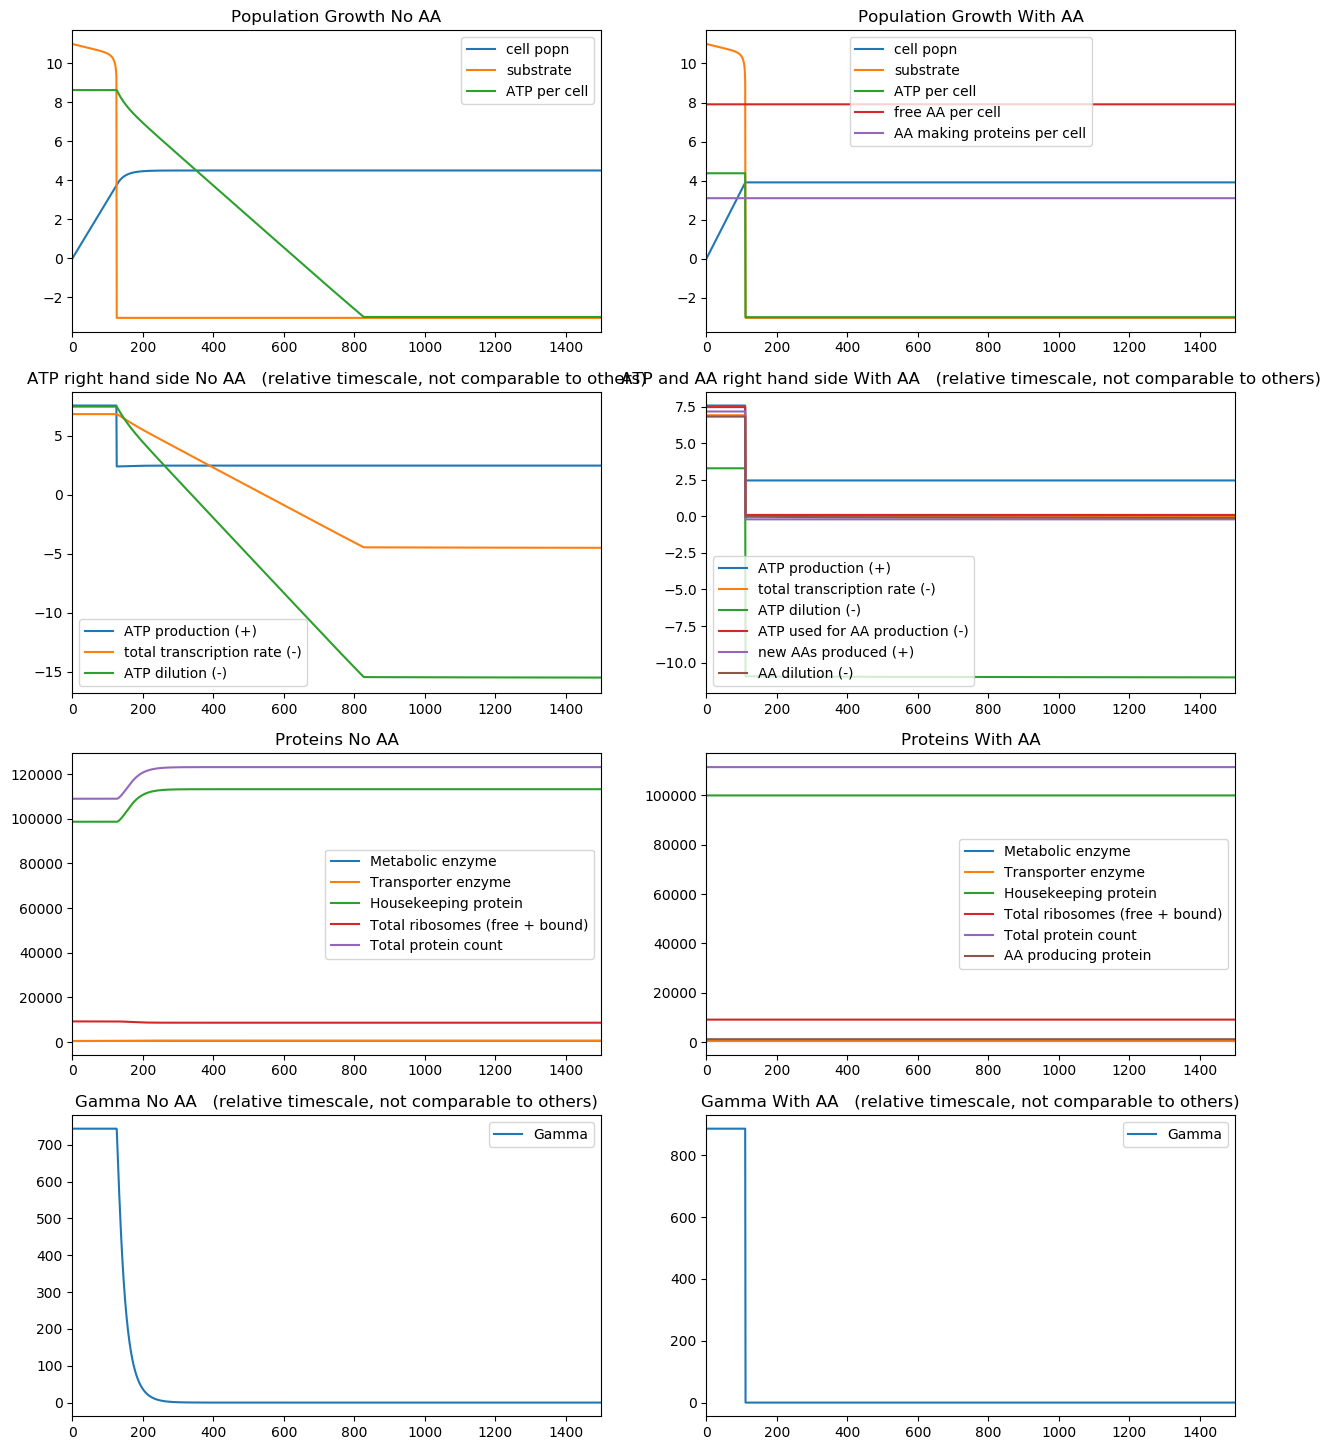

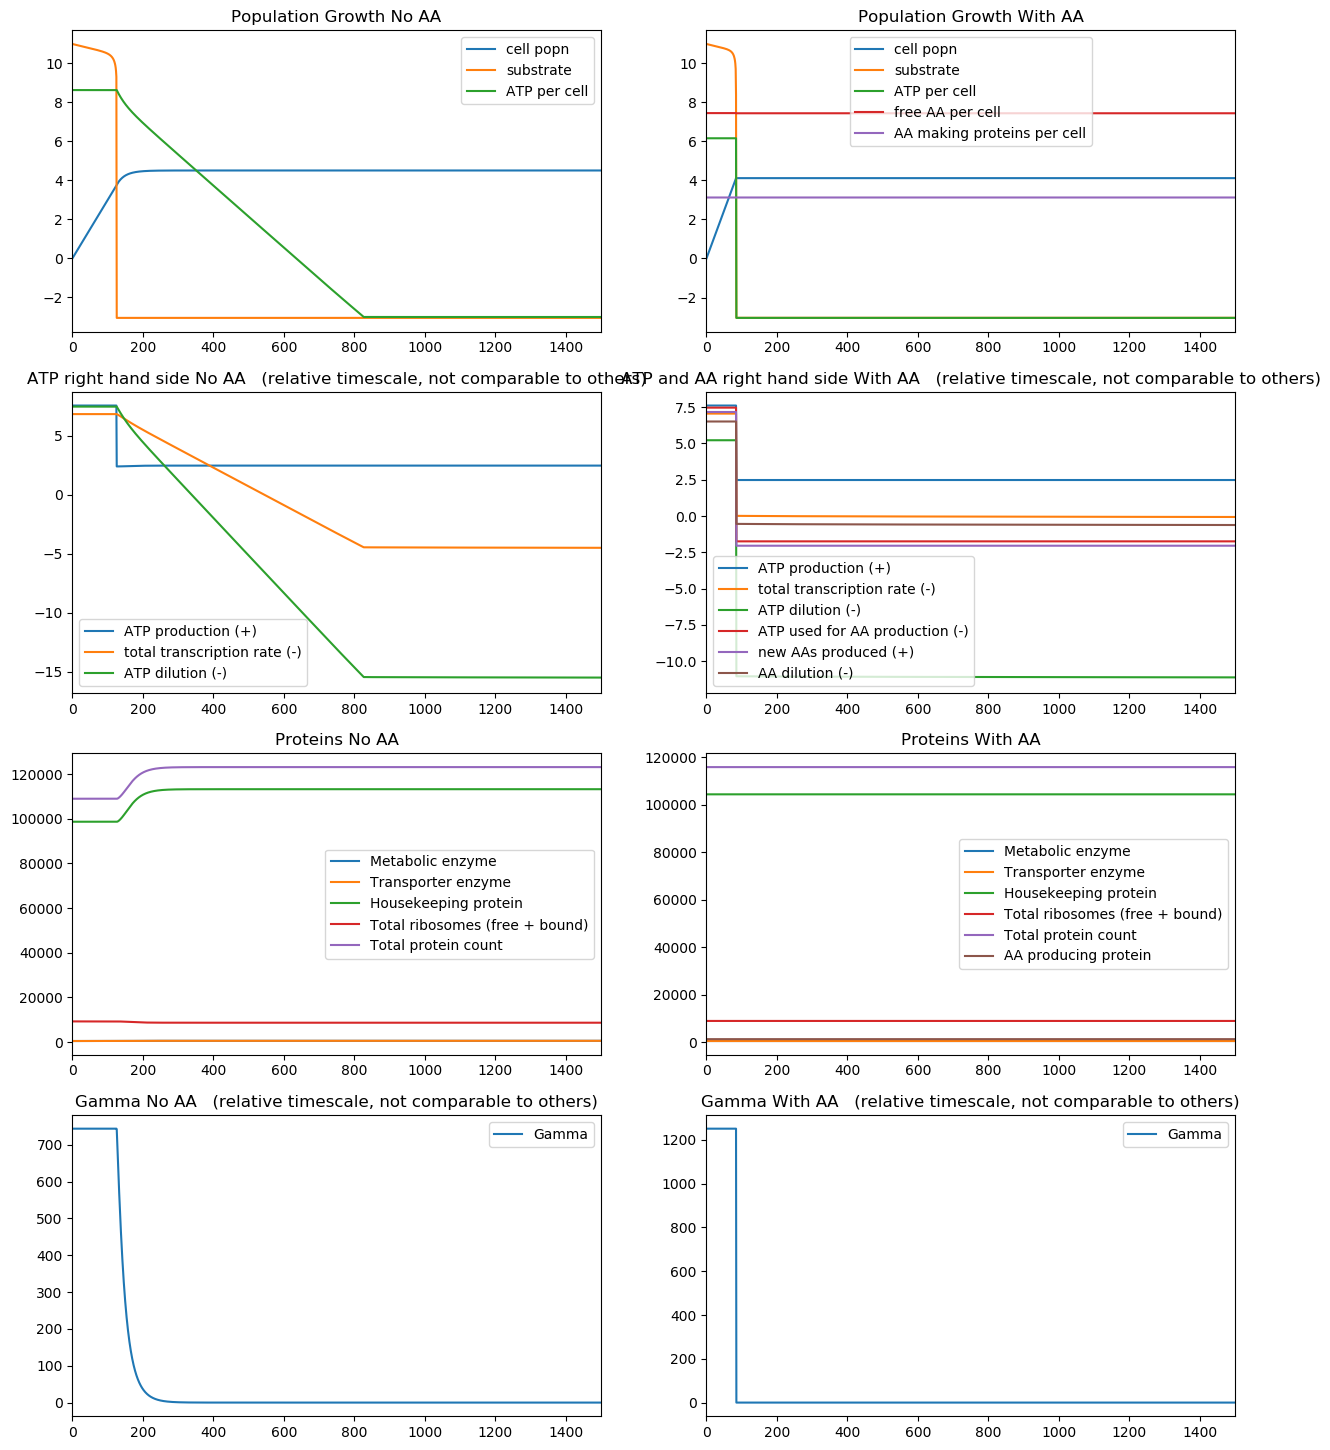

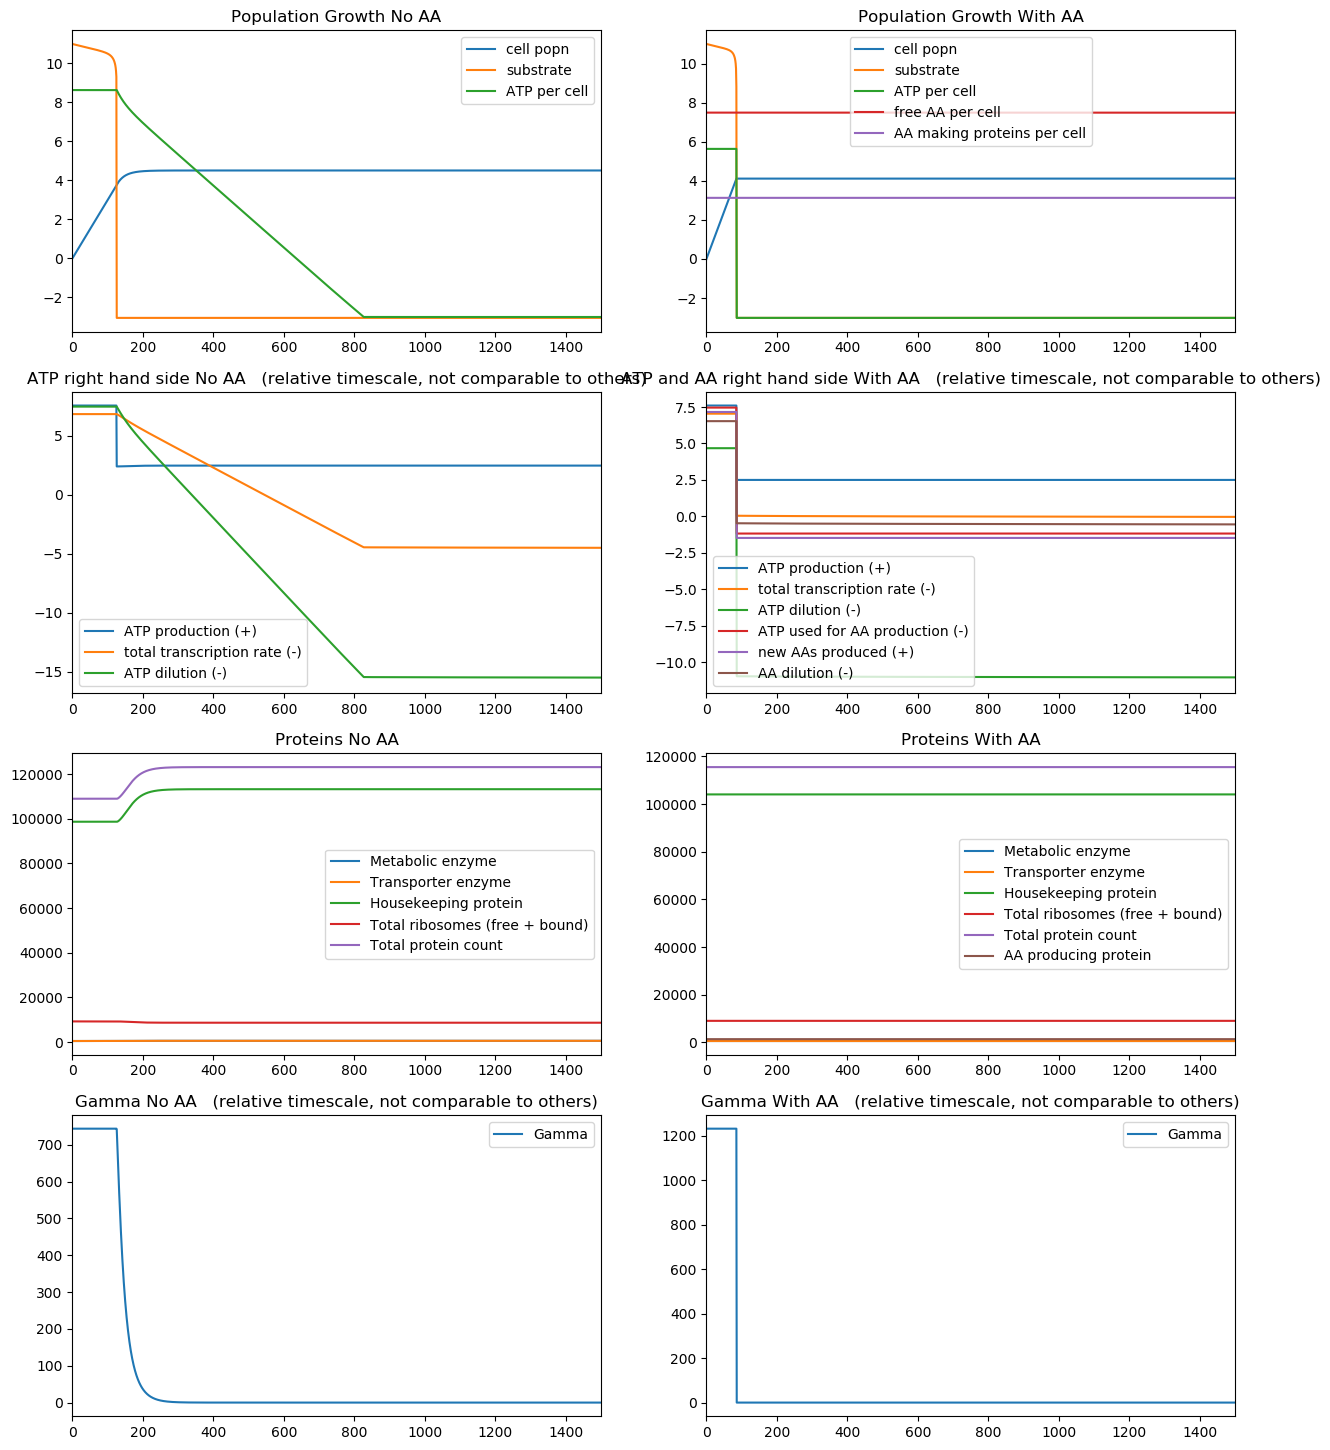

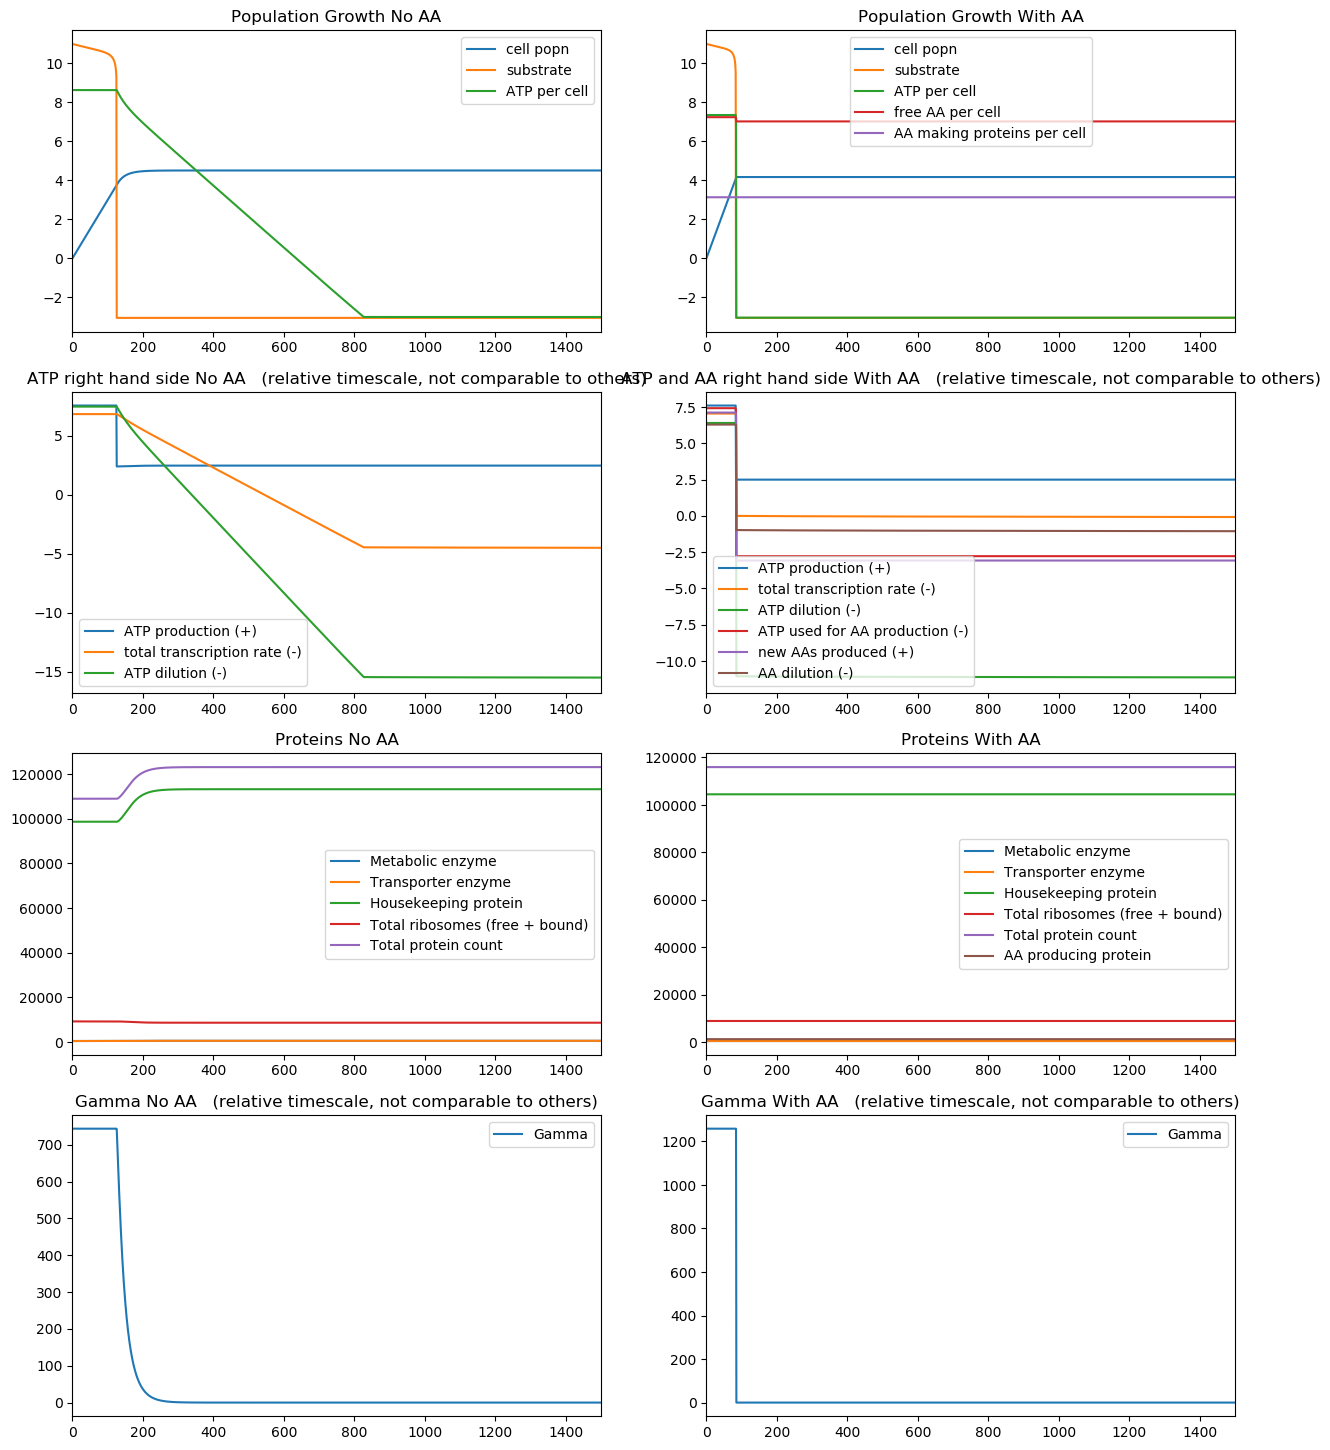

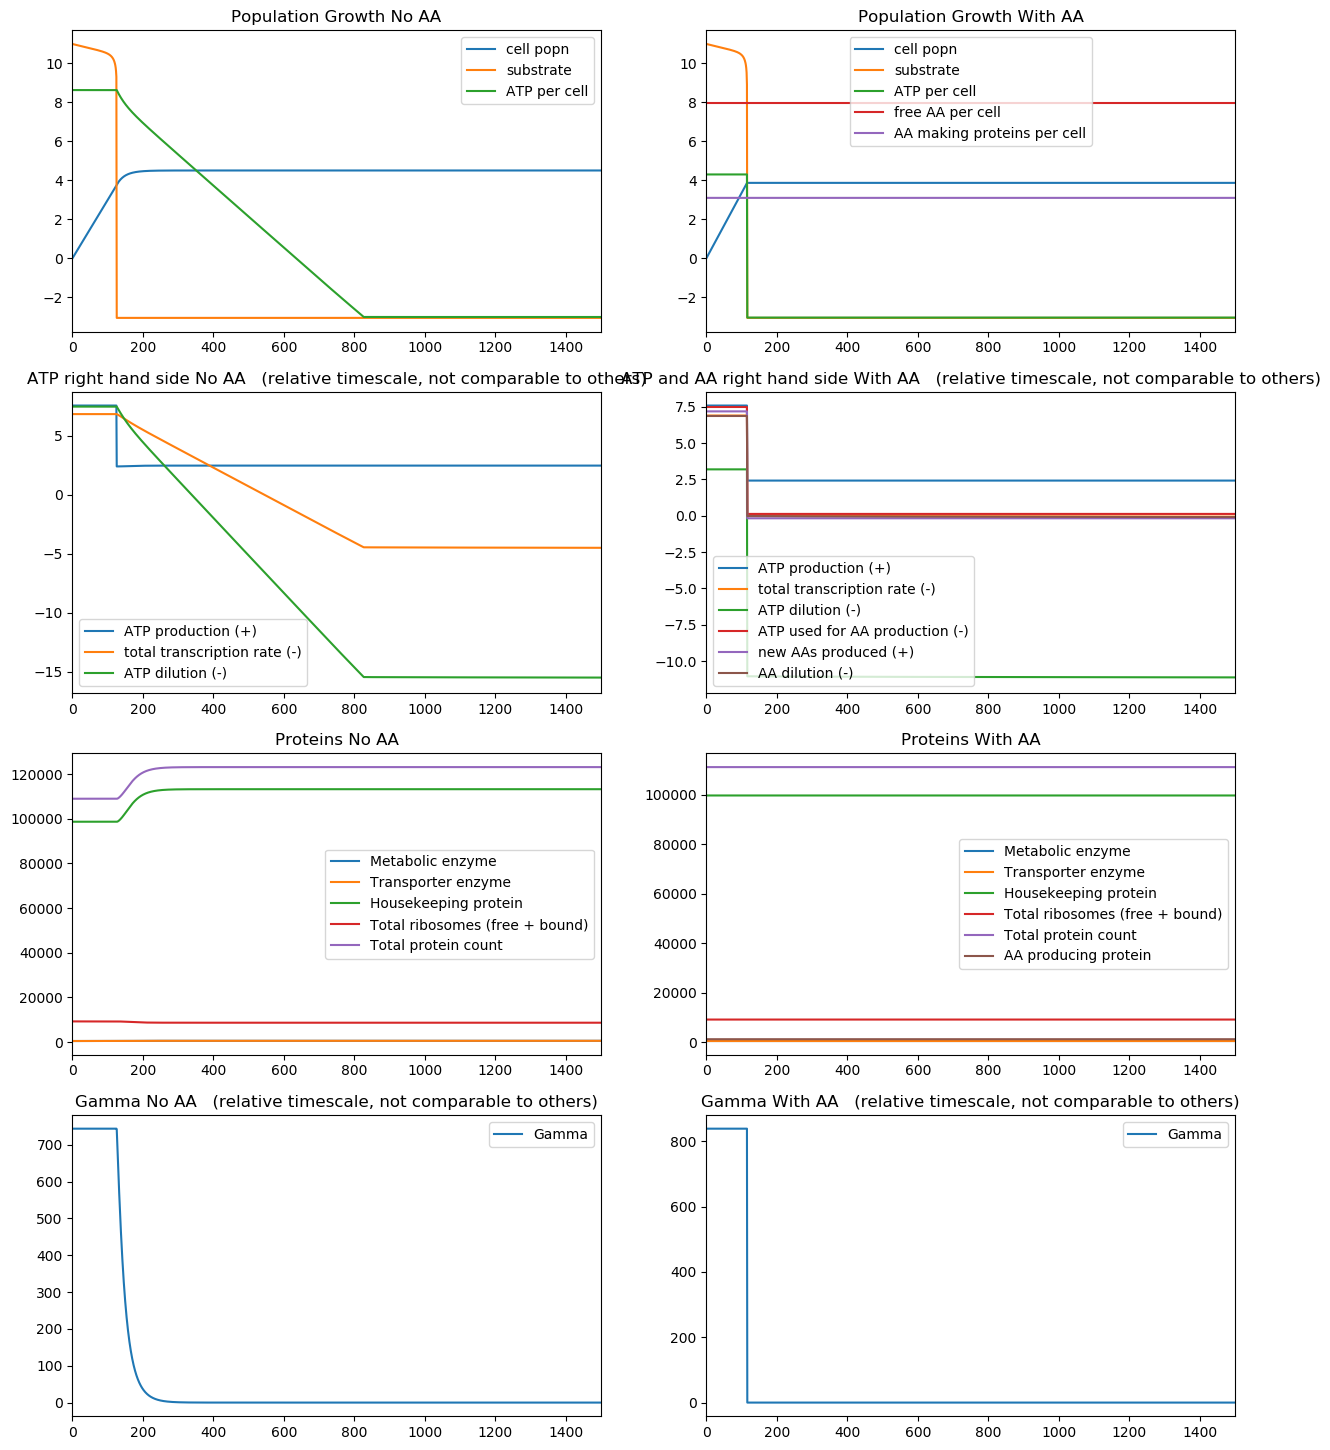

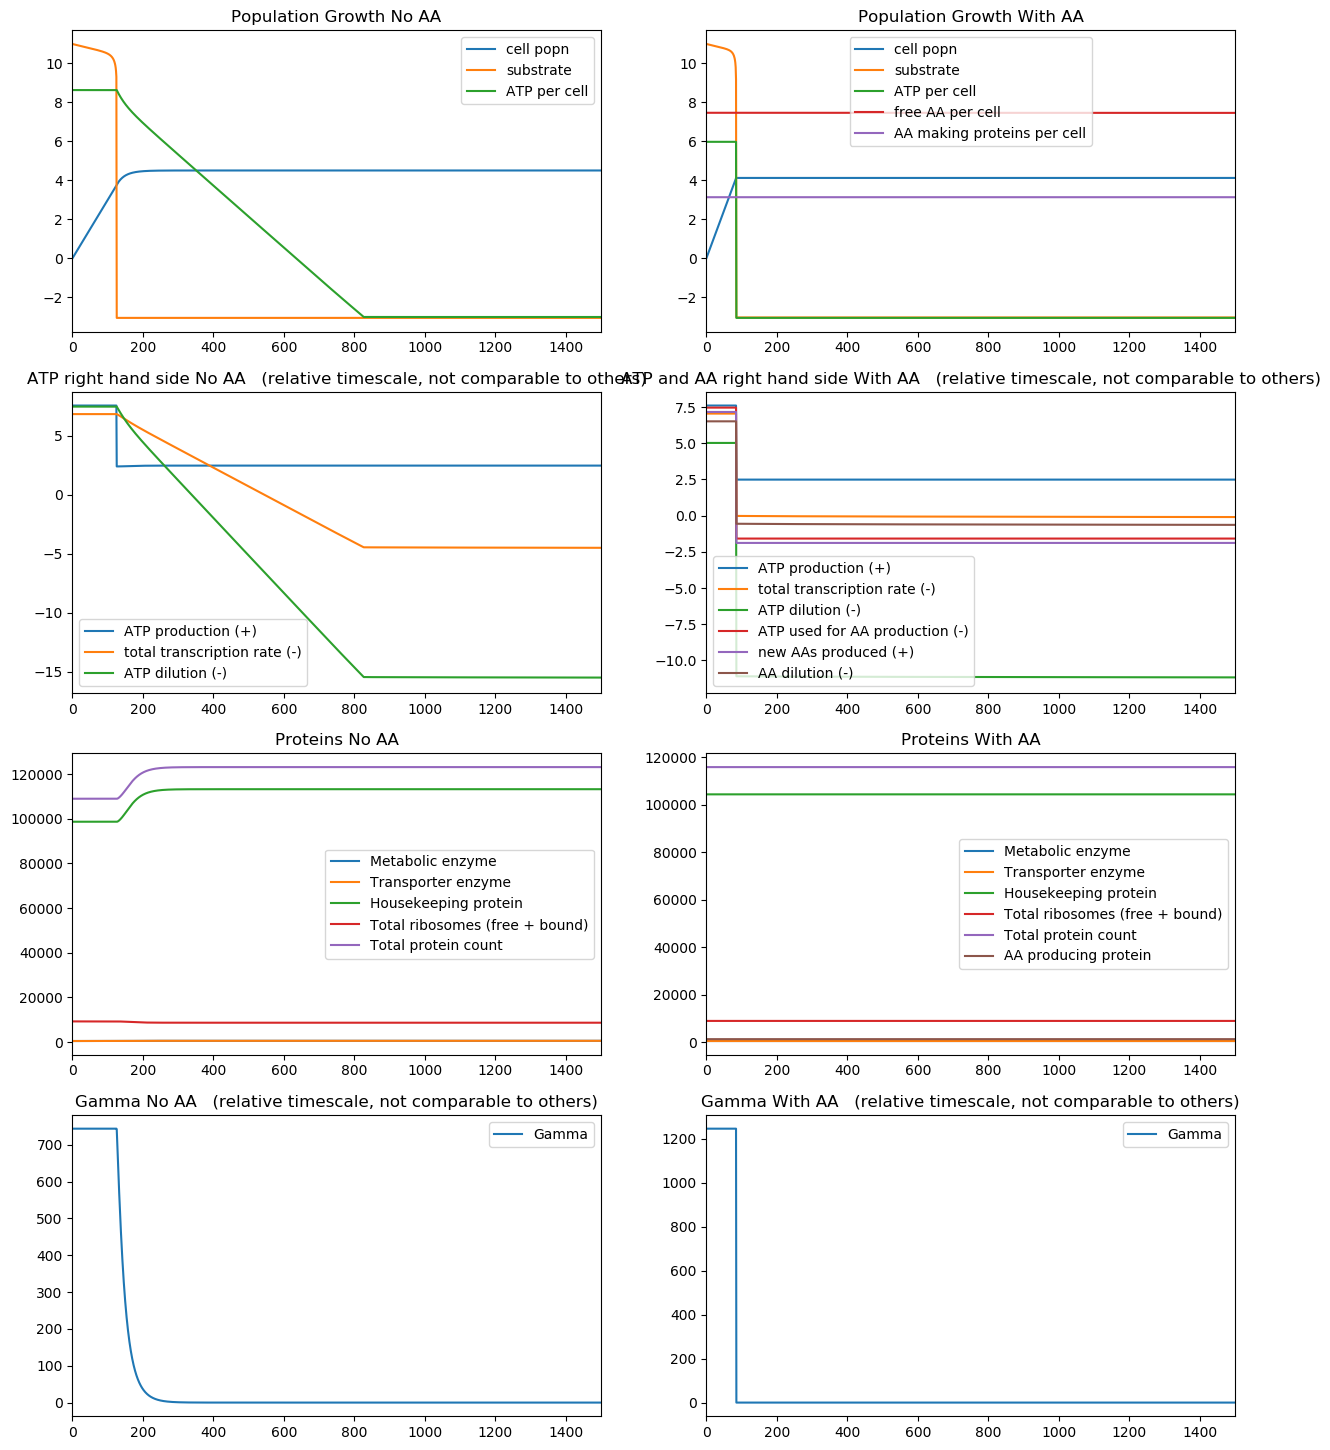

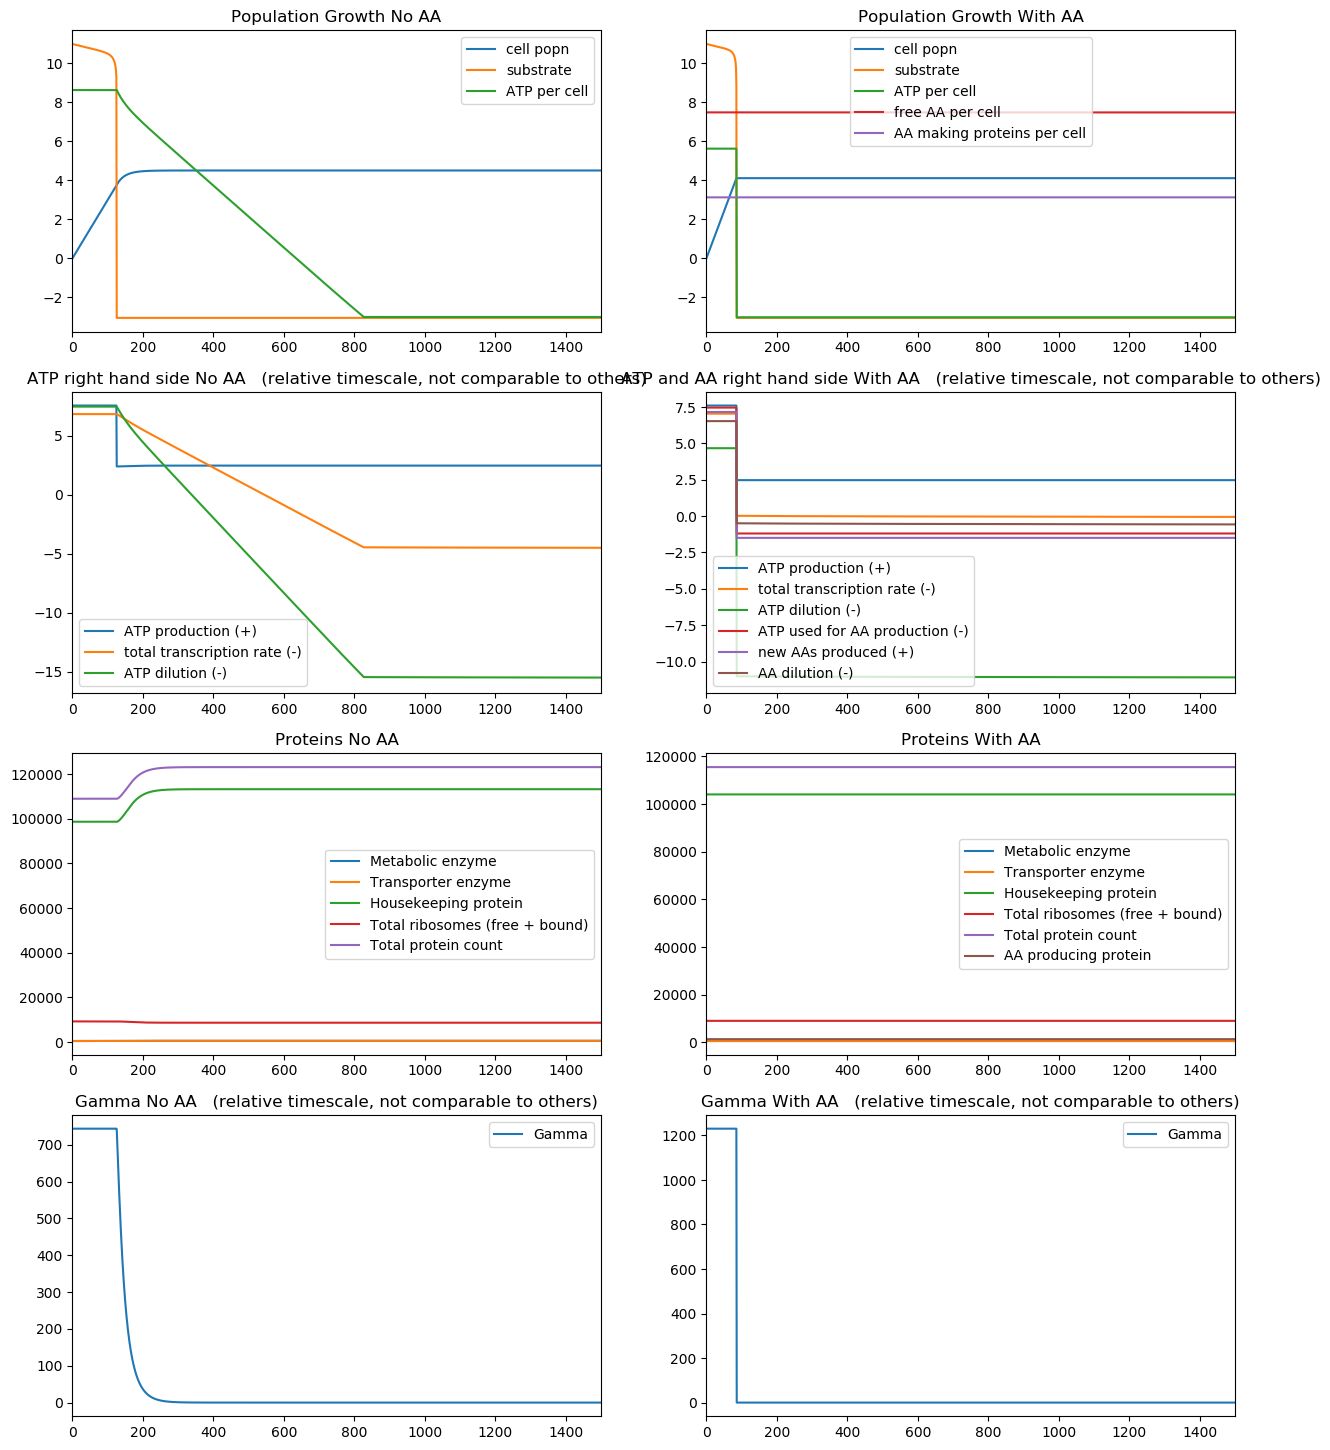

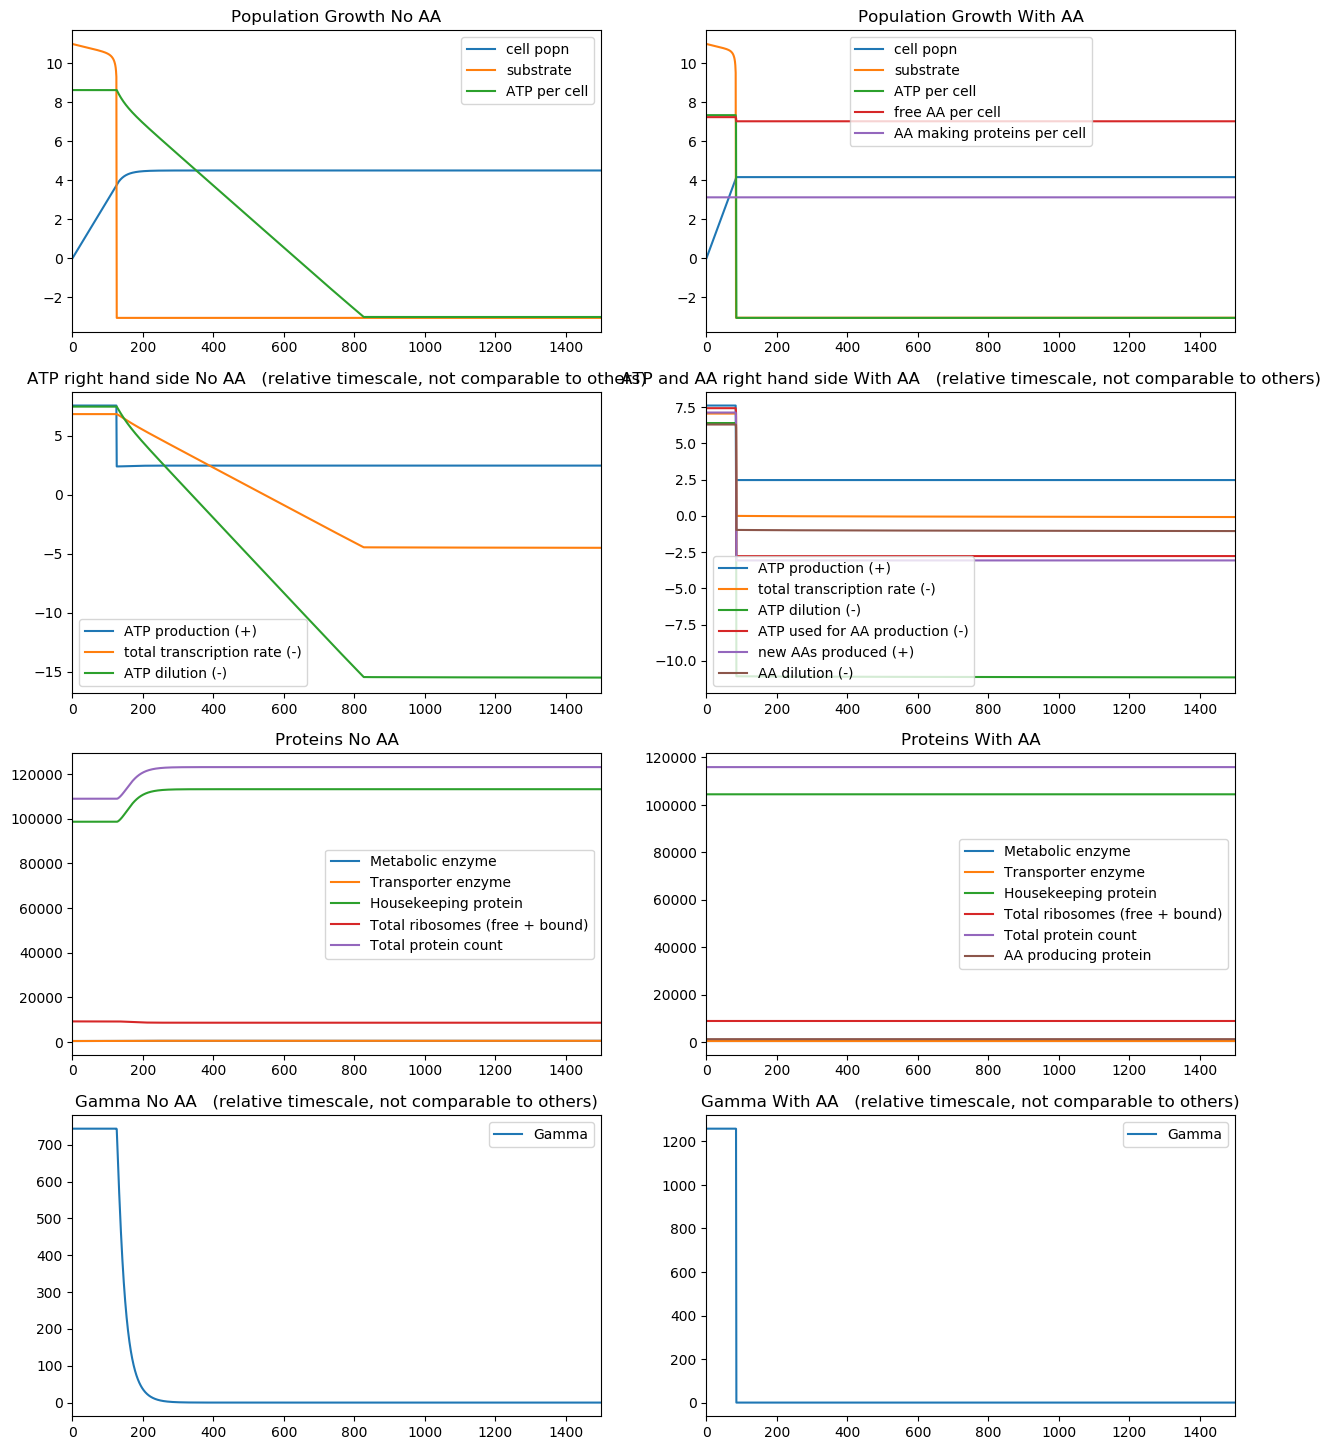

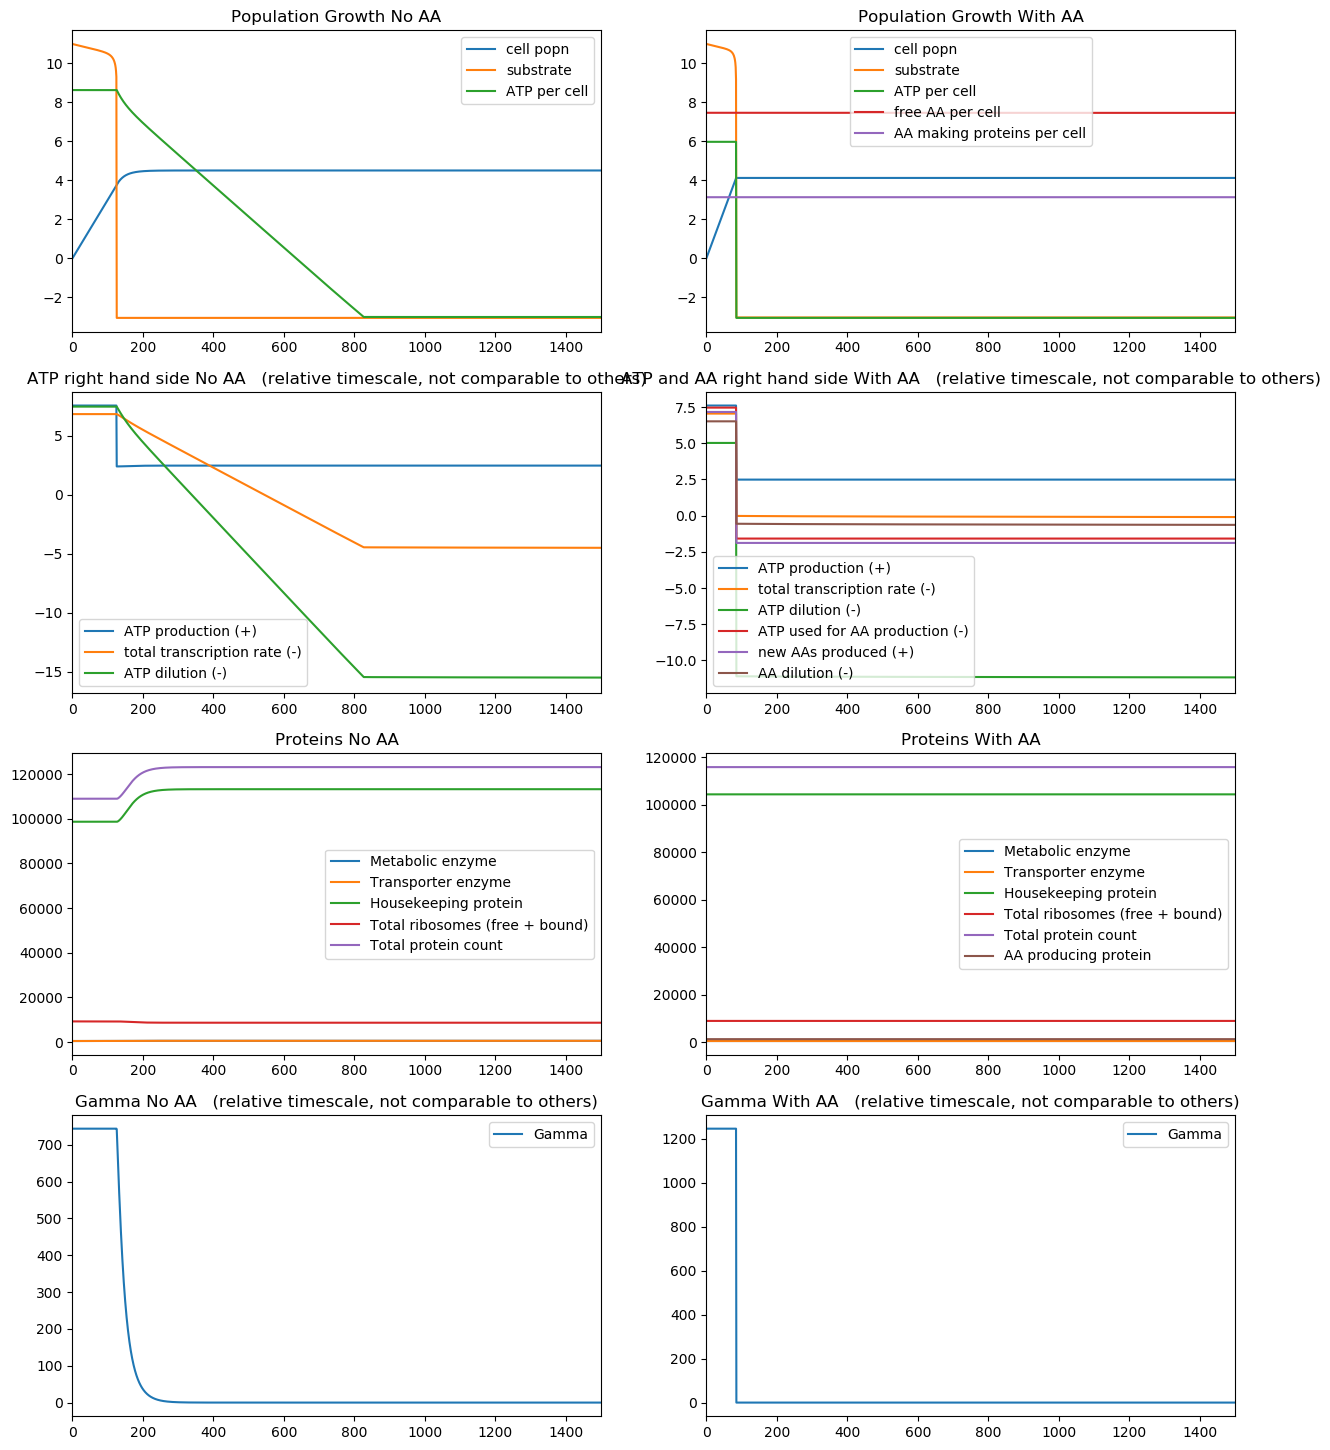

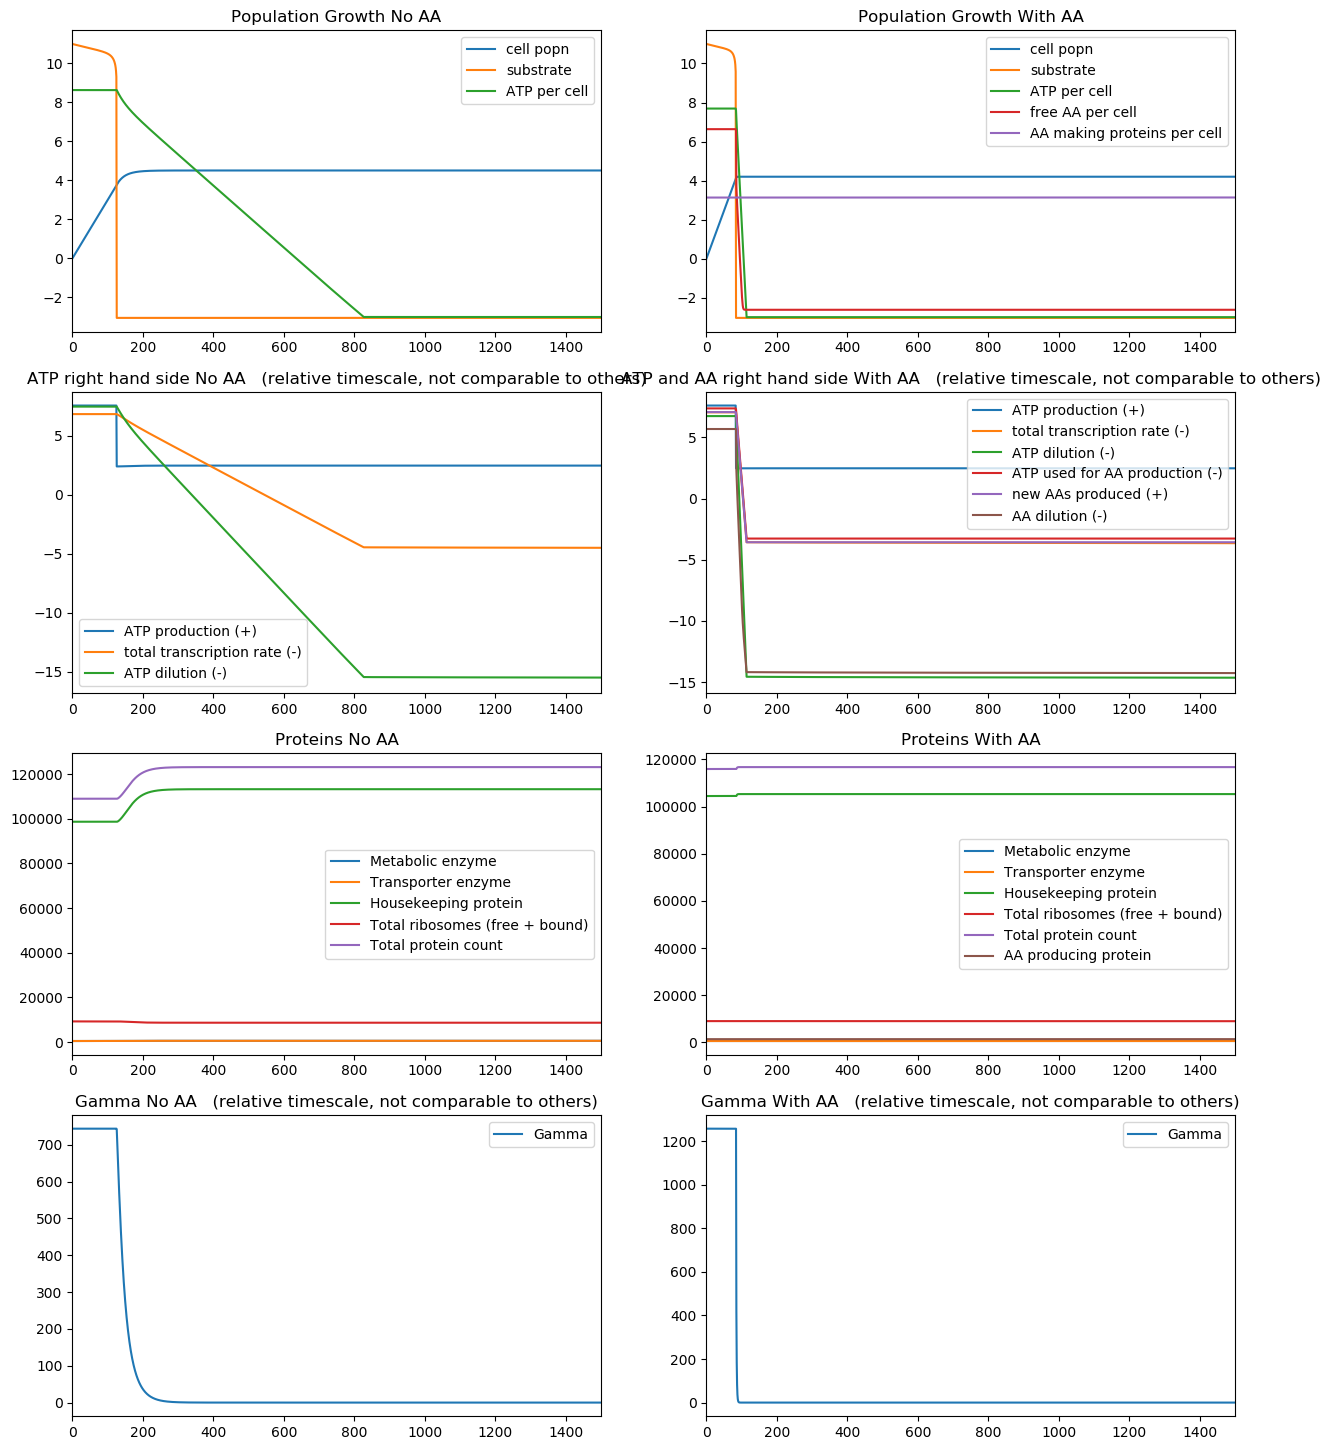

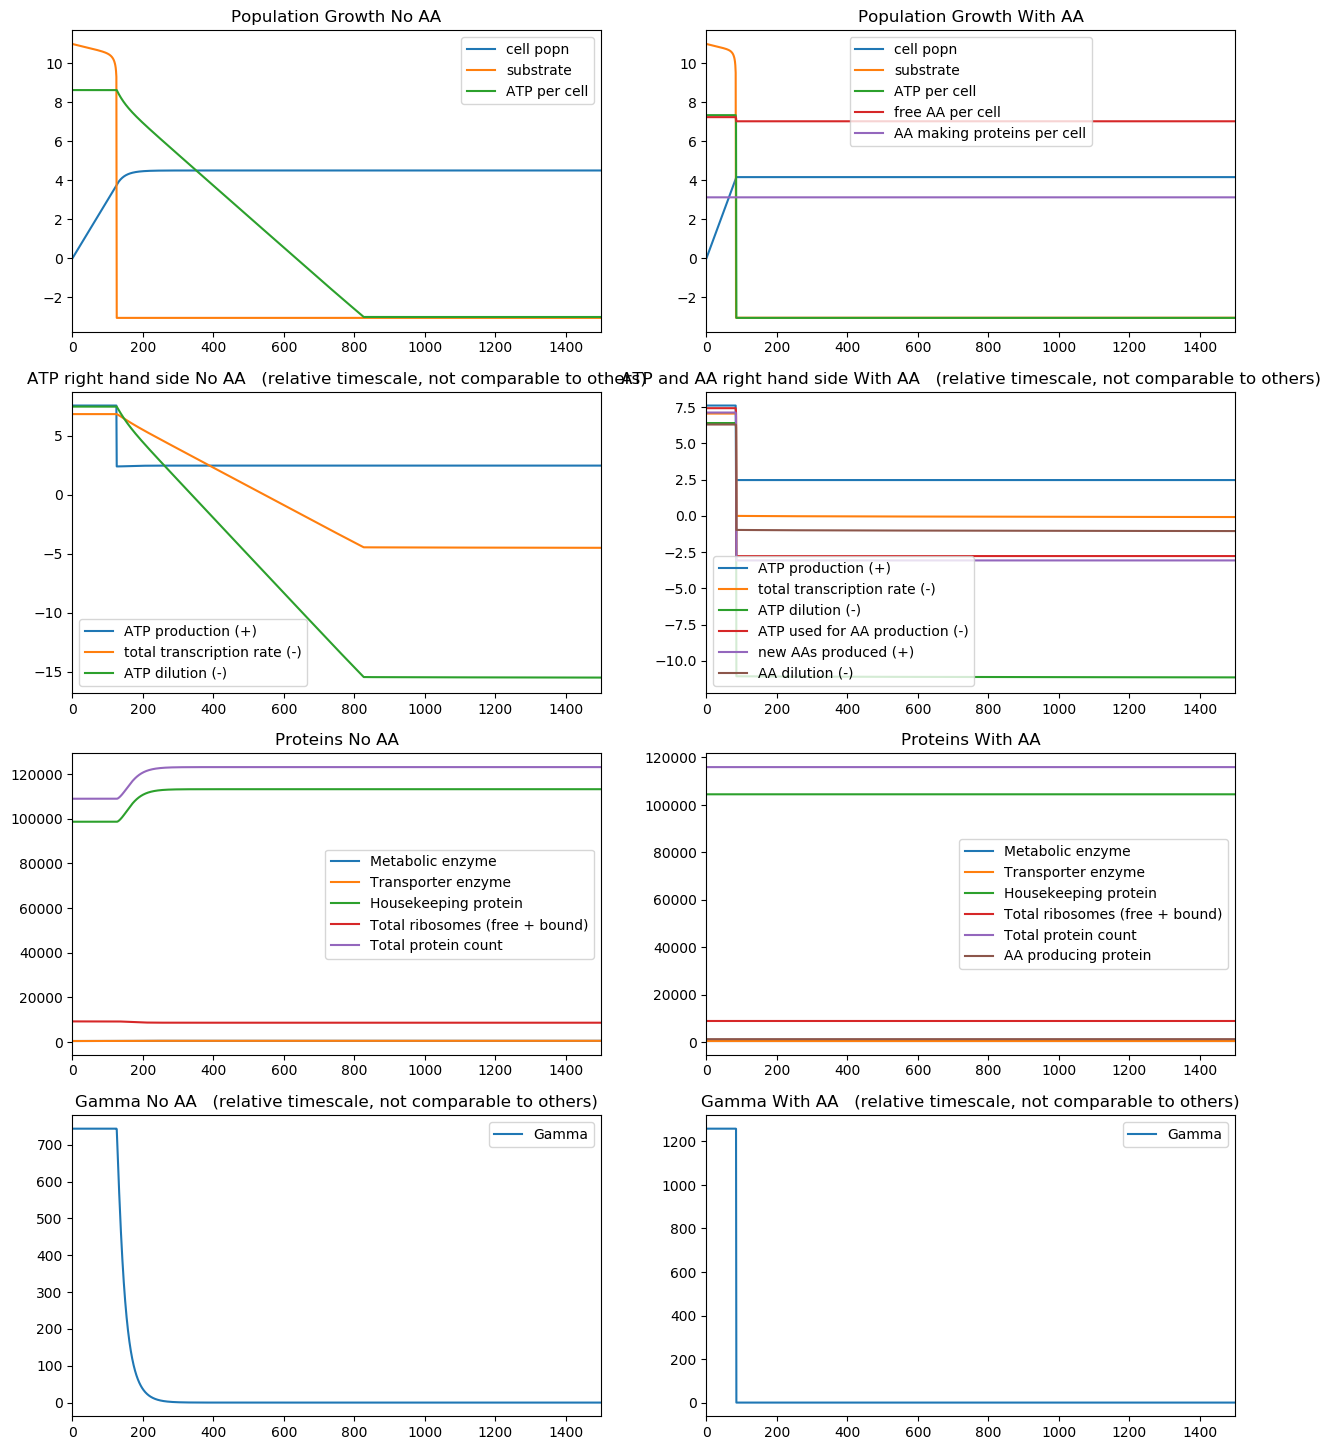

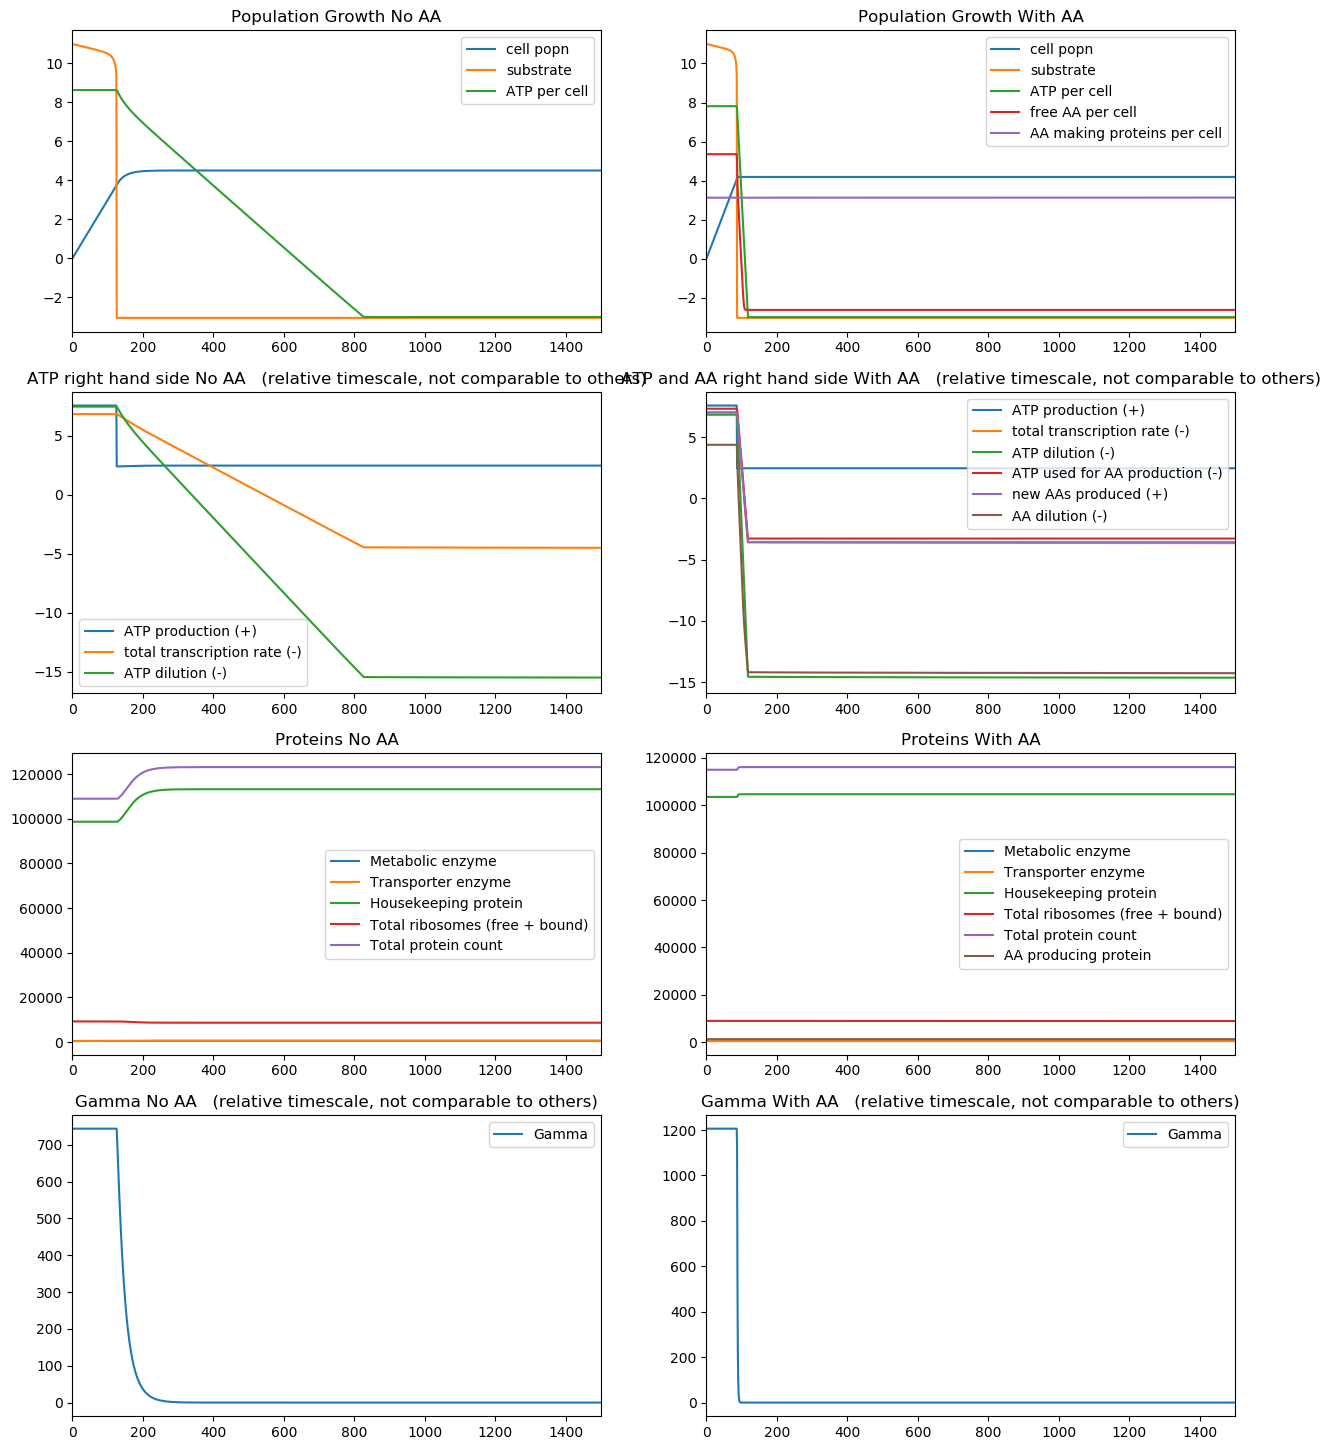

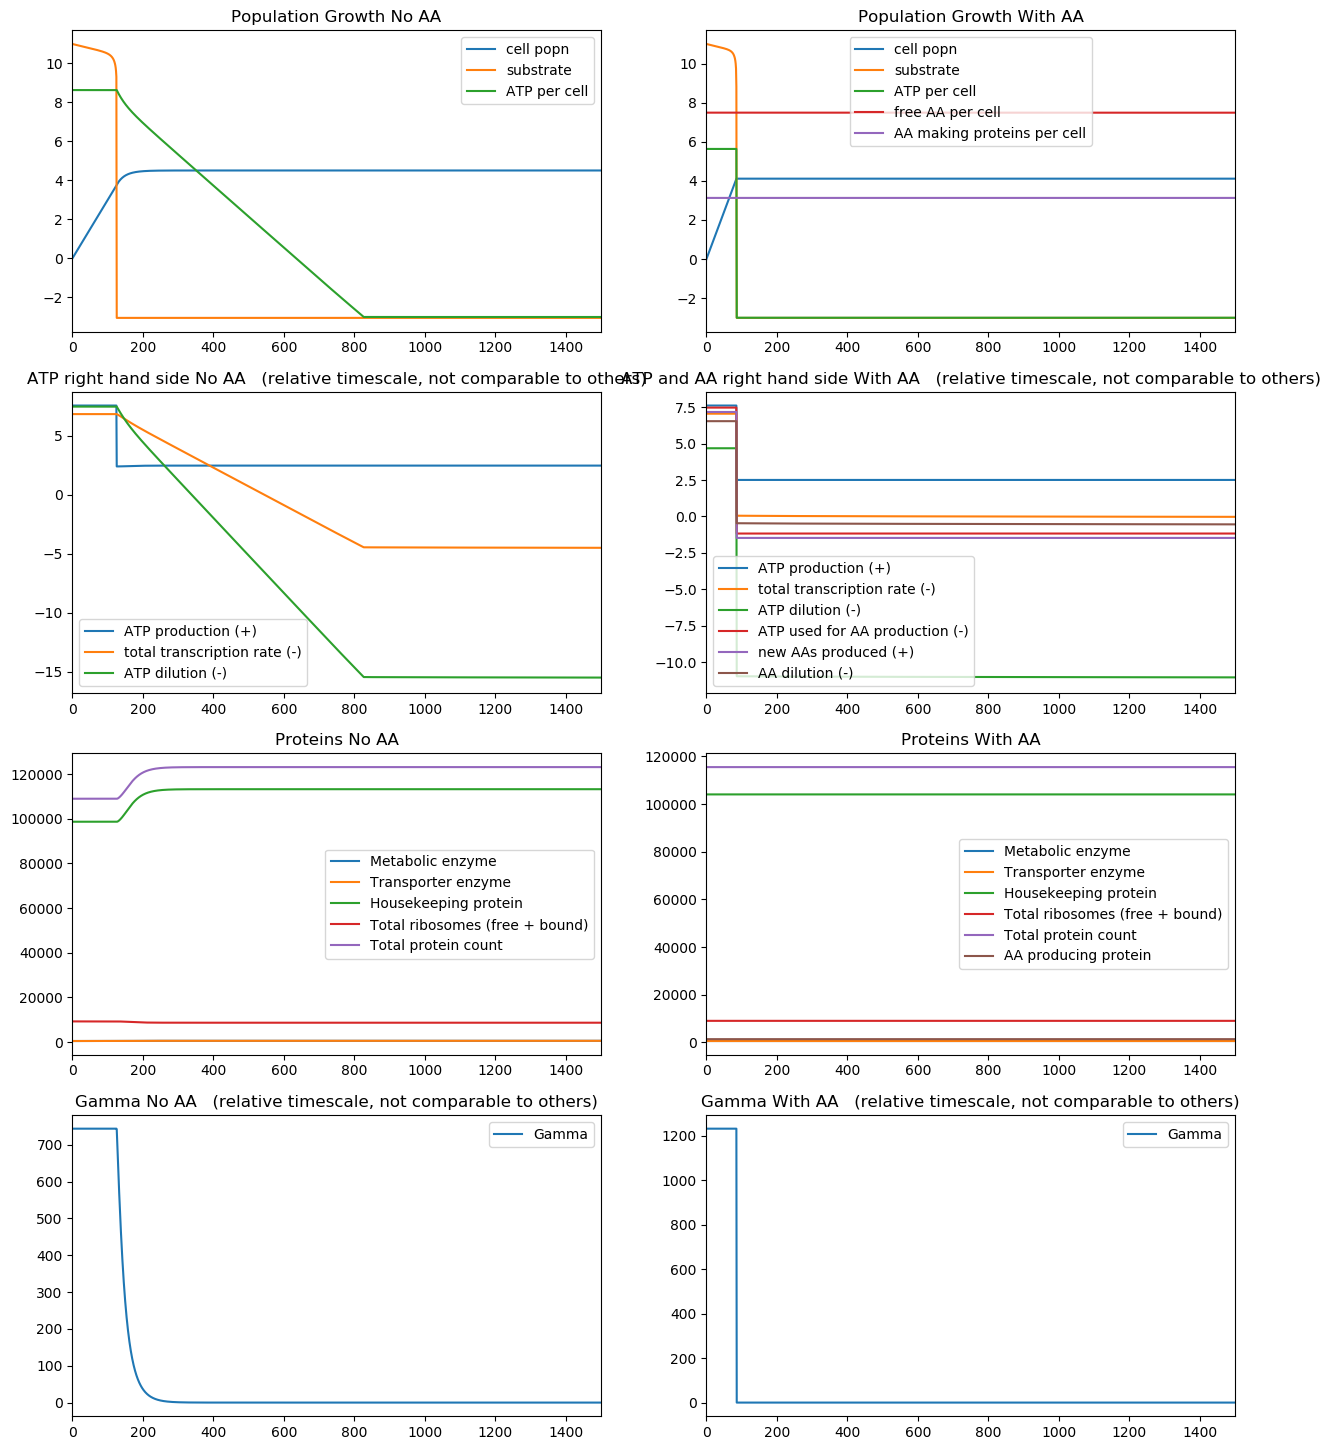

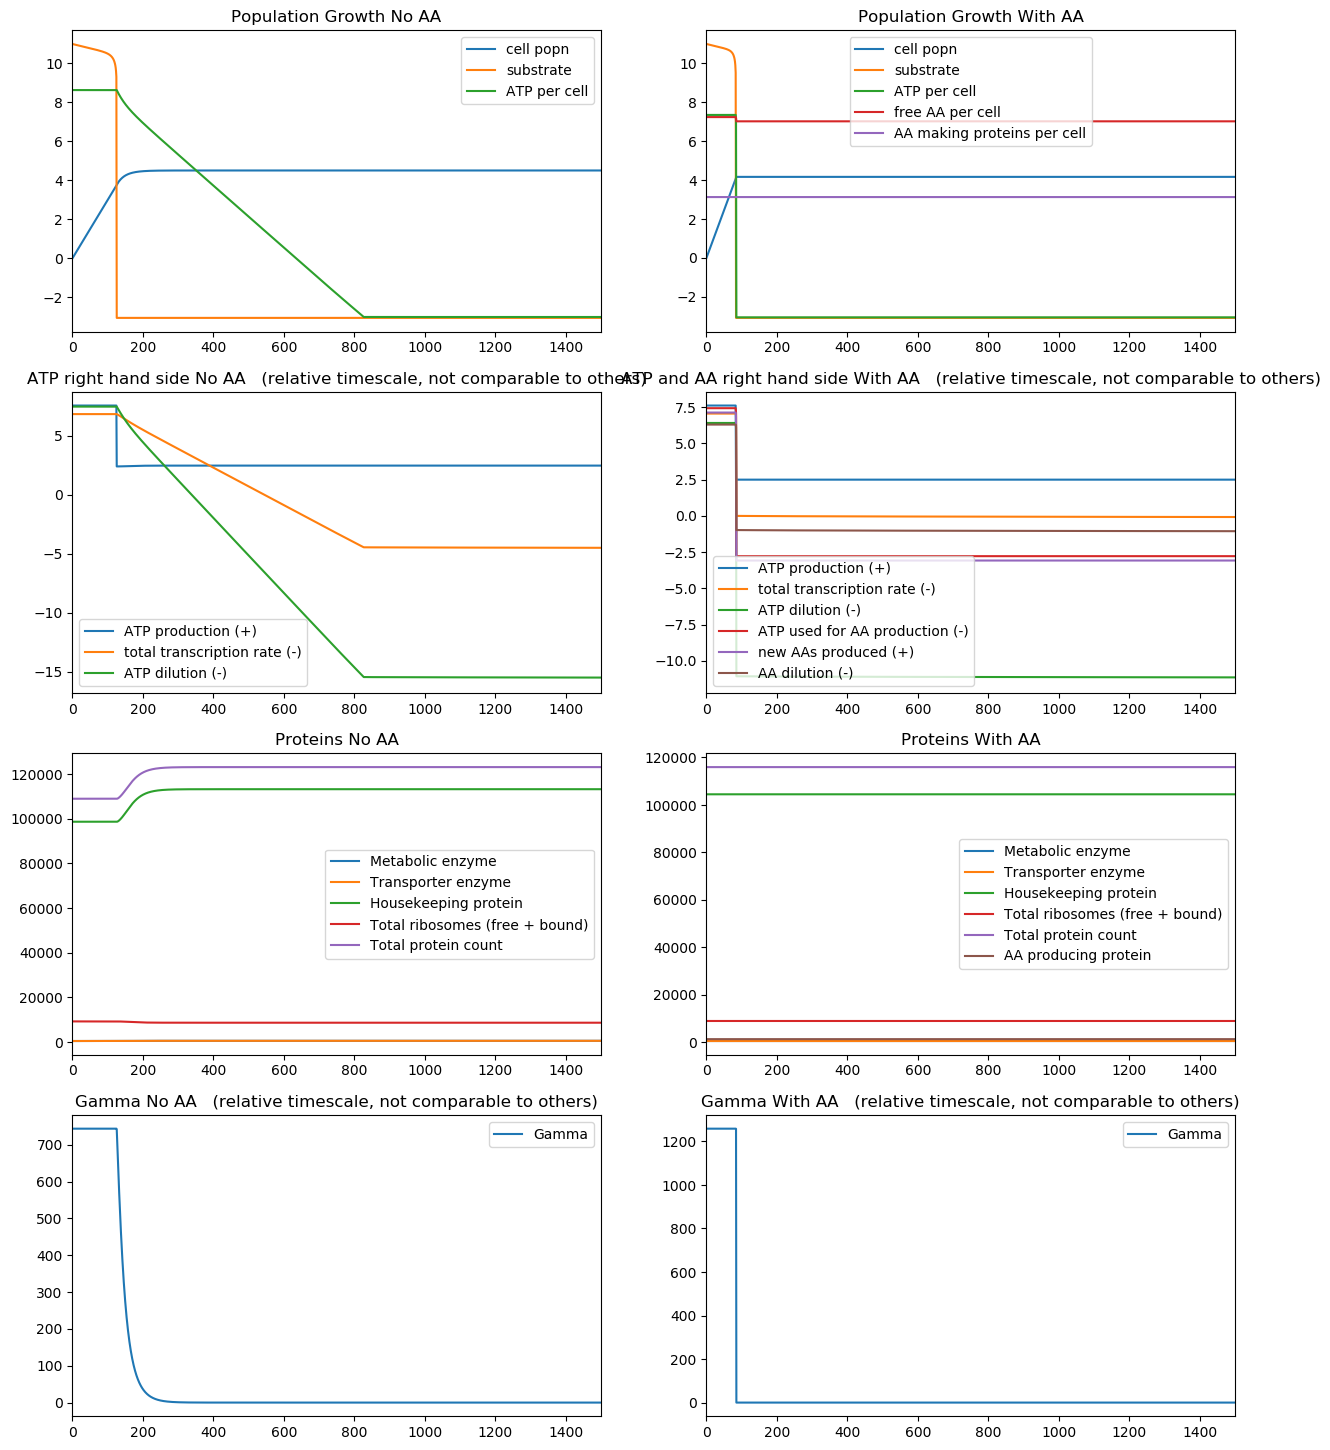

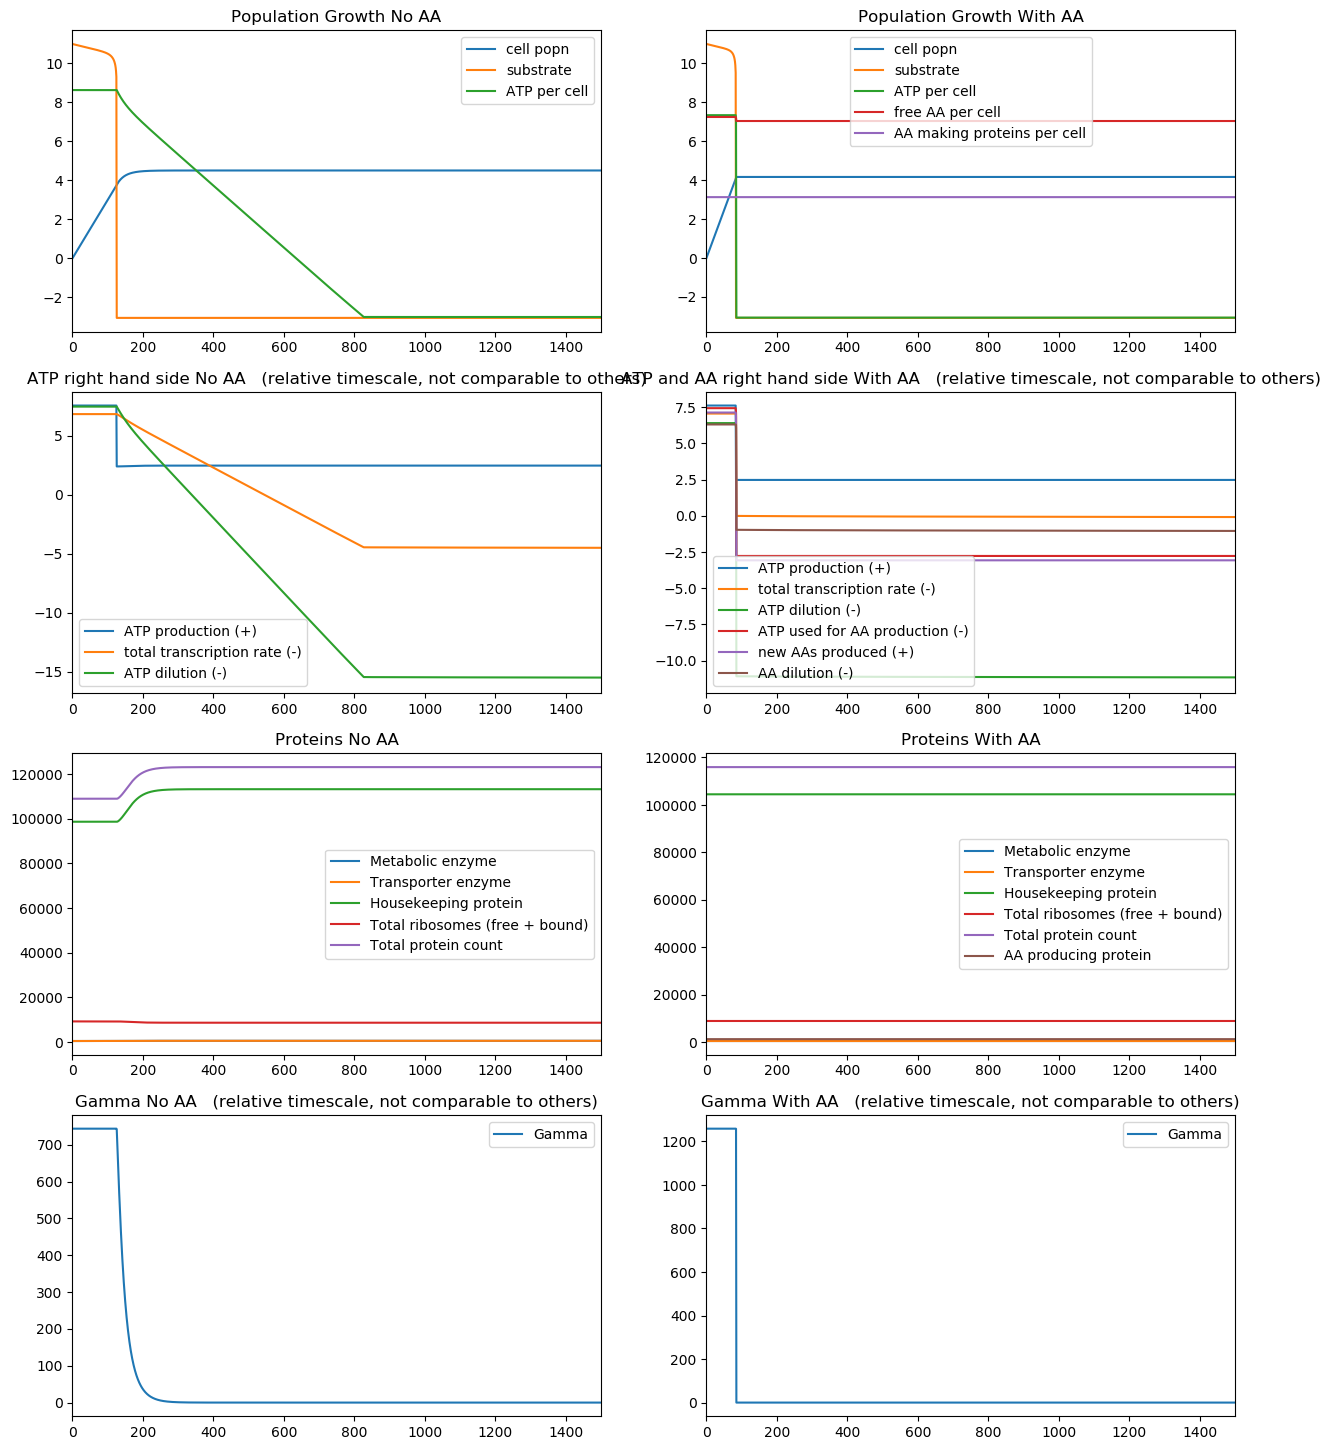

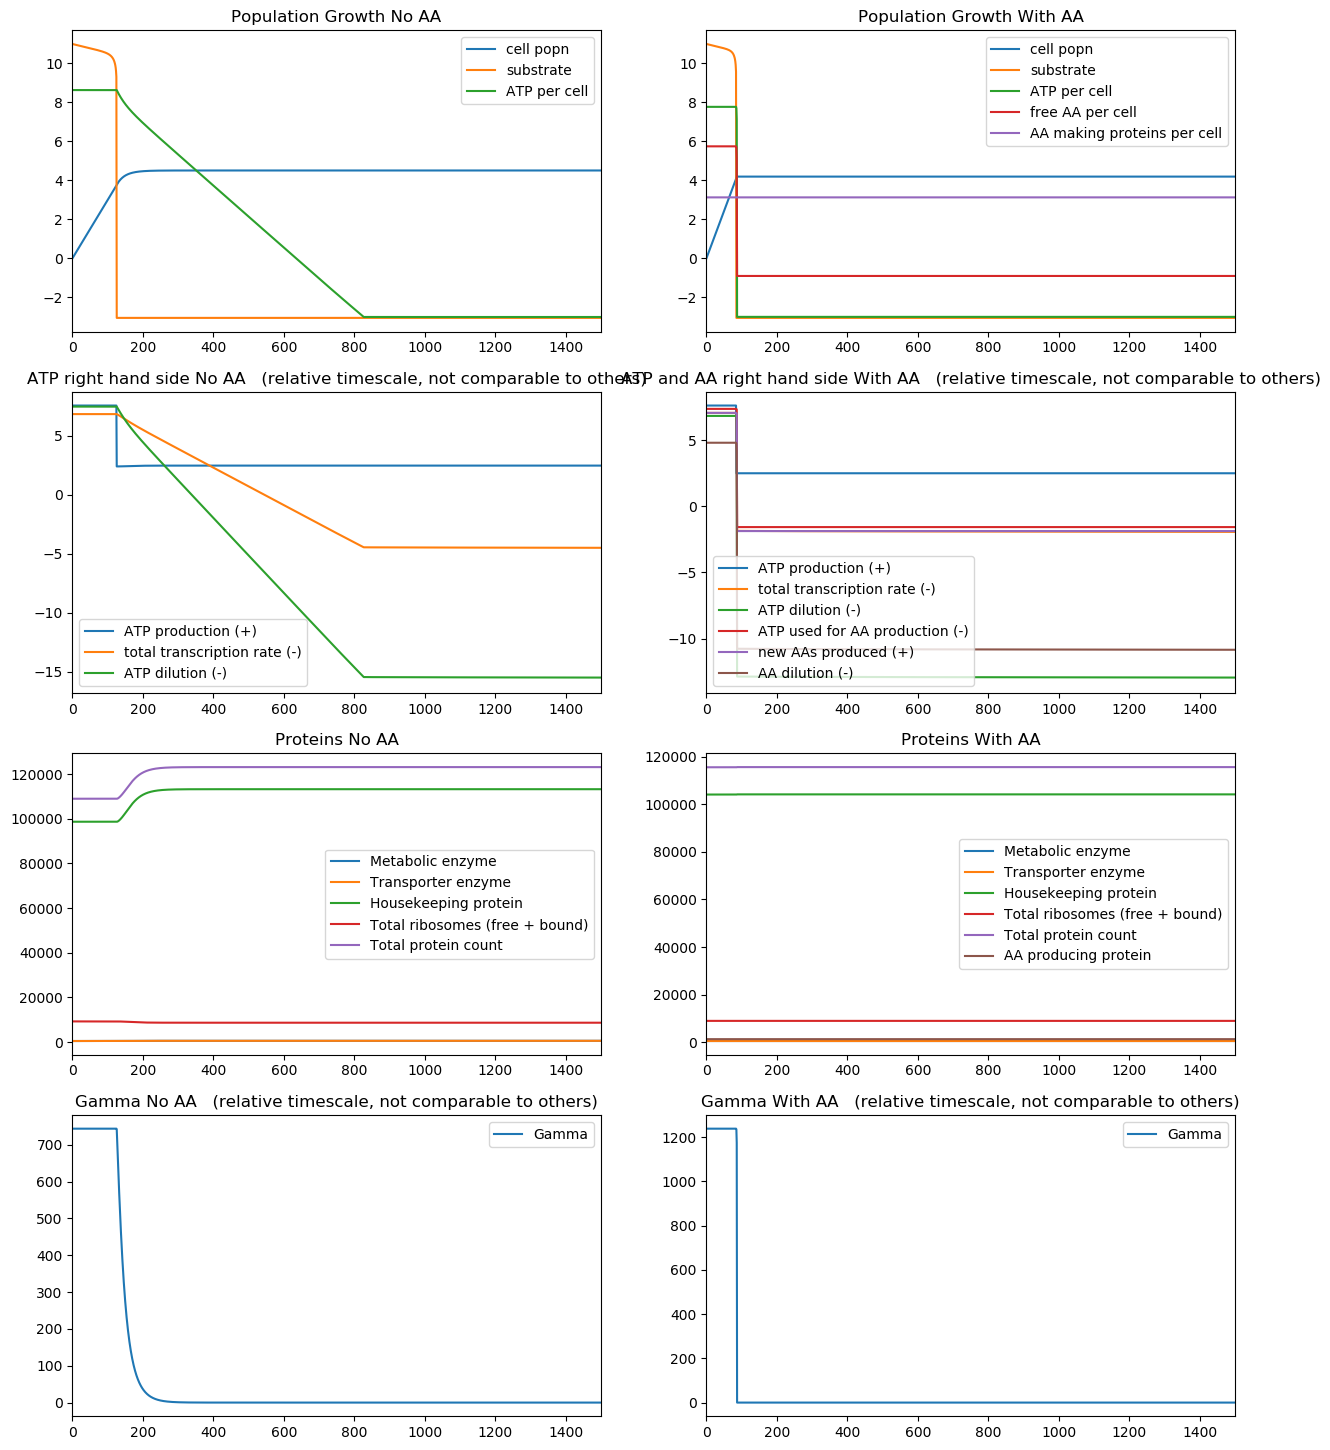

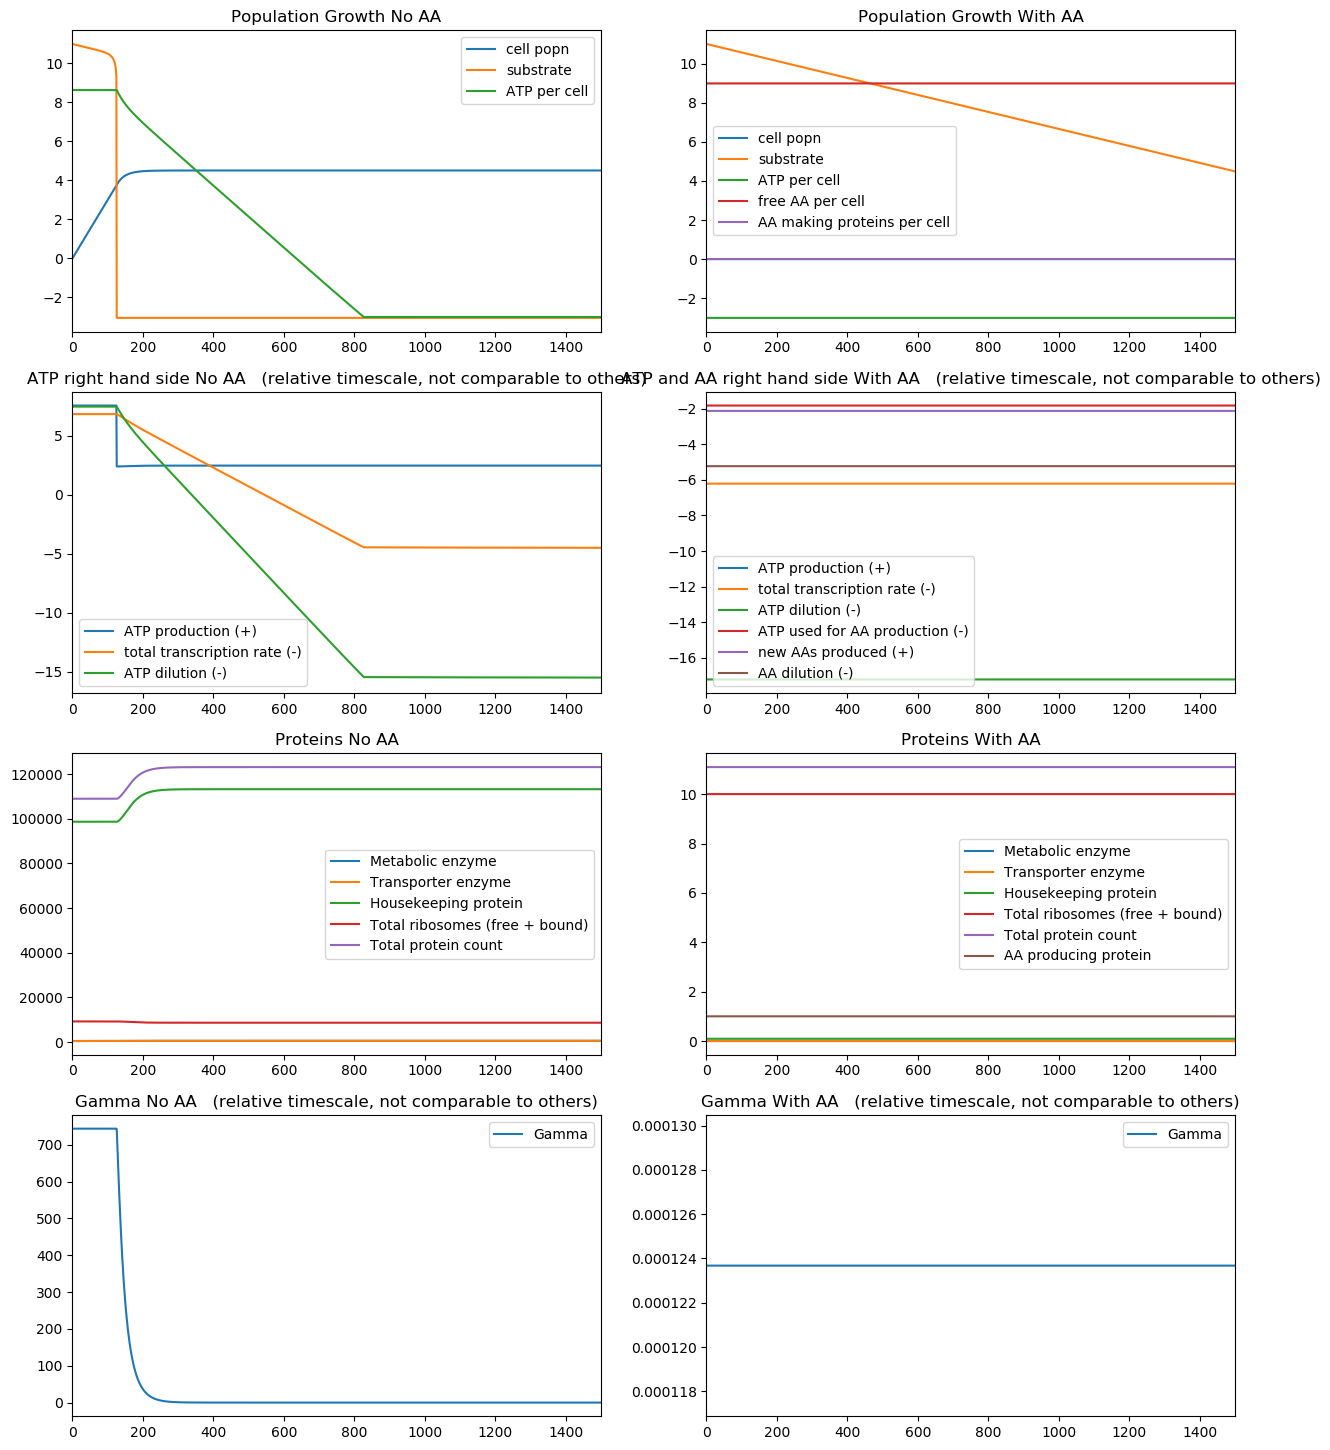

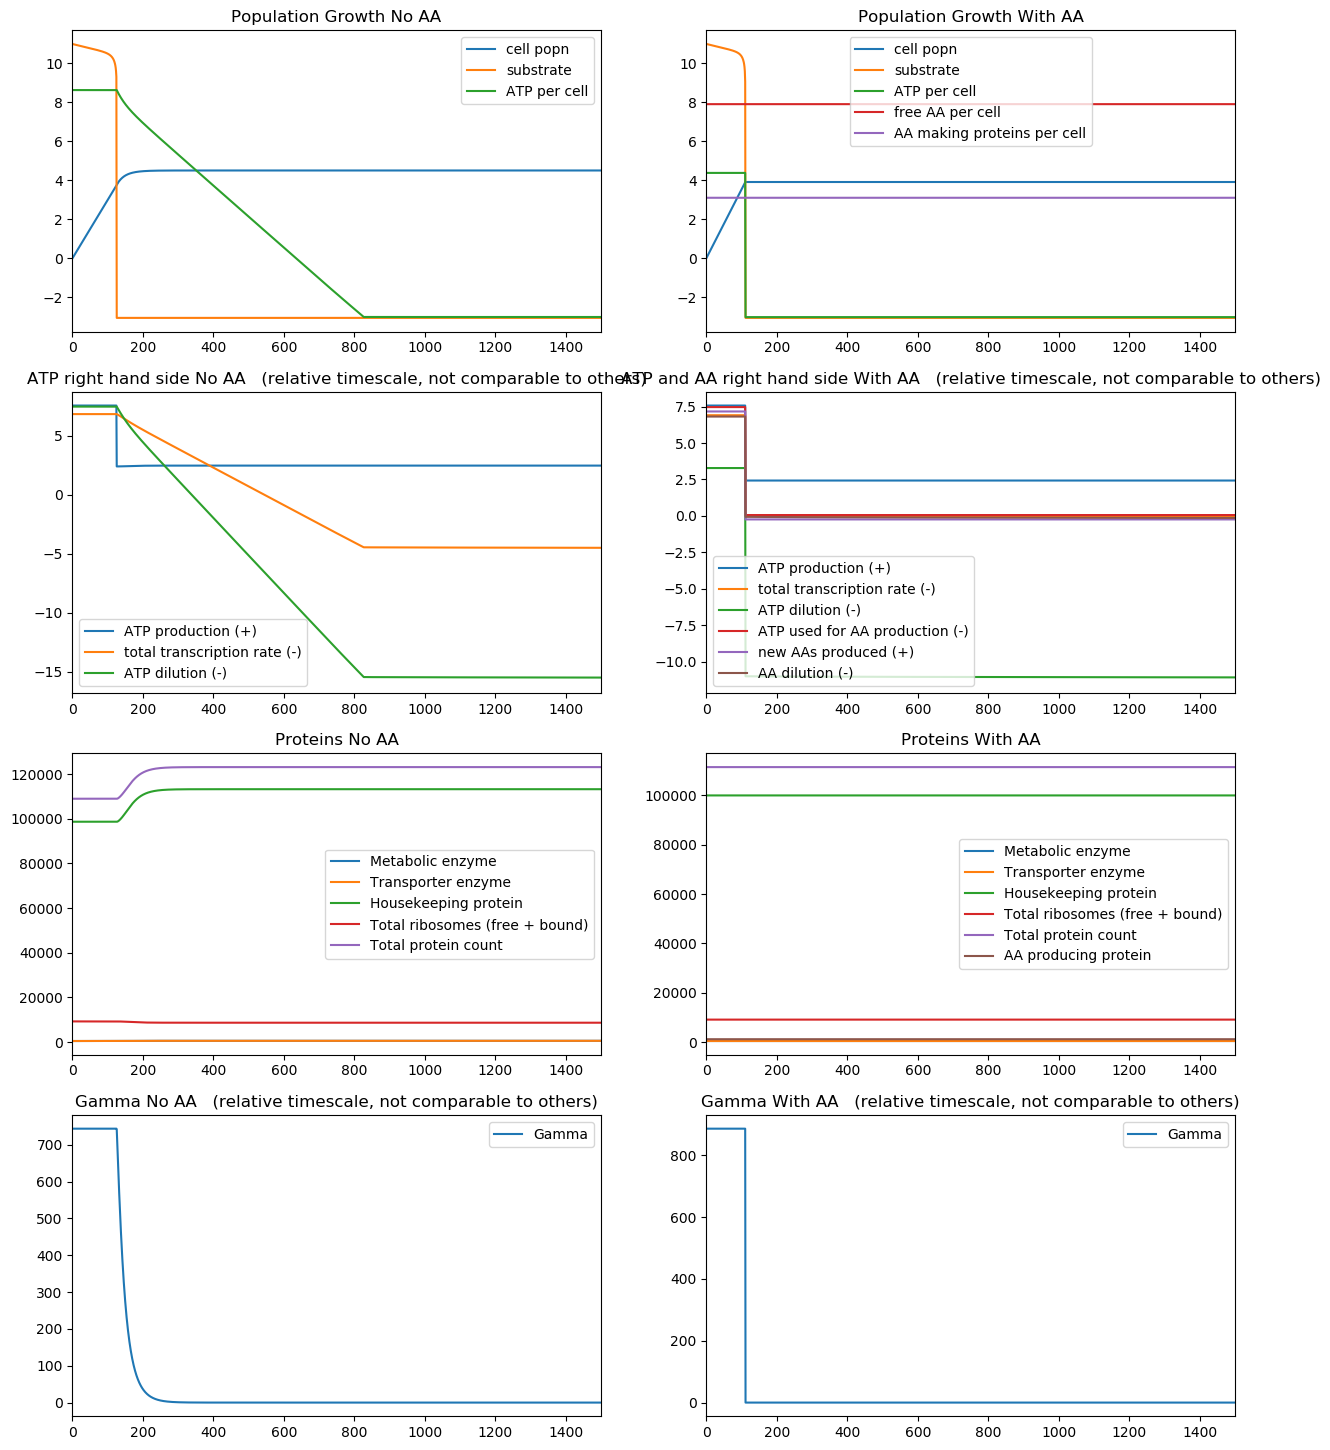

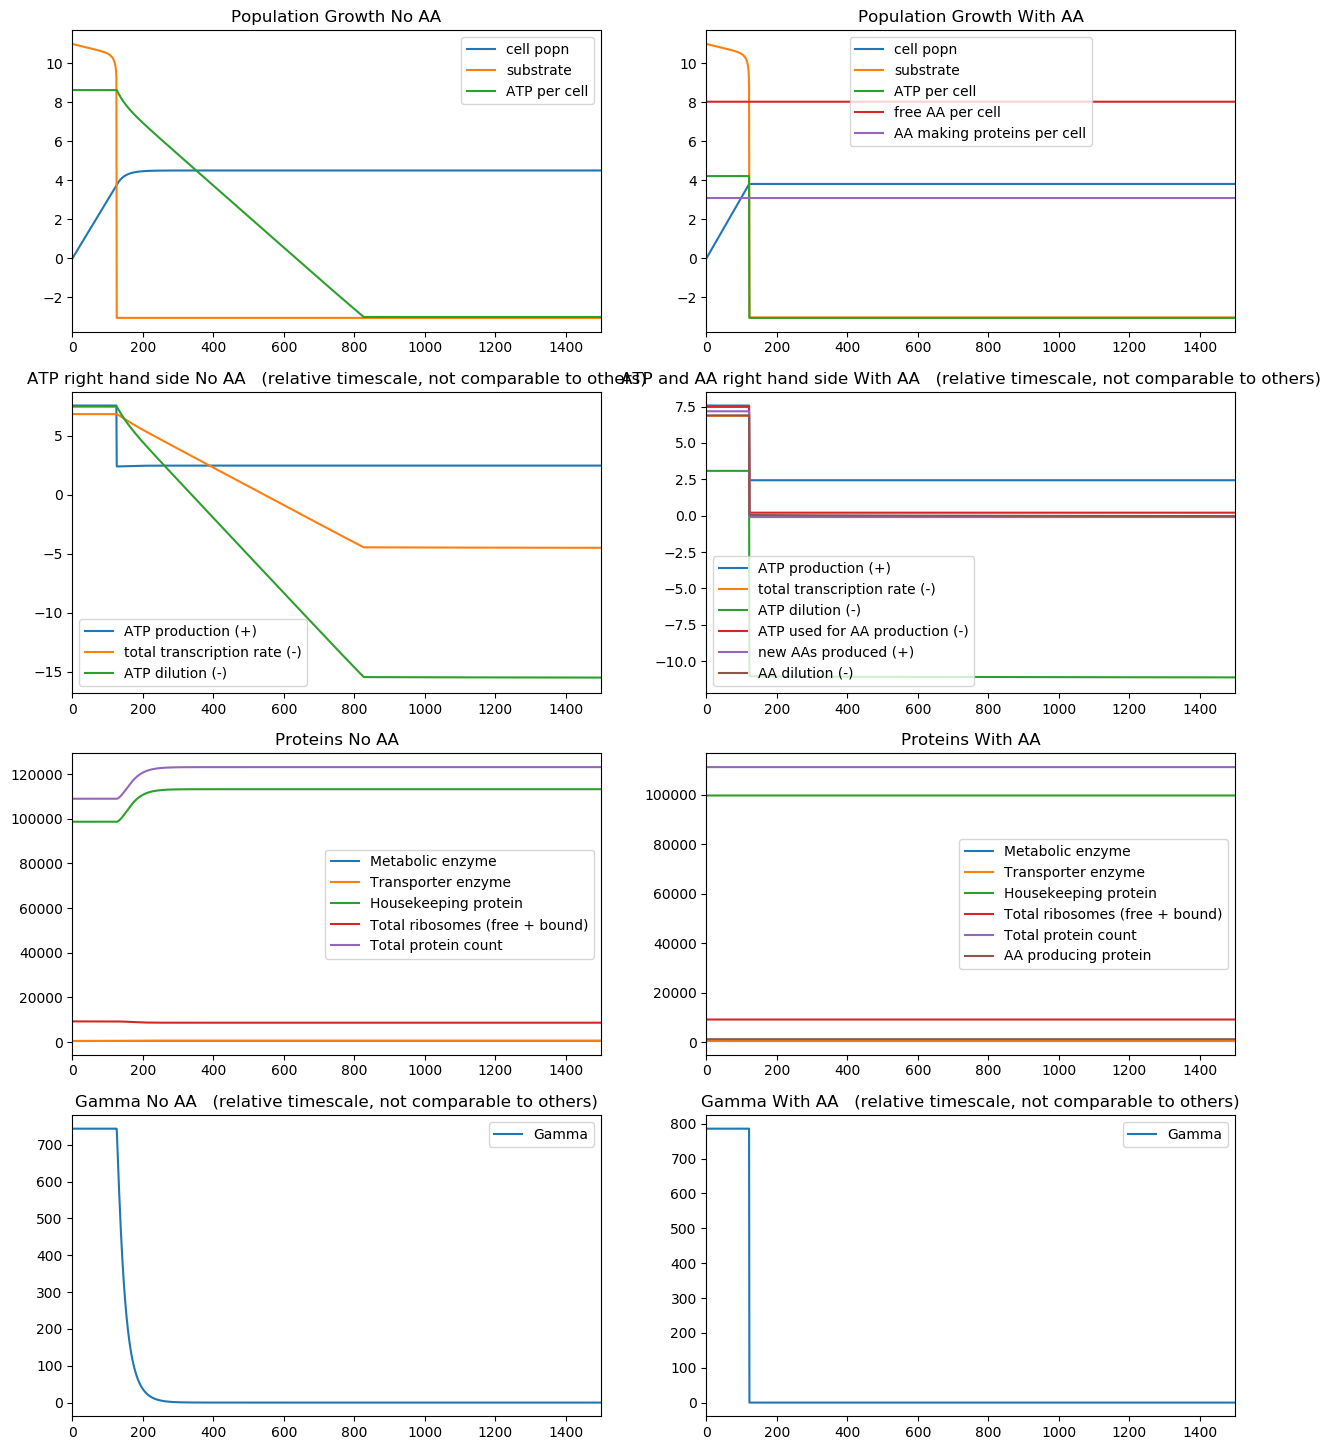

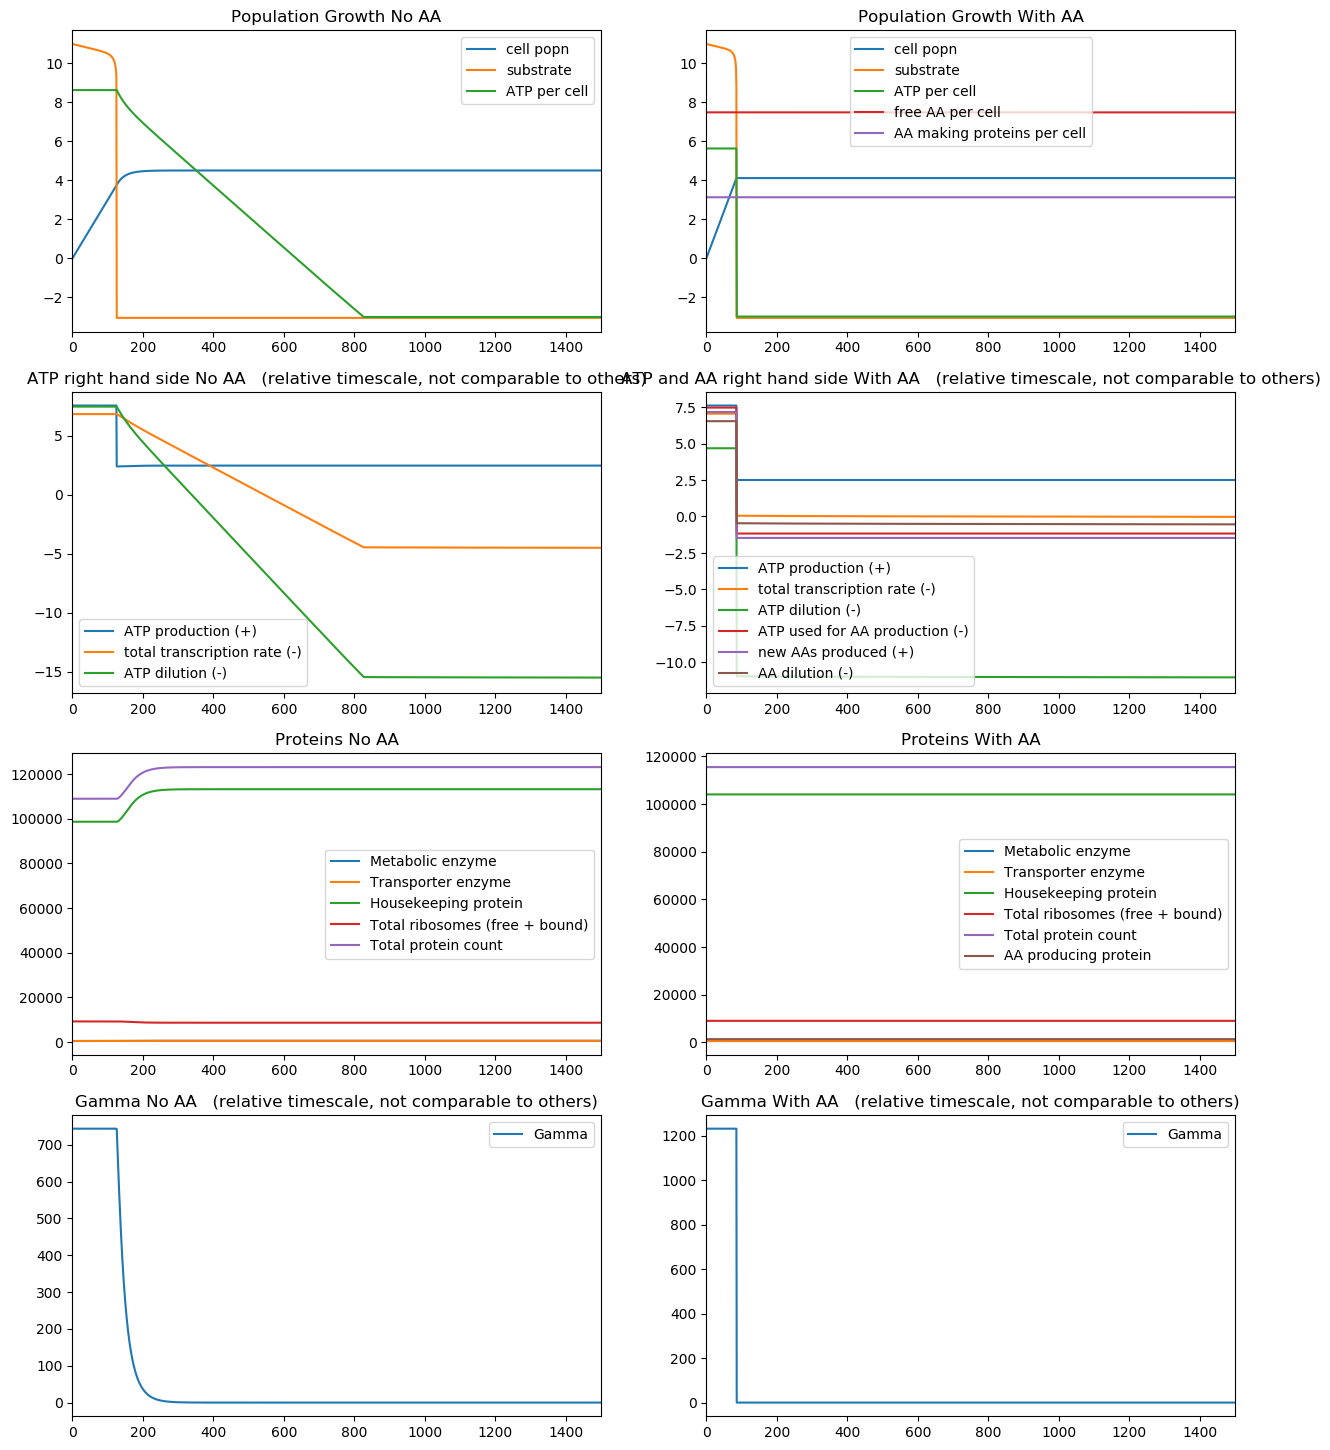

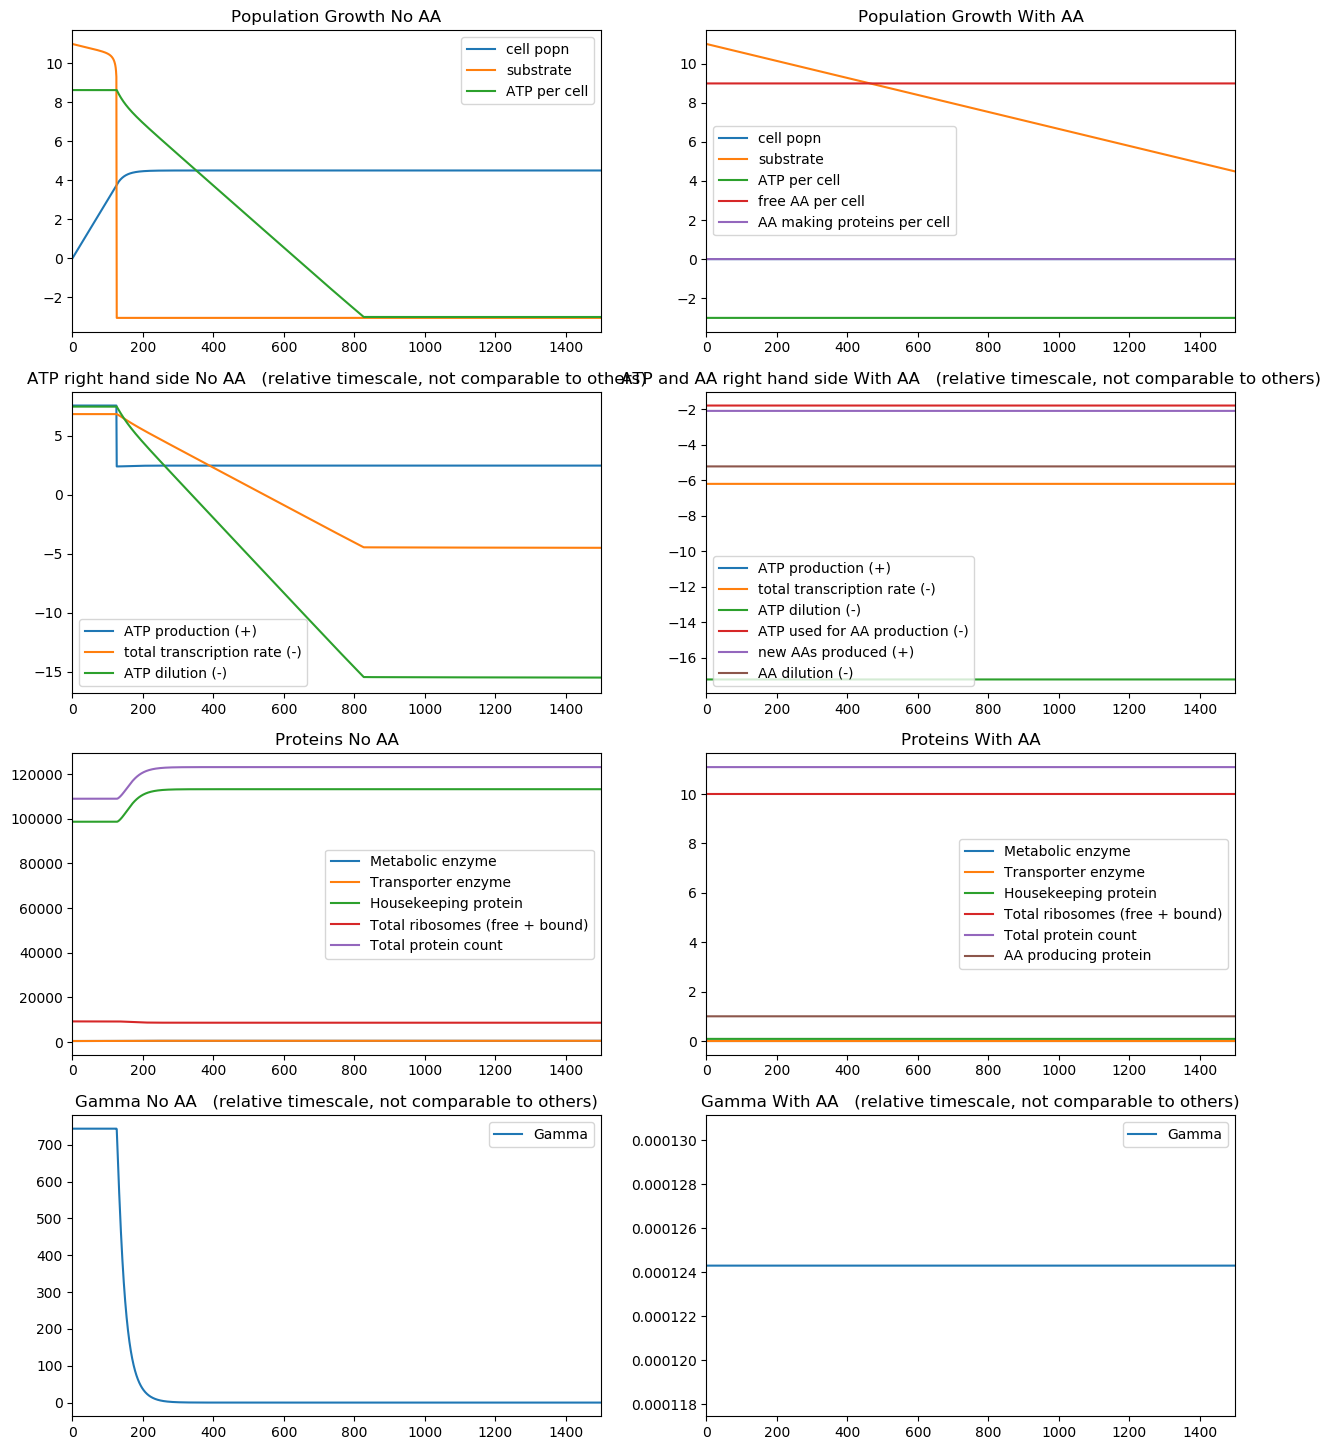

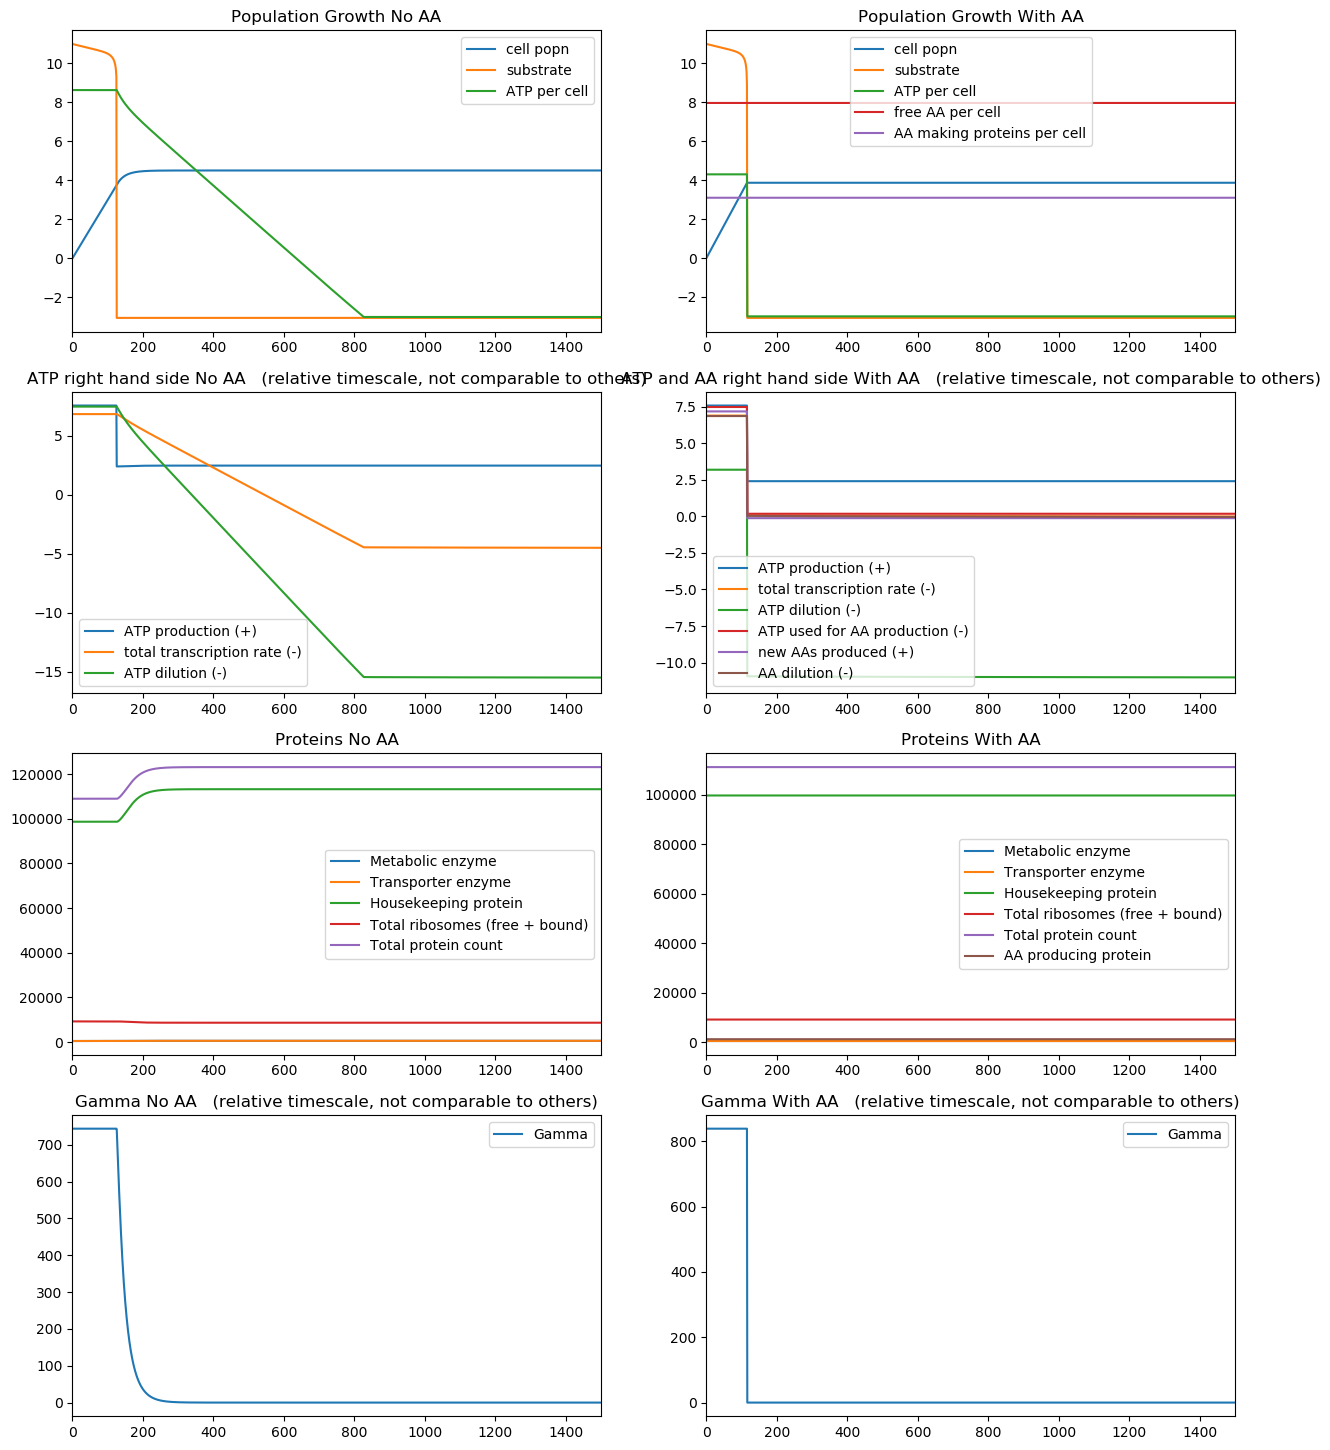

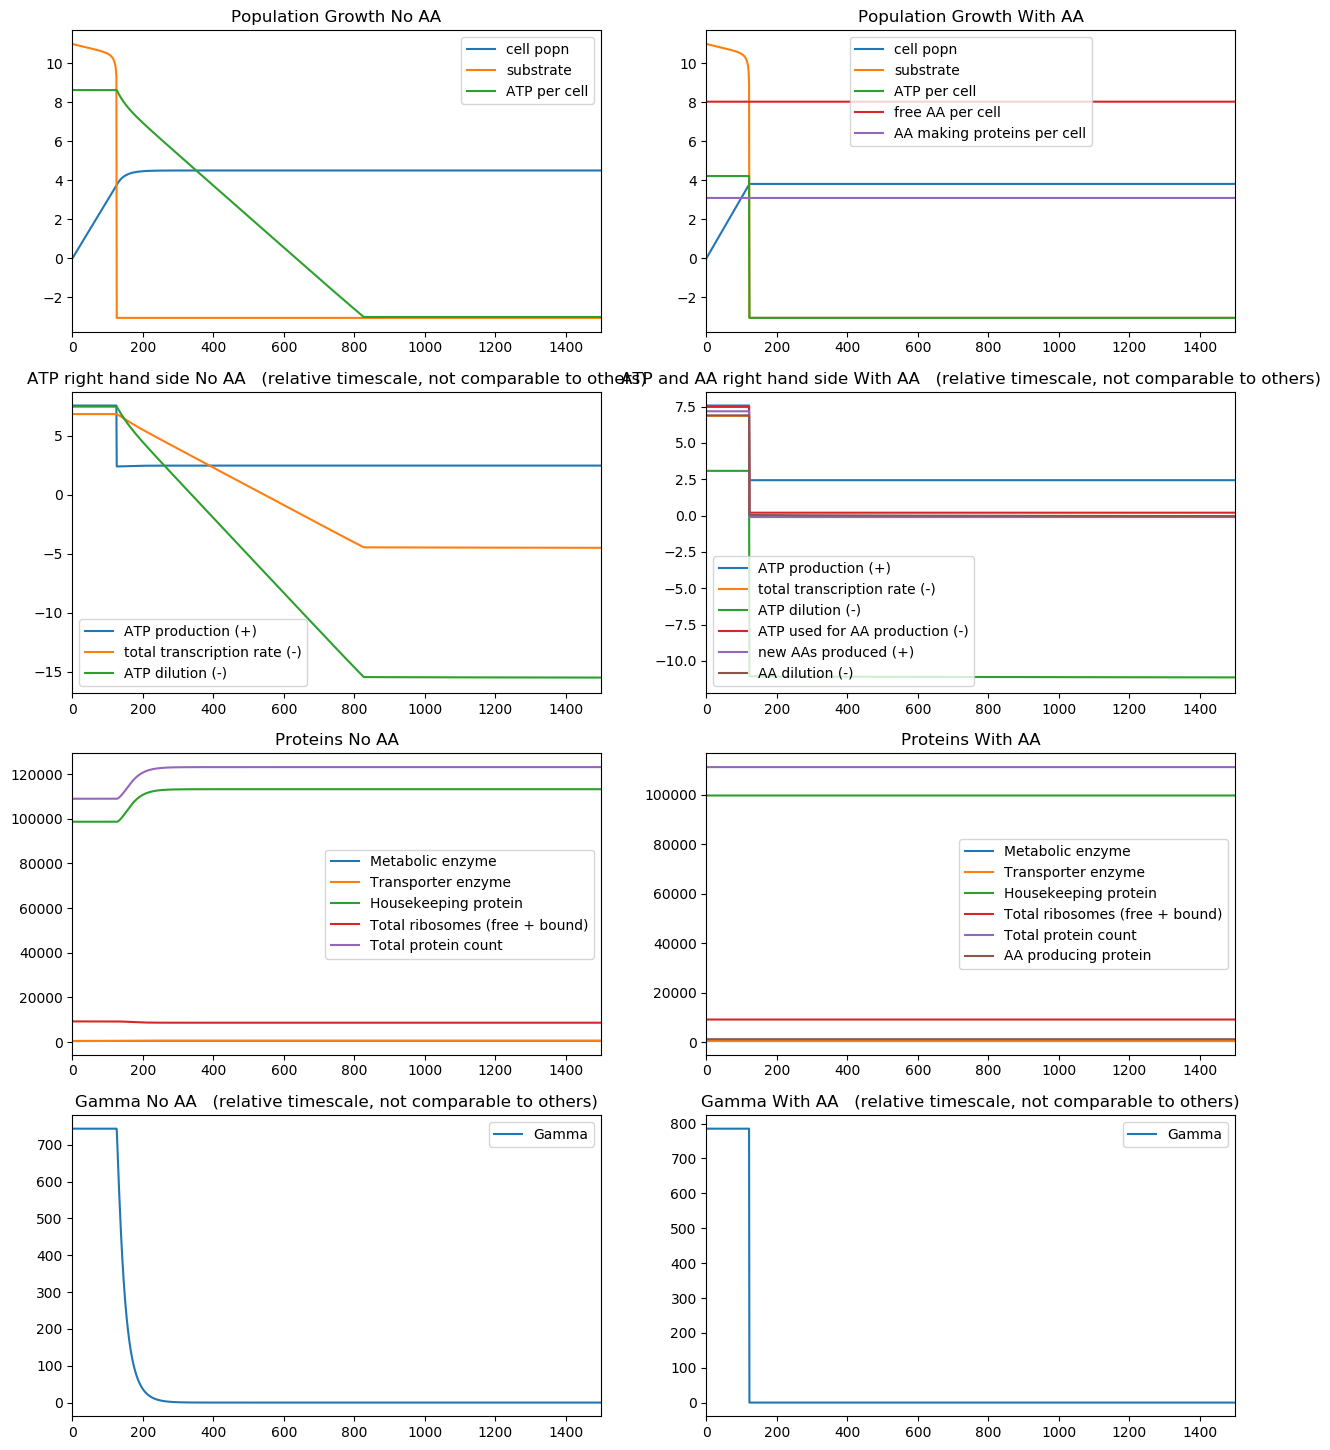

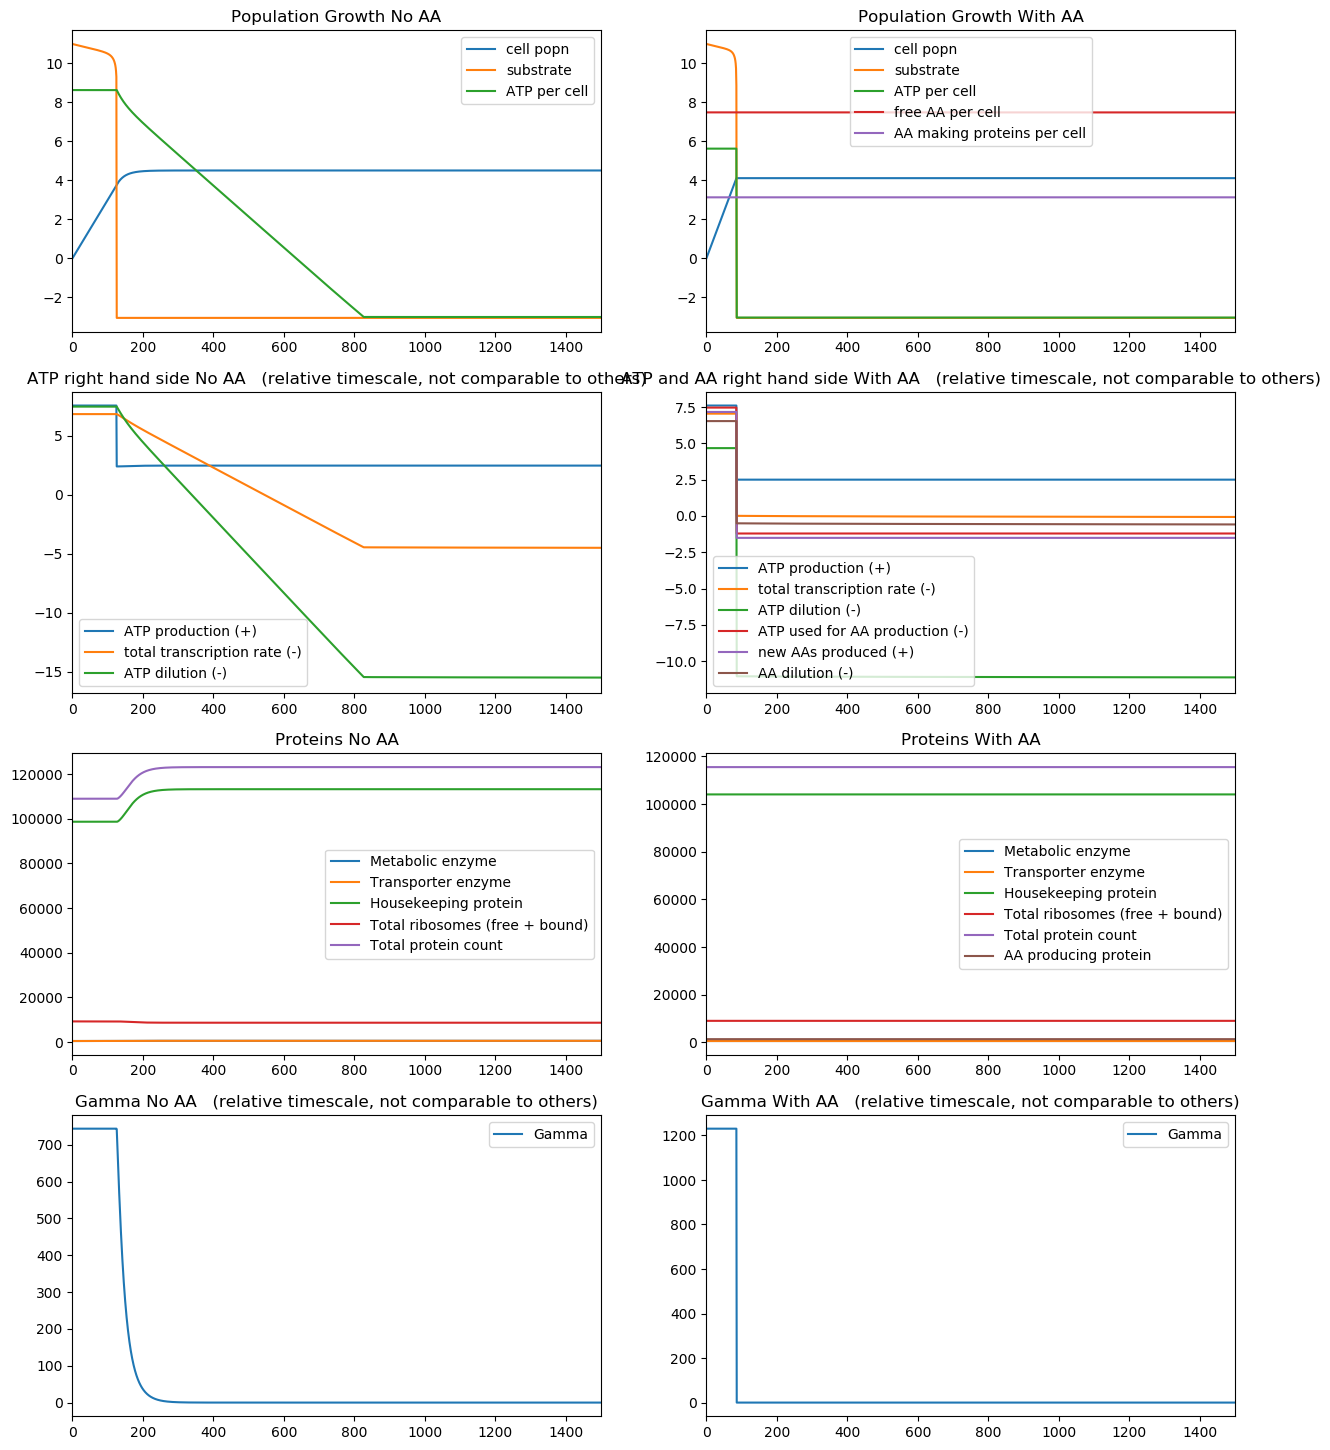

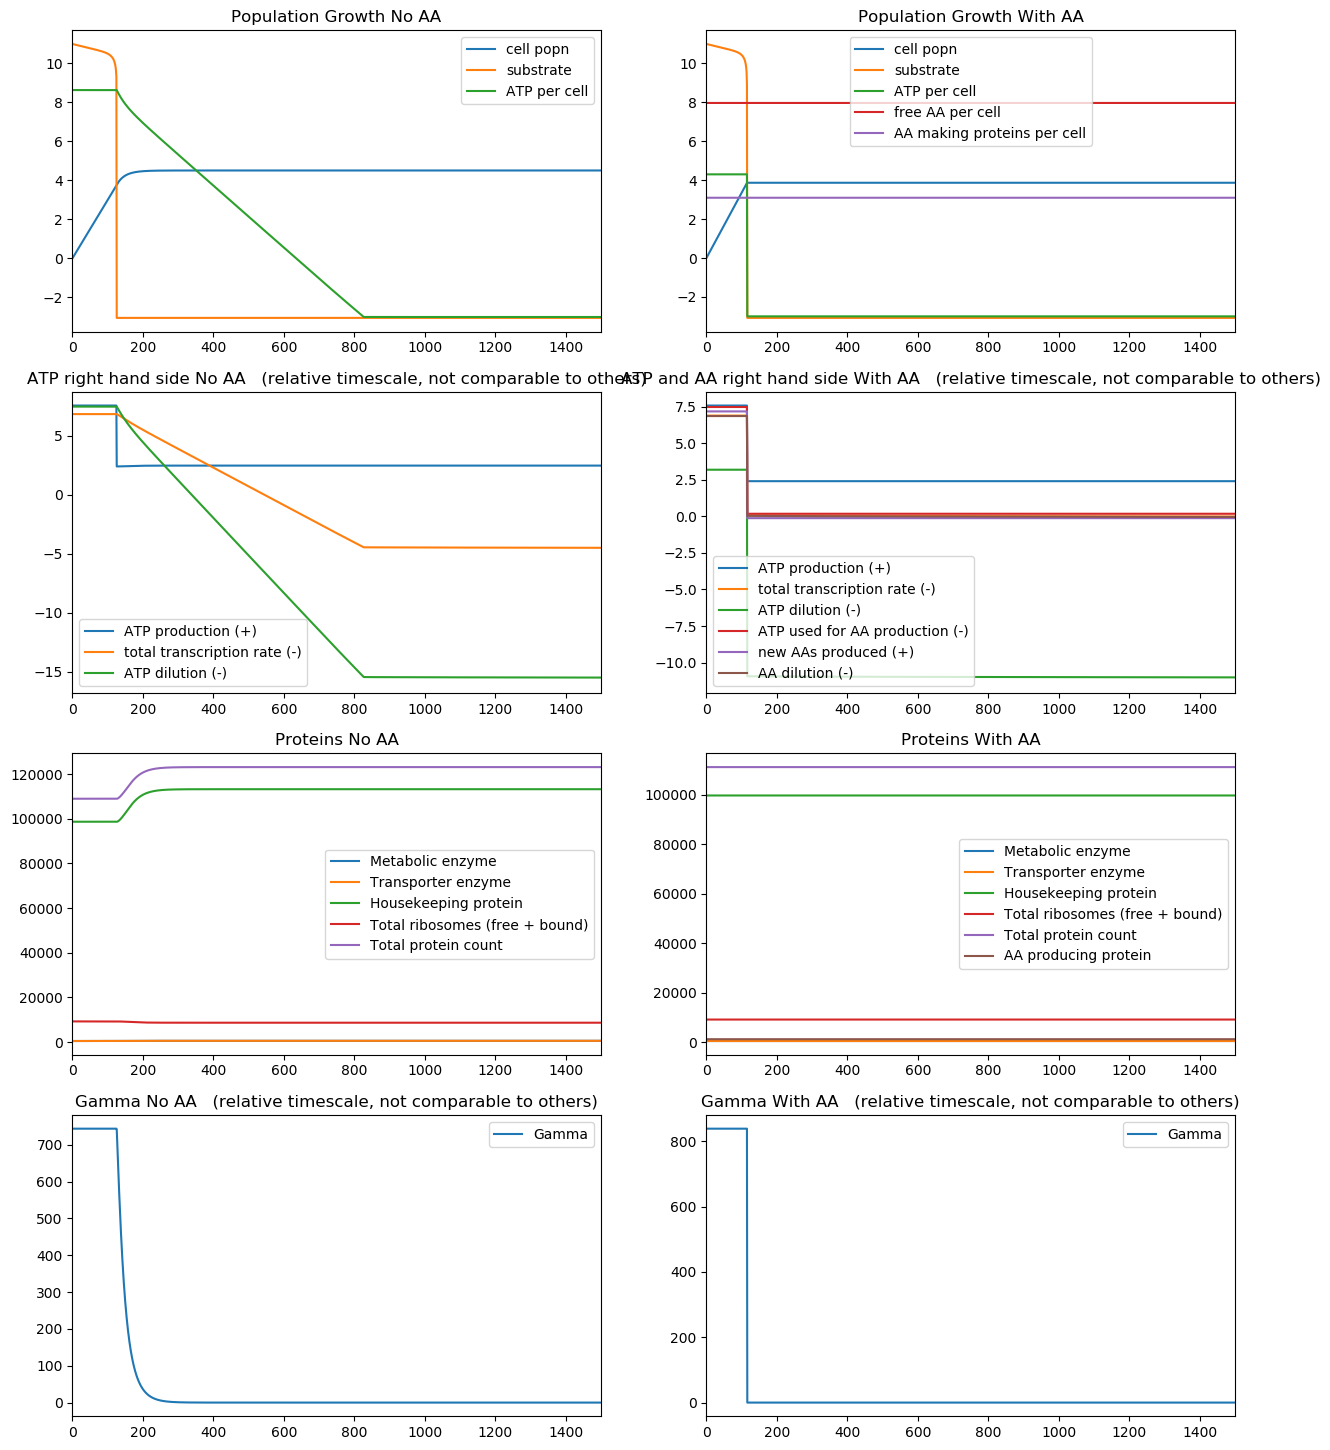

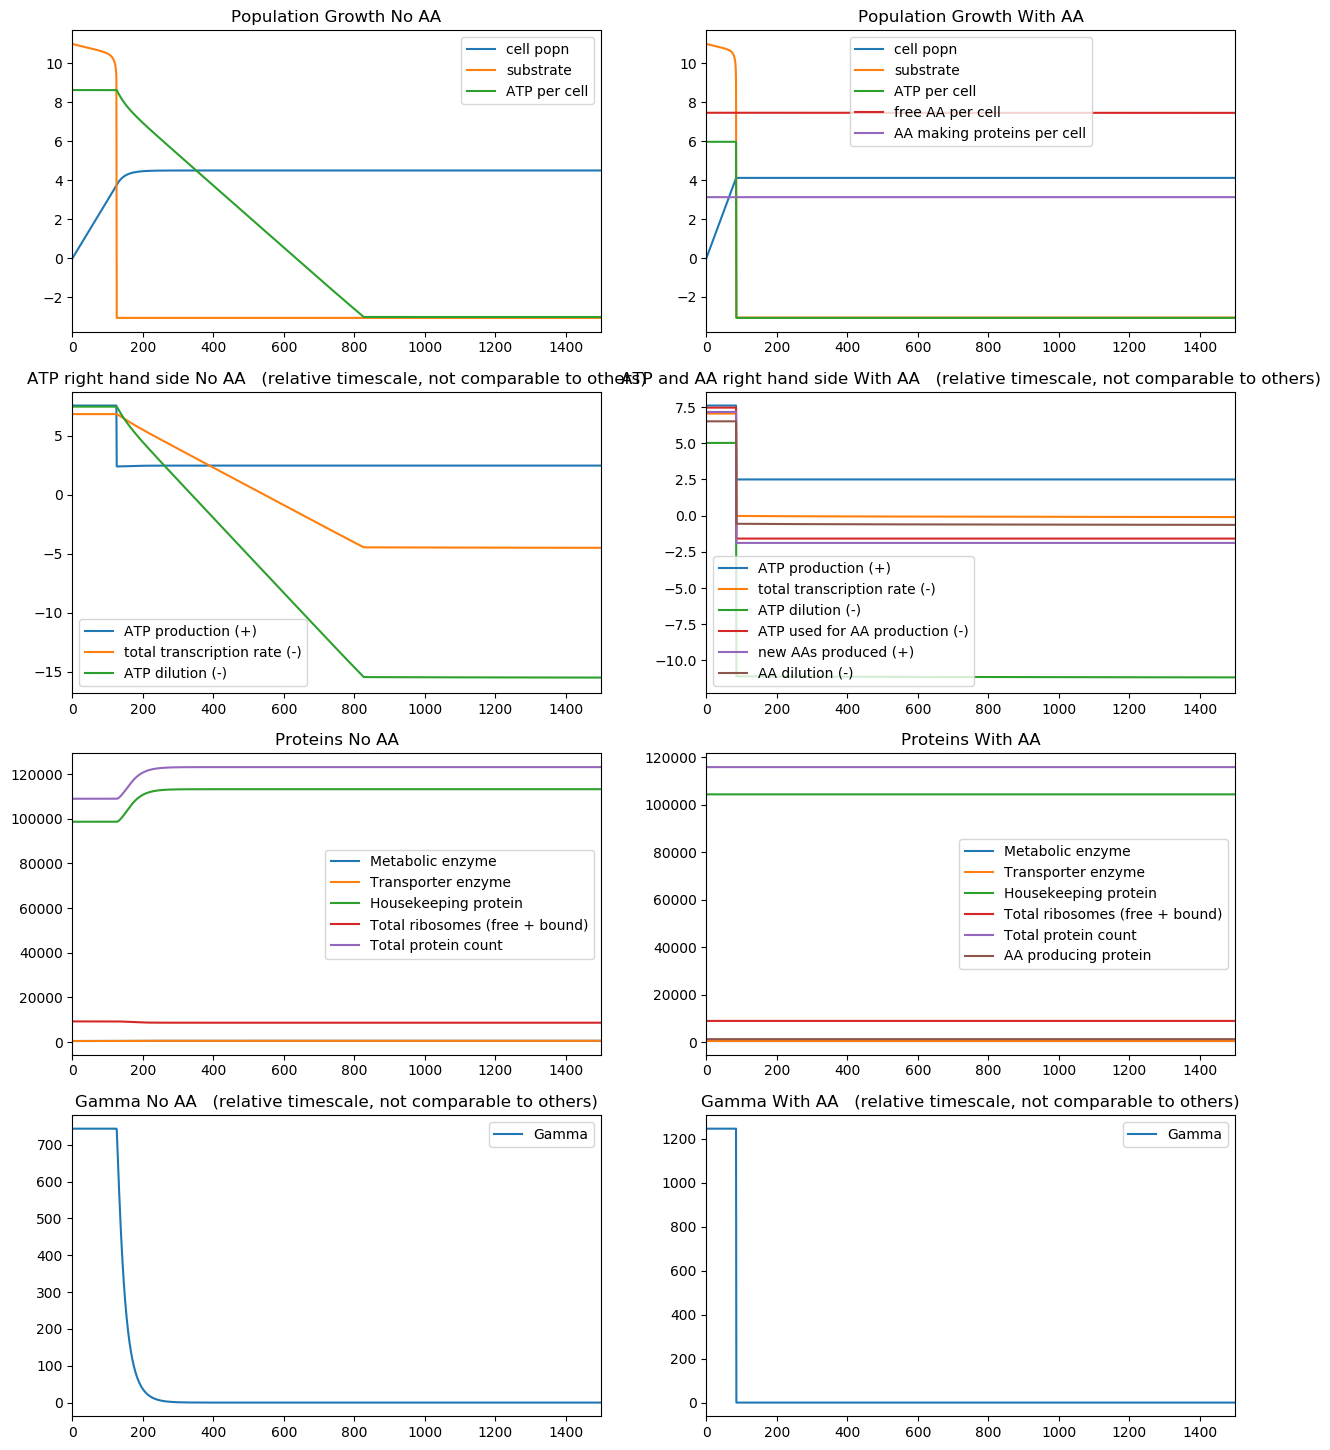

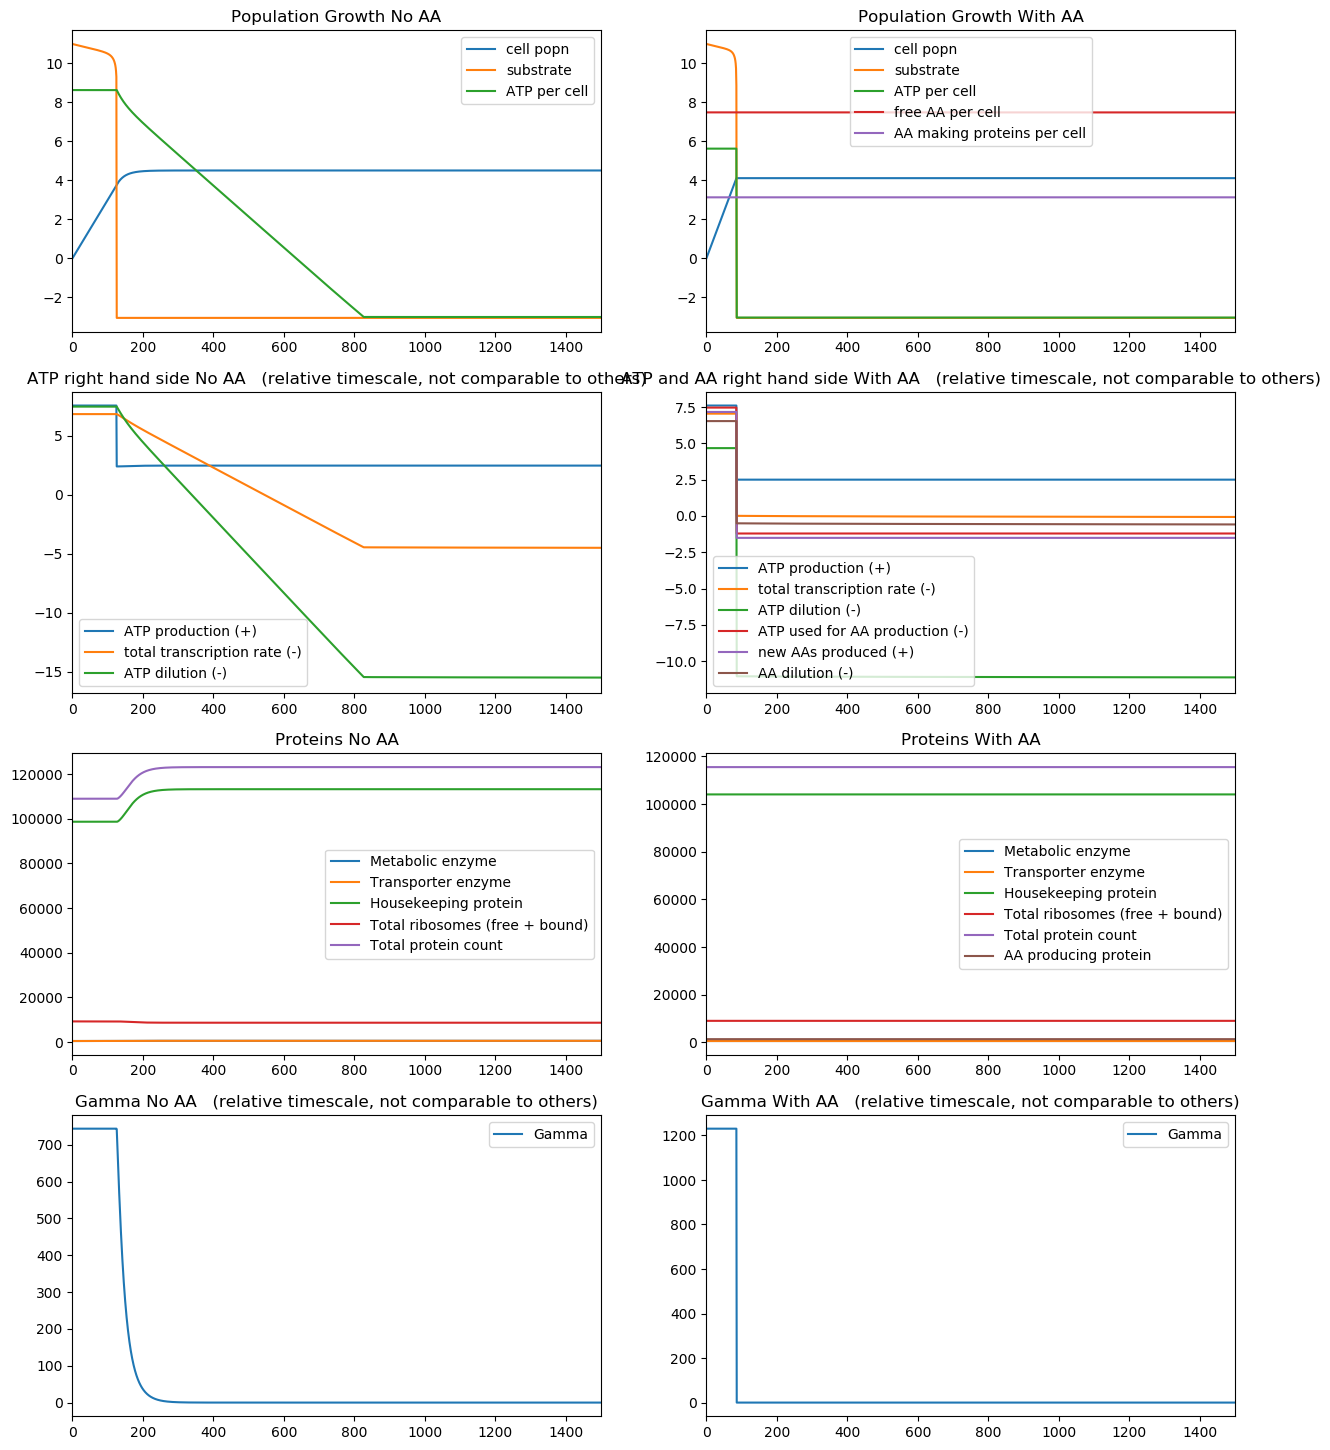

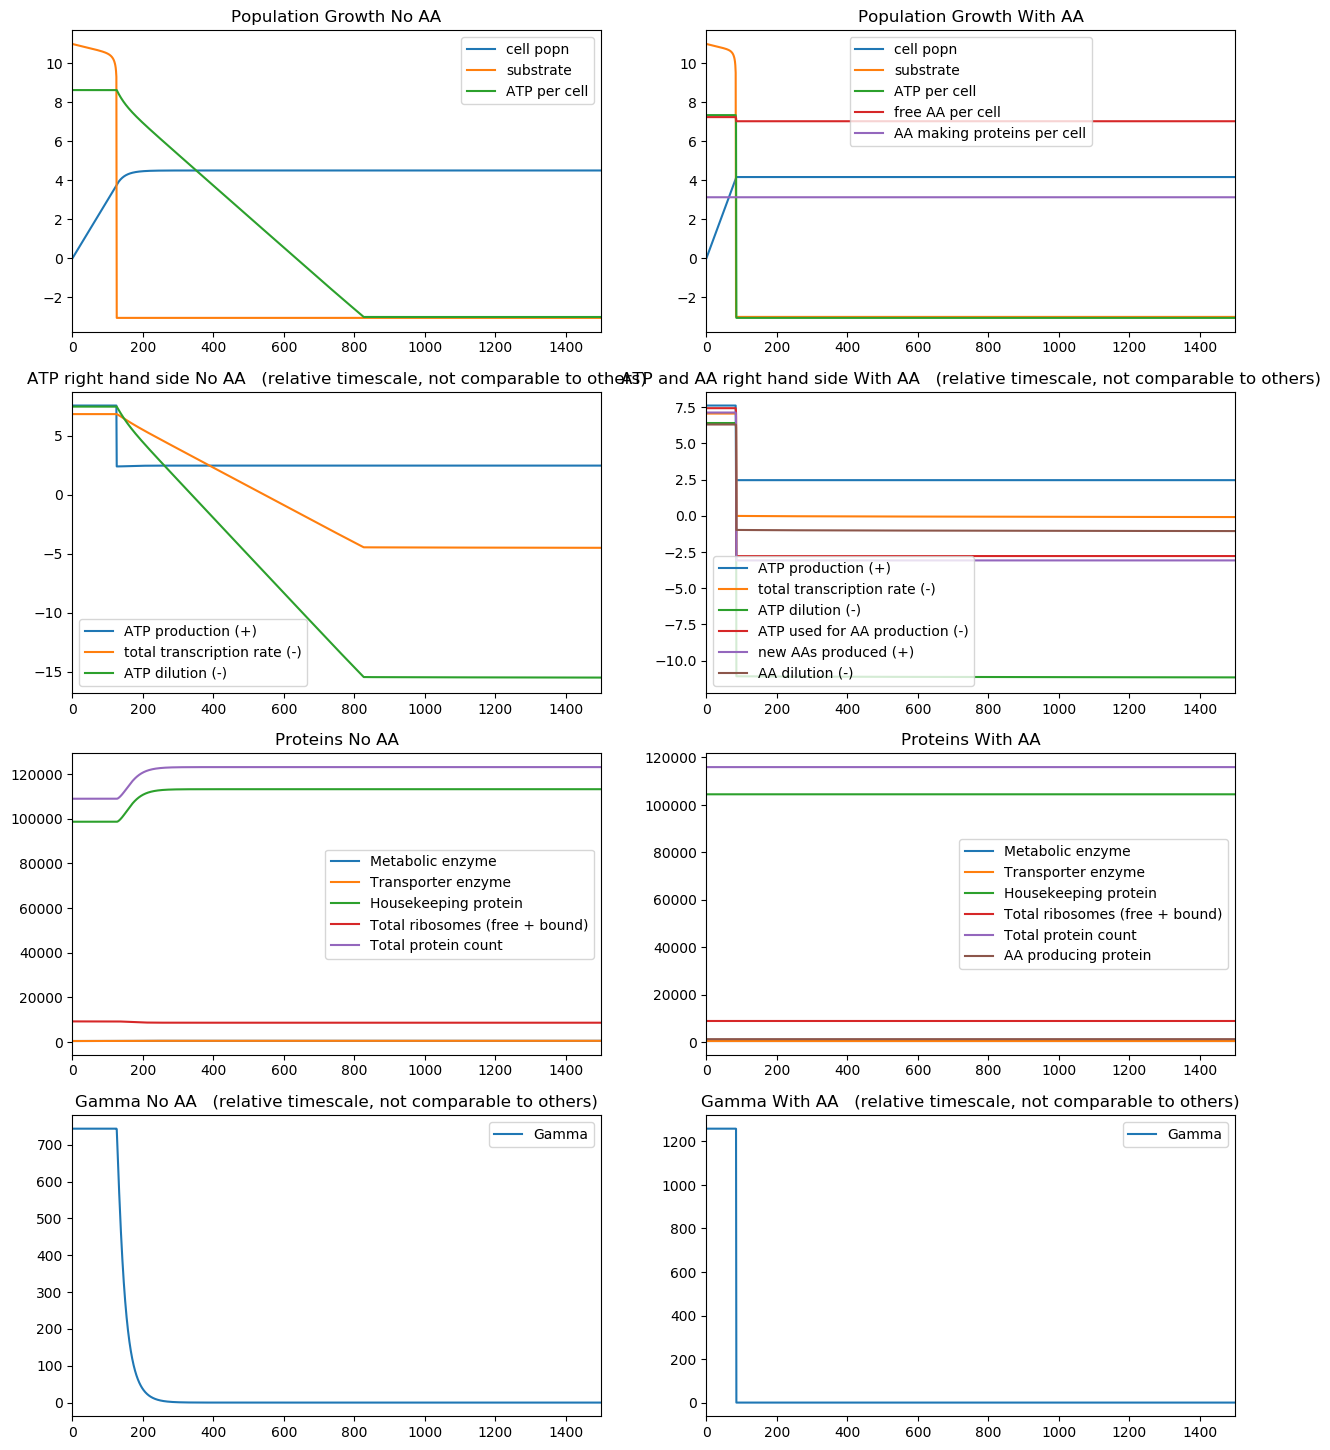

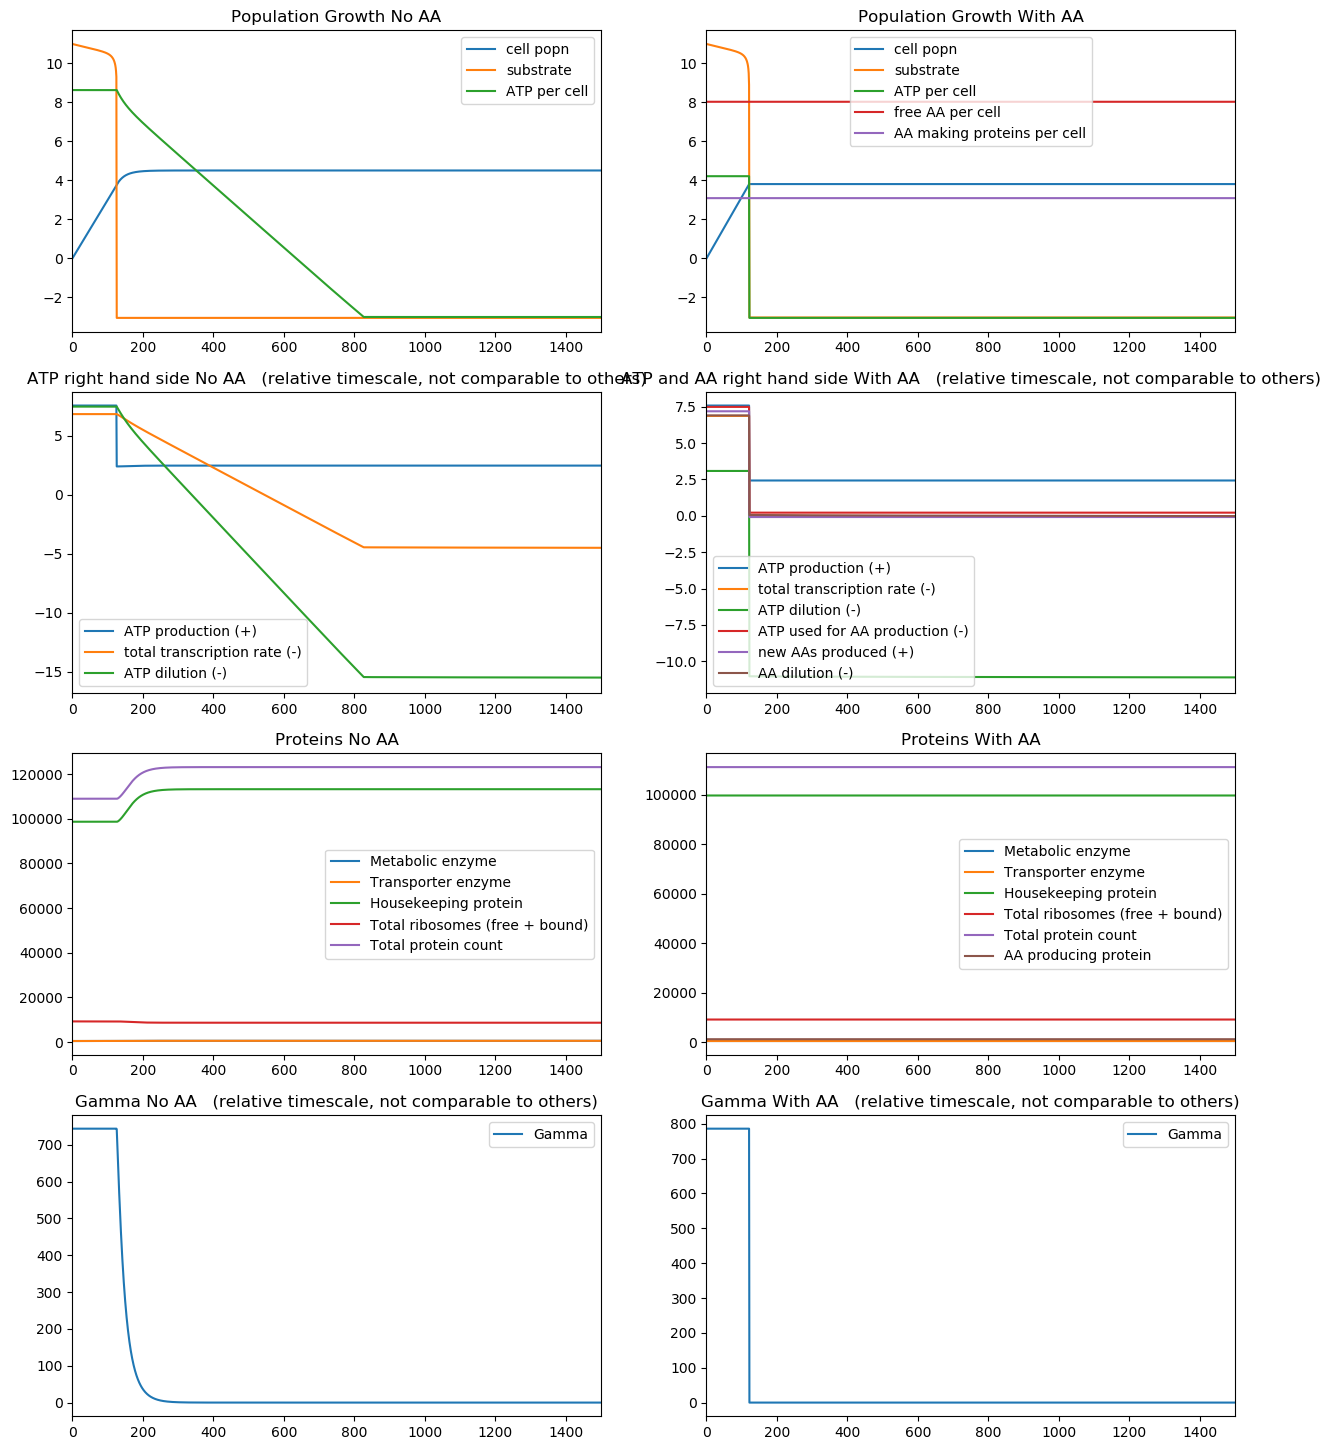

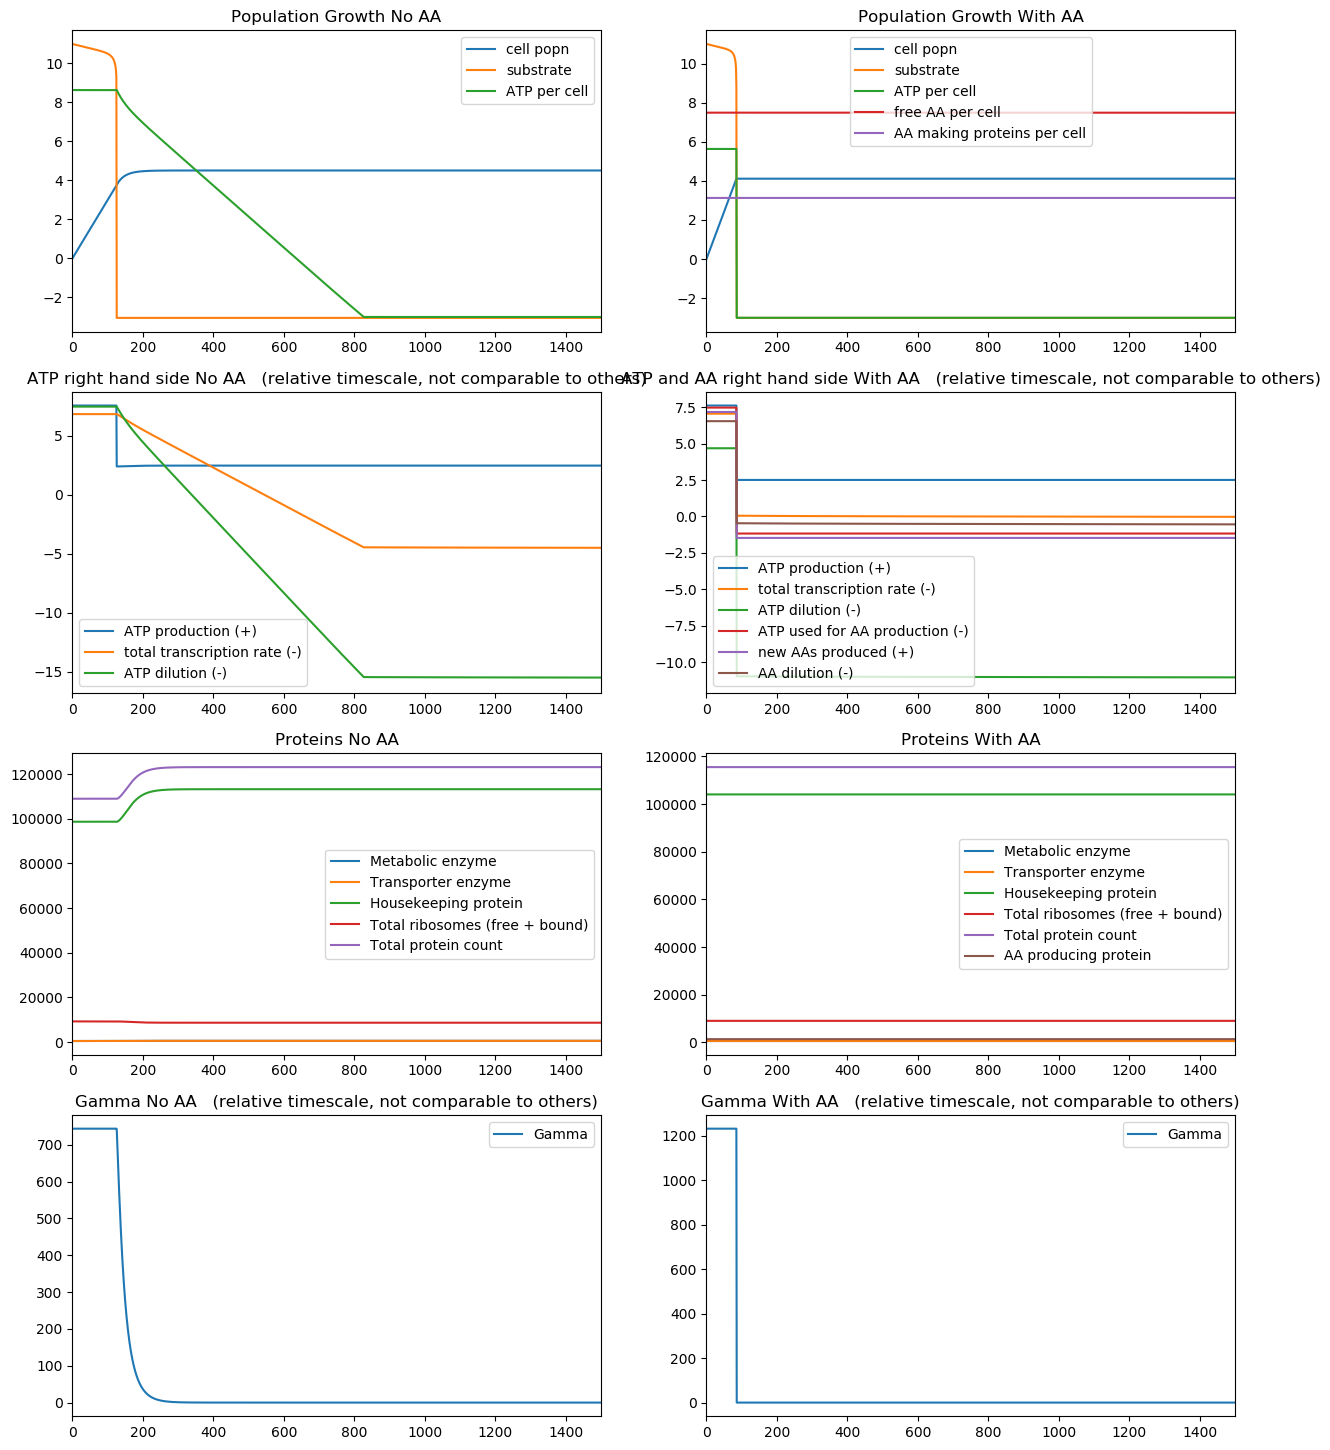

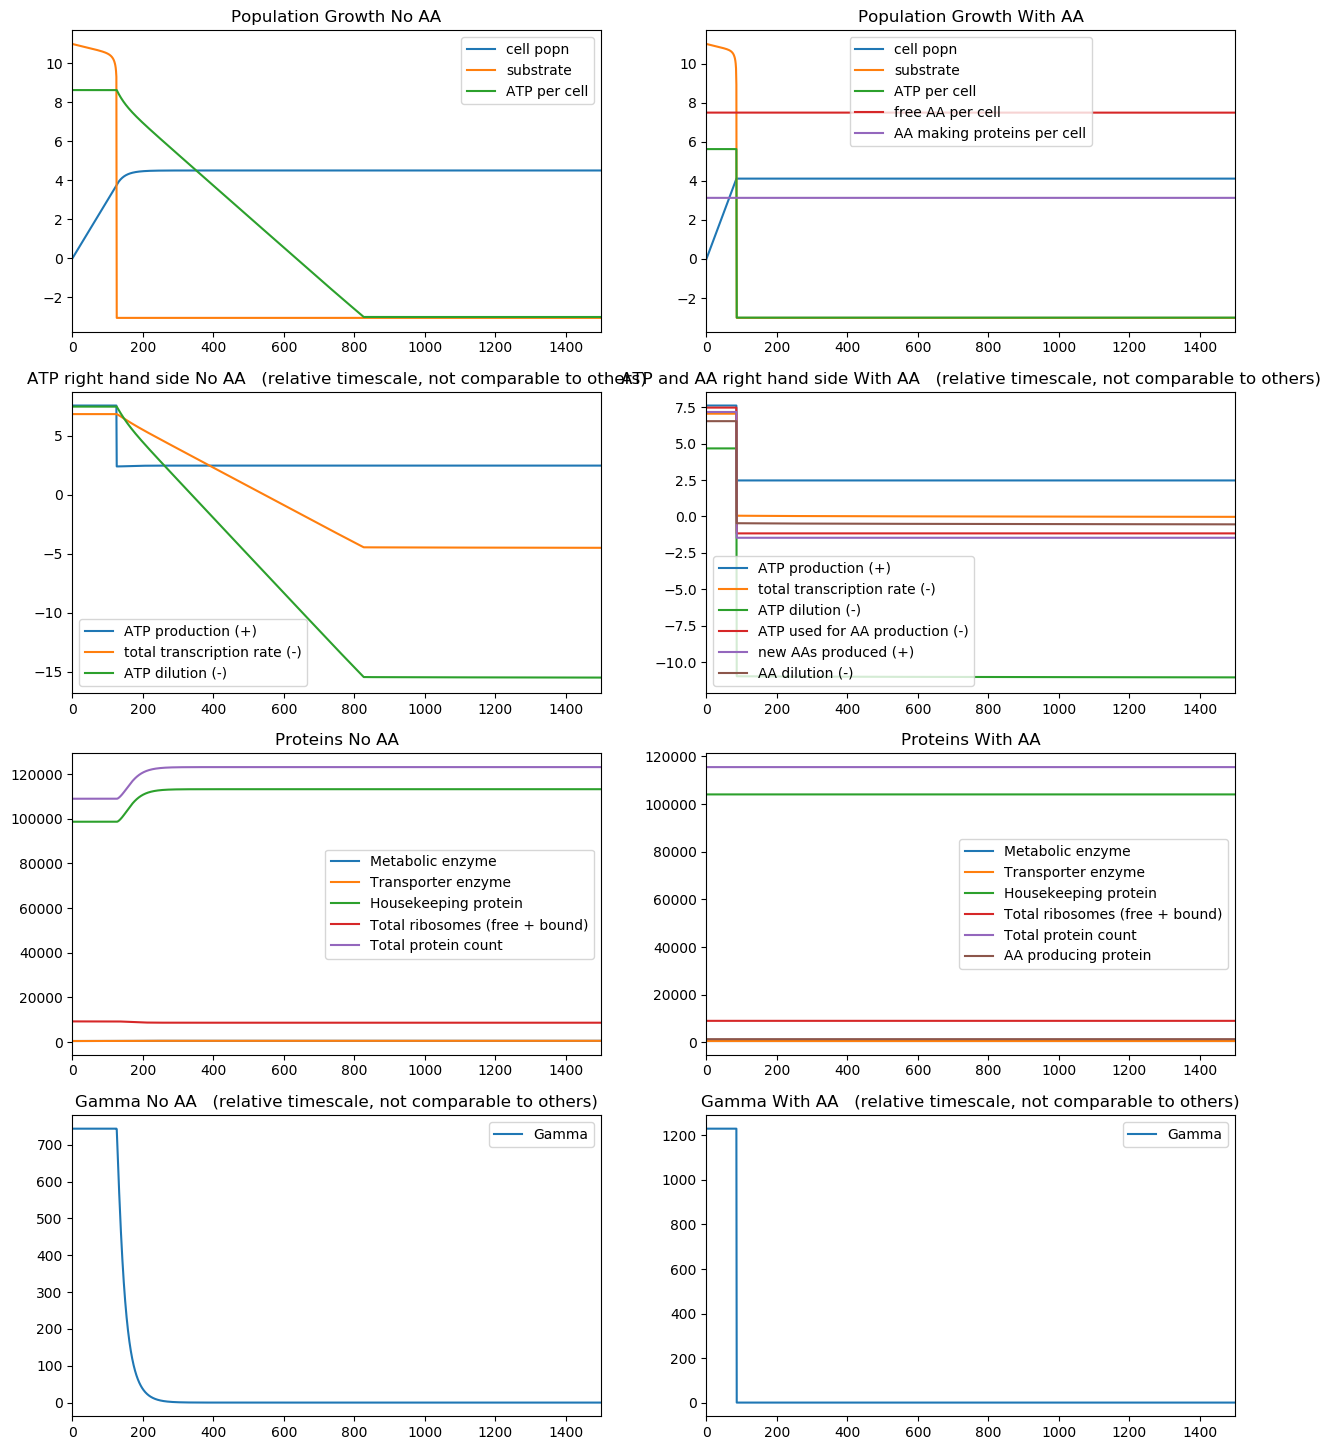

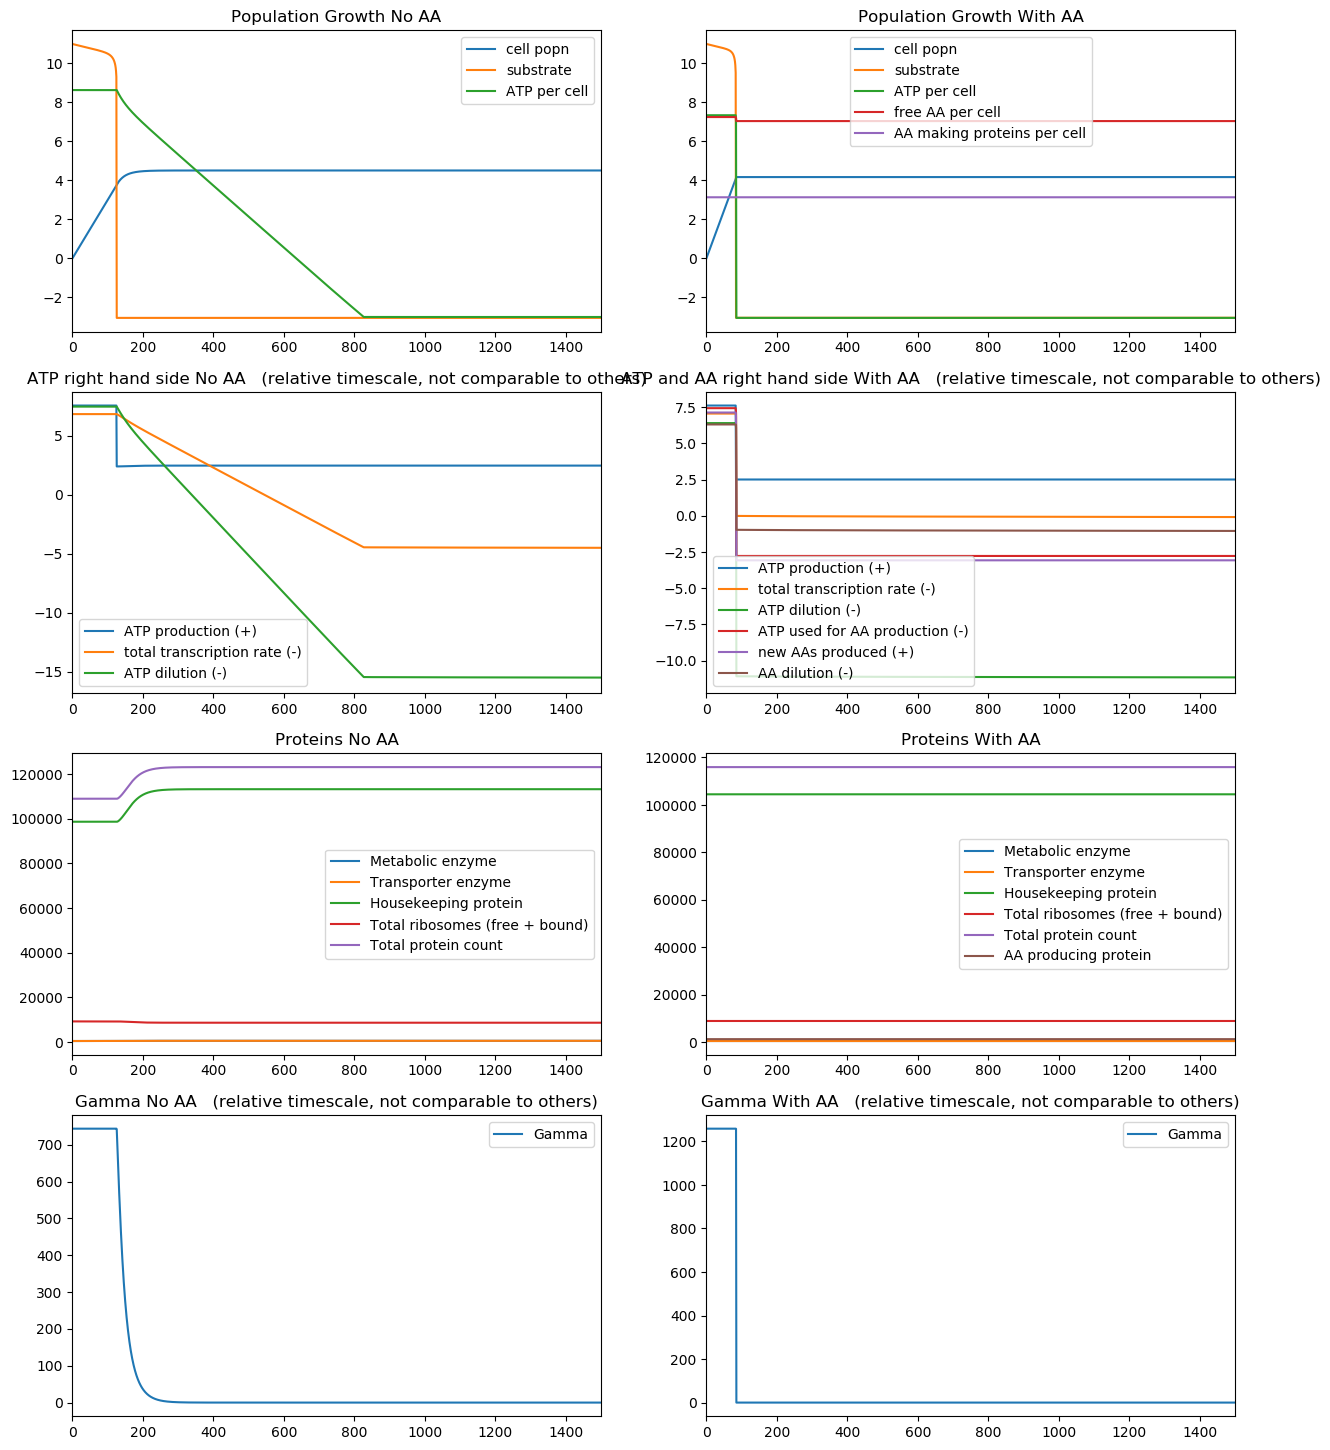


ODE plots saved


sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [8]:
#AA model using values of 50.0 (arbitriarily chosen) for all 6 parameters
for i in [5.,500.]
    global k_cat_AA = i
for j in [5.,500.]
    global k_a_NH4 = j    
for k in [5.,500.]
    global k_NH4 = k
for m in [5.,500.]
    global k_x = m
for n in [5.,500.]
    global k_a = n

burn_in_prob_AA = ODEProblem(AA_simple, init, (0.,10000.0)) #set up the burn in problem
starting_NH4 = init[15]
println("burning in AA model")
global sol1_with_AA = solve(burn_in_prob_AA, saveat = 1.)
# println("success")
step_num = size(sol1_with_AA,2)
final_state_with_AA =sol1_with_AA[step_num]; #collect the end state after burning in to use as new initial values
# final_state_with_AA[1]= 1e12
println("running AA model")
                    
global AA_prob = ODEProblem(AA_simple_with_popn_growth, final_state_with_AA, (10000.0,20000.0)) #the problem to run ABC on using the burned in initial values
global sol2_with_AA = solve(AA_prob, saveat = 1.0)
println("successfully run AA model with params $k_cat_AA, $k_a_NH4, $k_NH4, $k_x, $k_a")
burn_in_prob_original = ODEProblem(original_model, init_original, (0.,10000.0)) #set up the burn in problem
println("burning in original model")
sol1 = solve(burn_in_prob_original, saveat = 1.)
step_num = size(sol1,2)
final_state_no_AA =sol1[step_num]; #collect the end state after burning in to use as new initial values
# final_state_no_AA[1]= 1e12
println("running original model")
global a_dilution_tracker_no_AA=[]
                    
original_prob = ODEProblem(original_model_popn_growth_no_replenish, final_state_no_AA, (10000.0,20000.0)) #the problem to run ABC on using the burned in initial values
global sol2_original_model = solve(original_prob, saveat = 1.,)
println("successfully run original model with params $k_cat_AA, $k_a_NH4, $k_NH4, $k_x, $k_a")

global popn_tracker_original = []
global substrate_tracker_original = []
global ATP_tracker_original = []
global rmr_tracker_original=[]
global em_tracker_original = []
global et_tracker_original=[]
global q_tracker_original=[]
global total_r_tracker_original=[]
global total_proteome_tracker_original=[]
global si_tracker_original = []
global nucat_tracker_original =[]
global ttrate_tracker_original = []
global gamma_tracker_original= []                    
global a_dilution_tracker_original= []                    

                    
                    
                    
global popn_tracker_with_AA = []
global substrate_tracker_with_AA = []
global ATP_tracker_with_AA = []
global rmr_tracker_with_AA=[]
global AA_tracker_with_AA=[]
global AA_prot_tracker = []
global em_tracker_with_AA = []
global et_tracker_with_AA=[]
global q_tracker_with_AA=[]
global total_r_tracker_with_AA=[]
global total_proteome_tracker_with_AA=[]
global si_tracker_with_AA = []
global nucat_tracker_with_AA =[]
global ttrate_tracker_with_AA = []
global gamma_tracker_with_AA= []                    
global new_AA_tracker = []
global AA_a_use_tracker_with_AA=[]
global a_dilution_tracker_with_AA=[]
global AA_dilution_tracker= []


try for i in (1:10001)
    push!(popn_tracker_original,max(sol2_original_model.u[i][20],0.0))
    push!(substrate_tracker_original,max(sol2_original_model.u[i][1],0.0))
    push!(ATP_tracker_original,max(sol2_original_model.u[i][21],0.0))
    push!(rmr_tracker_original,max(sol2_original_model.u[i][2],0.0))
    push!(em_tracker_original, max(sol2_original_model.u[i][3],0.0))
    push!(et_tracker_original, max(sol2_original_model.u[i][6],0.0))
    push!(q_tracker_original, max(sol2_original_model.u[i][10],0.0))
    total_ribo_no_AA=sol2_original_model.u[i][2]+sol2_original_model.u[i][5]+sol2_original_model.u[i][4]+sol2_original_model[i][7]+sol2_original_model.u[i][14]    
    push!(total_r_tracker_original, max(total_ribo_no_AA,0.0))
    push!(total_proteome_tracker_original, max(sol2_original_model.u[i][3]+sol2_original_model.u[i][6]+sol2_original_model.u[i][10]+total_ribo_no_AA,0.0))
    push!(si_tracker_original, max(sol2_original_model.u[i][11],0.0))
    push!(nucat_tracker_original,find_nucat((sol2_original_model.u[i][3]),(sol2_original_model.u[i][11])))                            
    ttrate_original= find_ttrate_no_AA(sol2_original_model.u[i][4],sol2_original_model.u[i][2],sol2_original_model.u[i][5],sol2_original_model.u[i][7],sol2_original_model.u[i][17],sol2_original_model.u[i][25],sol2_original_model.u[i][21]) 
    push!(ttrate_tracker_original, ttrate_original)
    push!(gamma_tracker_original, find_gamma_no_AA(sol2_original_model.u[i][21]))
    push!(a_dilution_tracker_original, (ttrate_original/M)*sol2_original_model.u[i][21])
                            
                            
                                
    push!(popn_tracker_with_AA,max(sol2_with_AA.u[i][20],0.0))
    push!(substrate_tracker_with_AA,max(sol2_with_AA.u[i][1],0.0))
    push!(ATP_tracker_with_AA,max(sol2_with_AA.u[i][21],0.0))
    push!(rmr_tracker_with_AA,max(sol2_with_AA.u[i][2],0.0))
    push!(AA_tracker_with_AA,max(sol2_with_AA.u[i][22],0.0))
    push!(AA_prot_tracker, max(sol2_with_AA.u[i][23],0.0))
    push!(em_tracker_with_AA, max(sol2_with_AA.u[i][3],0.0))
    push!(et_tracker_with_AA, max(sol2_with_AA.u[i][6],0.0))
    push!(q_tracker_with_AA, max(sol2_with_AA.u[i][10],0.0))
    total_ribo_AA=sol2_with_AA.u[i][2]+sol2_with_AA.u[i][5]+sol2_with_AA.u[i][4]+sol2_with_AA[i][7]+sol2_with_AA.u[i][25]+sol2_with_AA.u[i][14]
    push!(total_r_tracker_with_AA, max(total_ribo_AA,0.0))
    push!(total_proteome_tracker_with_AA, max(sol2_with_AA.u[i][3]+sol2_with_AA.u[i][6]+sol2_with_AA.u[i][10]+total_ribo_AA+sol2_with_AA.u[i][23],0.0))
    push!(si_tracker_with_AA, max(sol2_with_AA.u[i][11],0.0))
    push!(nucat_tracker_with_AA,find_nucat((sol2_with_AA.u[i][3]),(sol2_with_AA.u[i][11])))
    ttrate_with_AA =find_ttrate_with_AA(sol2_with_AA.u[i][4],sol2_with_AA.u[i][2],sol2_with_AA.u[i][5],sol2_with_AA.u[i][7],sol2_with_AA.u[i][17],sol2_with_AA.u[i][25],sol2_with_AA.u[i][21],sol2_with_AA.u[i][22])
    push!(ttrate_tracker_with_AA, ttrate_with_AA)
    push!(gamma_tracker_with_AA, find_gamma_with_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][22]))
    new_AA = find_new_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][15],sol2_with_AA.u[i][22],sol2_with_AA.u[i][23])
    push!(new_AA_tracker, new_AA)
    push!(AA_a_use_tracker_with_AA, new_AA*2)
    push!(a_dilution_tracker_with_AA, (ttrate_with_AA/M)*sol2_with_AA.u[i][21])
    push!(AA_dilution_tracker, (ttrate_with_AA/M)*sol2_with_AA.u[i][22])
end
catch e
println("error in push trackers")
println("error is $e")
end

# println("total proteome with AA is $total_proteome_with_AA")
# percent_em_with_AA = round(sol2_with_AA.u[10001][3]/total_proteome_with_AA*100, digits=1)
# percent_et_with_AA = round(sol2_with_AA.u[10001][6]/total_proteome_with_AA*100, digits=1)
# percent_q_with_AA = round(sol2_with_AA.u[10001][10]/total_proteome_with_AA*100, digits=1)
# percent_r_with_AA = round(sol2_with_AA.u[10001][14]/total_proteome_with_AA*100, digits=1)

println("plotting")
try
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7,ax8) =PyPlot.subplots(figsize=(15,18),ncols=2, nrows=4)
ax1.plot(log10.(popn_tracker_original),label = "cell popn")
ax1.plot(log10.(substrate_tracker_original),label = "substrate")
ax1.plot(log10.(ATP_tracker_original),label = "ATP per cell")
ax1.legend()
ax1.set_title("Population Growth No AA")
ax1.set_xlim(0,1500)
ax2.plot(log10.(nucat_tracker_original), label = "ATP production (+)")
ax2.plot(log10.(ttrate_tracker_original), label = "total transcription rate (-)")
ax2.plot(log10.(a_dilution_tracker_original), label = "ATP dilution (-)")
ax2.legend()
ax2.set_title("ATP right hand side No AA   (relative timescale, not comparable to others)")
ax2.set_xlim(0,1500)
# ax2.set_ylim(2,10.5)
# ax3.plot(log10.(em_tracker_original), label = "Metabolic enzyme")
# ax3.plot(log10.(et_tracker_original), label = "Transporter enzyme")
# ax3.plot(log10.(q_tracker_original), label = "Housekeeping protein")
# ax3.plot(log10.(total_r_tracker_original), label = "Total ribosomes (free + bound)")
ax3.plot((em_tracker_original), label = "Metabolic enzyme")
ax3.plot((et_tracker_original), label = "Transporter enzyme")
ax3.plot((q_tracker_original), label = "Housekeeping protein")
ax3.plot((total_r_tracker_original), label = "Total ribosomes (free + bound)")
ax3.plot(total_proteome_tracker_original, label = "Total protein count")
# ax3.plot(gamma_tracker_no_AA, label = "Gamma")                    
ax3.set_title("Proteins No AA")
ax3.set_xlim(0,1500)
# ax6.set_ylim(0,120000)
ax3.legend()   
                    
ax4.plot(gamma_tracker_original, label = "Gamma")                    
ax4.set_title("Gamma No AA   (relative timescale, not comparable to others)")
ax4.set_xlim(0,1500)
# ax4.set_ylim(0,120000)
ax4.legend()                       
                    
                    
ax5.plot(log10.(popn_tracker_with_AA),label = "cell popn")
ax5.plot(log10.(substrate_tracker_with_AA),label = "substrate")
ax5.plot(log10.(ATP_tracker_with_AA),label = "ATP per cell")
ax5.plot(log10.(AA_tracker_with_AA),label = "free AA per cell")
ax5.plot(log10.(AA_prot_tracker),label = "AA making proteins per cell")
ax5.legend()
ax5.set_title("Population Growth With AA")
ax5.set_xlim(0,1500)
ax6.plot(log10.(nucat_tracker_with_AA), label = "ATP production (+)")
ax6.plot(log10.(ttrate_tracker_with_AA), label = "total transcription rate (-)")
ax6.plot(log10.(a_dilution_tracker_with_AA), label = "ATP dilution (-)")
ax6.plot(log10.(AA_a_use_tracker_with_AA), label = "ATP used for AA production (-)")
ax6.plot(log10.(new_AA_tracker), label = "new AAs produced (+)")
ax6.plot(log10.(AA_dilution_tracker), label = "AA dilution (-)")
ax6.legend()
ax6.set_title("ATP and AA right hand side With AA   (relative timescale, not comparable to others)")
ax6.set_xlim(0,1500)
# ax6.set_ylim(2,10.5)
# ax6.plot(log10.(em_tracker_with_AA), label = "Metabolic enzyme")
# ax6.plot(log10.(et_tracker_with_AA), label = "Transporter enzyme")
# ax6.plot(log10.(q_tracker_with_AA), label = "Housekeeping protein")
# ax6.plot(log10.(total_r_tracker_with_AA), label = "Total ribosomes (free + bound)")
# ax6.plot(log10.(AA_prot_tracker), label = "AA producing protein")
ax7.plot((em_tracker_with_AA), label = "Metabolic enzyme")
ax7.plot((et_tracker_with_AA), label = "Transporter enzyme")
ax7.plot((q_tracker_with_AA), label = "Housekeeping protein")
ax7.plot((total_r_tracker_with_AA), label = "Total ribosomes (free + bound)")
ax7.plot(total_proteome_tracker_with_AA, label = "Total protein count")
ax7.plot((AA_prot_tracker), label = "AA producing protein")
# ax7.plot(gamma_tracker_with_AA, label="Gamma")
ax7.set_title("Proteins With AA")
ax7.set_xlim(0,1500)
# ax7.set_ylim(0,120000)
ax7.legend()
                    
ax8.plot(gamma_tracker_with_AA, label = "Gamma")                    
ax8.set_title("Gamma With AA   (relative timescale, not comparable to others)")
ax8.set_xlim(0,1500)
# ax4.set_ylim(0,120000)
ax8.legend()                       
PyPlot.savefig("results/$k_cat_AA-$k_a_NH4-$k_NH4-$k_x-$k_a-ODE_plots.png")
println("ODE plots saved")
catch e
println("error in plot 1")
println(e)
end

                    
# try
# ribo_breakdown_AA=[sol2_with_AA.u[10001][2],sol2_with_AA.u[10001][5],sol2_with_AA.u[10001][4],sol2_with_AA[10001][7],sol2_with_AA.u[10001][14],sol2_with_AA.u[10001][25]]
# ribo_breakdown_no_AA=[sol2_original_model.u[10001][2],sol2_original_model.u[10001][5],sol2_original_model.u[10001][4],sol2_original_model[10001][7],sol2_original_model.u[10001][14]]#,sol2_original_model.u[10001][17],sol2_original_model.u[10001][25]]

# total_ribo_AA=sol2_with_AA.u[10001][2]+sol2_with_AA.u[10001][5]+sol2_with_AA.u[10001][4]+sol2_with_AA[10001][7]+sol2_with_AA.u[10001][25]+sol2_with_AA.u[10001][14]
# percent_rmr_AA = round(sol2_with_AA.u[10001][2]/total_ribo_AA*100, digits=1)
# percent_rmt_AA = round(sol2_with_AA.u[10001][5]/total_ribo_AA*100, digits=1)
# percent_rmq_AA = round(sol2_with_AA.u[10001][4]/total_ribo_AA*100, digits=1)
# percent_rmm_AA= round(sol2_with_AA.u[10001][7]/total_ribo_AA*100, digits=1)
# percent_free_AA= round(sol2_with_AA.u[10001][14]/total_ribo_AA*100, digits=1)
# percent_nit_mrna_ribo=round(sol2_with_AA.u[10001][17]/total_ribo_AA*100, digits=1)
# percent_bound_AA_AA= round(sol2_with_AA.u[10001][25]/total_ribo_AA*100, digits=1)
# total_ribo_no_AA=sol2_original_model.u[10001][2]+sol2_original_model.u[10001][5]+sol2_original_model.u[10001][4]+sol2_original_model[10001][7]+sol2_original_model.u[10001][14]
# percent_rmr_no_AA = round(sol2_original_model.u[10001][2]/total_ribo_no_AA*100, digits=1)
# percent_rmt_no_AA = round(sol2_original_model.u[10001][5]/total_ribo_no_AA*100, digits=1)
# percent_rmq_no_AA = round(sol2_original_model.u[10001][4]/total_ribo_no_AA*100, digits=1)
# percent_rmm_no_AA= round(sol2_original_model.u[10001][7]/total_ribo_no_AA*100, digits=1)
# percent_free_no_AA= round(sol2_original_model.u[10001][14]/total_ribo_no_AA*100, digits=1)
# percent_nit_mrna_ribo_no=round(sol2_original_model.u[10001][17]/total_ribo_no_AA*100, digits=1)
# percent_bound_no_AA_AA= round(sol2_original_model.u[10001][25]/total_ribo_no_AA*100, digits=1)
# catch e
# println("error in ribo percentage calcs")
# println(e)
# end                        
                        
# ribosome pie chart
# try
# fig, (ax1, ax2) =PyPlot.subplots(figsize=(15,8),ncols=2, nrows=1)
# wedges,texts =ax2.pie(ribo_breakdown_AA,
# labels = ("rmr $percent_rmr_AA%", "rmt $percent_rmt_AA%","rmq $percent_rmq_AA%", "rmm $percent_rmm_AA%", "r $percent_free_AA%" , "AA mRNA ribo $percent_bound_AA_AA%"))
# rounded_ribo_no_AA= round(total_ribo_no_AA)
# ax2.set_title("ribosomal partitions with AA. Total num ribo = $rounded_ribo_no_AA")
# ax2.legend(["rmr = ribo bound mRNA for ribo","rmt = ribo bound mRNA for transporter", "rmq = ribo bound mRNA for housekeeping","rmm = ribo bound mRNA for metabolic","r = free ribo","AA mRNA = ribo bound mRNA for AA prot"],
#           bbox_to_anchor=(1, -1, 0.5, 1))
# ax1.pie(ribo_breakdown_no_AA, labels = ("rmr $percent_rmr_no_AA%", "rmt $percent_rmt_no_AA%","rmq $percent_rmq_no_AA%", "rmm $percent_rmm_no_AA%", "r $percent_free_no_AA%" ))#, "AA mRNA $percent_bound_no_AA_AA%"))
# rounded_ribo_with_AA = round(total_ribo_AA)
# ax1.set_title("ribosomal partitions no AA. Total num ribo = $rounded_ribo_with_AA")
# PyPlot.savefig("results/$k_cat_AA-$k_a_NH4-$k_NH4-$k_x-$k_a-ribo_partition_pie_plots.png")
# println("ribo plots saved")
# catch e
# println("error in ribo pie chart")
# println(e)
# end                        

                    
# try
# proteome_with_AA = [sol2_with_AA.u[10001][3],sol2_with_AA.u[10001][10],sol2_with_AA.u[10001][6],total_ribo_AA,sol2_with_AA.u[10001][23]]
# proteome_no_AA = [sol2_original_model.u[10001][3],sol2_original_model.u[10001][10],sol2_original_model.u[10001][6],total_ribo_no_AA]

# total_proteome_with_AA=sol2_with_AA.u[10001][3]+sol2_with_AA.u[10001][6]+sol2_with_AA.u[10001][10]+total_ribo_AA+sol2_with_AA.u[10001][23]
# percent_em_with_AA = round(sol2_with_AA.u[10001][3]/total_proteome_with_AA*100, digits=1)
# percent_et_with_AA = round(sol2_with_AA.u[10001][6]/total_proteome_with_AA*100, digits=1)
# percent_q_with_AA = round(sol2_with_AA.u[10001][10]/total_proteome_with_AA*100, digits=1)
# percent_r_with_AA = round(sol2_with_AA.u[10001][14]/total_proteome_with_AA*100, digits=1)
# # percent_nit_with_AA = round(sol2_with_AA.u[10001][18]/total_proteome_with_AA*100, digits=1)
# percent_AA_prot_with_AA = round(sol2_with_AA.u[10001][23]/total_proteome_with_AA*100, digits=1)
# rounded_with_AA = round(total_proteome_with_AA)

# total_proteome_no_AA=sol2_original_model.u[10001][3]+sol2_original_model.u[10001][6]+sol2_original_model.u[10001][10]+total_ribo_no_AA
# percent_em_no_AA = round(sol2_original_model.u[10001][3]/total_proteome_no_AA*100, digits=1)
# percent_et_no_AA = round(sol2_original_model.u[10001][6]/total_proteome_no_AA*100, digits=1)
# percent_q_no_AA = round(sol2_original_model.u[10001][10]/total_proteome_no_AA*100, digits=1)
# percent_r_no_AA = round(sol2_original_model.u[10001][14]/total_proteome_no_AA*100, digits=1)
# # percent_nit_no_AA = round(sol2_original_model.u[10001][18]/total_proteome_no_AA*100, digits=1)
# # percent_AA_prot_no_AA = round(sol2_original_model.u[10001][23]/total_proteome_no_AA*100, digits=1)
# rounded_no_AA =round(total_proteome_no_AA)
# catch e 
# println("error in proteome calcs")
# println("$e")
# end
                    
# try                    
# fig, (ax1, ax2) =PyPlot.subplots(figsize=(15,8),ncols=2, nrows=1)
# ax2.pie(proteome_with_AA, labels = ("em $percent_em_with_AA%", "q $percent_q_with_AA%","et $percent_et_with_AA%", "r $percent_r_with_AA%", "AA protein $percent_AA_prot_with_AA%"))
# ax2.set_title("Proteome partitions with AA. total proteome = $rounded_with_AA")
# ax1.pie(proteome_no_AA, labels = ("em $percent_em_with_AA%", "q $percent_q_no_AA%","et $percent_et_no_AA%", "r $percent_r_no_AA%"))
# ax1.set_title("Proteome partitions no AA. Total proteome = $rounded_no_AA")
# ax1.legend(["em = enzyme metabolic","q = housekeeping protein", "et = enzyme transporter","r = total ribosomes (free and bound)","AA making protein"],
#           bbox_to_anchor=(1, -1, 0.5, 1))
# PyPlot.savefig("results/$k_cat_AA-$k_a_NH4-$k_NH4-$k_x-$k_a-proteome_partition_pie_plots.png")
# println("proteome plots saved")
# catch e 
# println("error in proteome pie chart")
# println(e)
# end

# try
# labels = ("substrate external", "ribo-bound mrna ribo", "enzyme metabolic", "ribo-bound mrna housekeeping", "ribo-bound mrna transporter","enzyme transporter", "ribo-bound mrna metabolic", "mrna transporter", "mrna metabolic", "housekeeping prot", "substrate internal", "housekeeping mrna", "ribo mrna", "free ribosomes", "internal NH4", "nitrogenase mrna","nitrogenase mrna ribo", "nitrogenase prot", "NH4 external", "Num cells", "ATP", "Amino Acids", "AA enzyme", "AA enzyme mrna", "ribo-bound AA enzyme mrna")
# PyPlot.figure(figsize=(10,8))
# PyPlot.barh(collect(1:25),(sol2_with_AA[100]'), log = "True", alpha = 0.5, label = "with AA", color = "red")
# PyPlot.xlim(0,1e12)
# PyPlot.barh(collect(1:25),(sol2_original_model[100]'), log = "True", alpha = 0.5, label = "original", color = "blue")
# PyPlot.yticks(collect(1:25), labels, rotation = "0")
# PyPlot.xlabel("log number molecules")
# PyPlot.legend()
# PyPlot.title("Values at 100 timesteps (log growth phase)")
# PyPlot.grid()
# PyPlot.savefig("results/$k_cat_AA-$k_a_NH4-$k_NH4-$k_x-$k_a-difference_bar_charts.png")
# println("bar charts saved")
# catch e
# println("error in bar chart")
# println(e)
# end
                end
            end
        end
    end
end

In [6]:
#run nitrogenase model and compare with and without AA
burn_in_prob_nit_with_AA = ODEProblem(nitrogenase_simple_with_AA, init, (0.,10000.0)) #set up the burn in problem
starting_NH4 = init[15]
println("burning in nit with AA model")
global sol1_nit_with_AA = solve(burn_in_prob_nit_with_AA, saveat = 1.)
step_num = size(sol1_nit_with_AA,2)
final_state_nit_with_AA =sol1_nit_with_AA[step_num]; #collect the end state after burning in to use as new initial values
# final_state_with_AA[1]= 1e12
println("running AA model")   
global nit_with_AA_prob = ODEProblem(nitrogenase_with_AA_with_popn_growth, final_state_nit_with_AA, (10000.0,20000.0)) #the problem to run ABC on using the burned in initial values
global sol2_nit_with_AA = solve(nit_with_AA_prob, saveat = 1.0)
println("successfully run nitrogen fixing with AA model with params $k_cat_AA, $k_a_NH4, $k_NH4, $k_x, $k_a")
####################################
burn_in_prob_nit_no_AA = ODEProblem(nitrogenase_simple_no_AA, init_original, (0.,10000.0)) #set up the burn in problem
println("burning in nit no AA model")
sol1_nit_no_AA = solve(burn_in_prob_nit_no_AA, saveat = 1.)
step_num = size(sol1_nit_no_AA,2)
final_state_nit_no_AA =sol1_nit_no_AA[step_num]; #collect the end state after burning in to use as new initial values
# final_state_no_AA[1]= 1e12
println("running nit no AA model")
# global a_dilution_tracker_no_AA=[]
nit_no_AA_prob = ODEProblem(nitrogenase_no_AA_with_popn_growth, final_state_nit_no_AA, (10000.0,20000.0)) #the problem to run ABC on using the burned in initial values
global sol2_nit_no_AA = solve(nit_no_AA_prob, saveat = 1.,)
println("successfully run nitrogen fixing no AA model")

burning in nit with AA model
running AA model
successfully run nitrogen fixing with AA model with params 50.0, 50.0, 50.0, 50.0, 50.0
burning in nit no AA model
running nit no AA model
successfully run nitrogen fixing no AA model


In [7]:
sol1_nit_with_AA
sol2_nit_with_AA

sol1_nit_no_AA
sol2_nit_no_AA

sol1= sol1_nit_no_AA
sol1_with_AA= sol1_nit_with_AA
sol2_original_model =sol2_nit_no_AA
sol2_with_AA= sol2_nit_with_AA

println("initialising trackers")
global popn_tracker_original = []
global substrate_tracker_original = []
global ATP_tracker_original = []
global rmr_tracker_original=[]
global em_tracker_original = []
global et_tracker_original=[]
global q_tracker_original=[]
global total_r_tracker_original=[]
global total_proteome_tracker_original=[]
global si_tracker_original = []
global nucat_tracker_original =[]
global ttrate_tracker_original = []
global gamma_tracker_original= []                    
global a_dilution_tracker_original= []
global nit_tracker_original= []

                    
global popn_tracker_with_AA = []
global substrate_tracker_with_AA = []
global ATP_tracker_with_AA = []
global rmr_tracker_with_AA=[]
global AA_tracker_with_AA=[]
global AA_prot_tracker = []
global em_tracker_with_AA = []
global et_tracker_with_AA=[]
global q_tracker_with_AA=[]
global total_r_tracker_with_AA=[]
global total_proteome_tracker_with_AA=[]
global si_tracker_with_AA = []
global nucat_tracker_with_AA =[]
global ttrate_tracker_with_AA = []
global gamma_tracker_with_AA= []                    
global new_AA_tracker = []
global AA_a_use_tracker_with_AA=[]
global a_dilution_tracker_with_AA=[]
global AA_dilution_tracker= []
global NH4_tracker = []
global nit_tracker_with_AA= []

println("pushing into trackers")
try for i in (1:10001)
    push!(popn_tracker_original,max(sol1.u[i][20],0.0))
    push!(substrate_tracker_original,max(sol1.u[i][1],0.0))
    push!(ATP_tracker_original,max(sol1.u[i][21],0.0))
    push!(rmr_tracker_original,max(sol1.u[i][2],0.0))
    push!(em_tracker_original, max(sol1.u[i][3],0.0))
    push!(et_tracker_original, max(sol1.u[i][6],0.0))
    push!(q_tracker_original, max(sol1.u[i][10],0.0))
    total_ribo_no_AA=sol1.u[i][2]+sol1.u[i][5]+sol1.u[i][4]+sol1[i][7]+sol1.u[i][14]    
    push!(total_r_tracker_original, max(total_ribo_no_AA,0.0))
    push!(total_proteome_tracker_original, max(sol1.u[i][3]+sol1.u[i][6]+sol1.u[i][10]+total_ribo_no_AA,0.0))
    push!(si_tracker_original, max(sol1.u[i][11],0.0))
    push!(nucat_tracker_original,find_nucat((sol1.u[i][3]),(sol1.u[i][11])))                            
    ttrate_original= find_ttrate_no_AA(sol1.u[i][4],sol1.u[i][2],sol1.u[i][5],sol1.u[i][7],sol1.u[i][17],sol1.u[i][25],sol1.u[i][21]) 
    push!(ttrate_tracker_original, ttrate_original)
    push!(gamma_tracker_original, find_gamma_no_AA(sol1.u[i][21]))
    push!(a_dilution_tracker_original, (ttrate_original/M)*sol1.u[i][21])

    
    push!(popn_tracker_with_AA,max(sol1_with_AA.u[i][20],0.0))
    push!(substrate_tracker_with_AA,max(sol1_with_AA.u[i][1],0.0))
    push!(ATP_tracker_with_AA,max(sol1_with_AA.u[i][21],0.0))
    push!(rmr_tracker_with_AA,max(sol1_with_AA.u[i][2],0.0))
    push!(AA_tracker_with_AA,max(sol1_with_AA.u[i][22],0.0))
    push!(AA_prot_tracker, max(sol1_with_AA.u[i][23],0.0))
    push!(em_tracker_with_AA, max(sol1_with_AA.u[i][3],0.0))
    push!(et_tracker_with_AA, max(sol1_with_AA.u[i][6],0.0))
    push!(q_tracker_with_AA, max(sol1_with_AA.u[i][10],0.0))
    total_ribo_AA=sol1_with_AA.u[i][2]+sol1_with_AA.u[i][5]+sol1_with_AA.u[i][4]+sol1_with_AA[i][7]+sol1_with_AA.u[i][25]+sol1_with_AA.u[i][14]
    push!(total_r_tracker_with_AA, max(total_ribo_AA,0.0))
    push!(total_proteome_tracker_with_AA, max(sol1_with_AA.u[i][3]+sol1_with_AA.u[i][6]+sol1_with_AA.u[i][10]+total_ribo_AA+sol1_with_AA.u[i][23],0.0))
    push!(si_tracker_with_AA, max(sol1_with_AA.u[i][11],0.0))
    push!(nucat_tracker_with_AA,find_nucat((sol1_with_AA.u[i][3]),(sol1_with_AA.u[i][11])))
    ttrate_with_AA =find_ttrate_with_AA(sol1_with_AA.u[i][4],sol1_with_AA.u[i][2],sol1_with_AA.u[i][5],sol1_with_AA.u[i][7],sol1_with_AA.u[i][17],sol1_with_AA.u[i][25],sol1_with_AA.u[i][21],sol1_with_AA.u[i][22])
    push!(ttrate_tracker_with_AA, ttrate_with_AA)
    push!(gamma_tracker_with_AA, find_gamma_with_AA(sol1_with_AA.u[i][21],sol1_with_AA.u[i][22]))
    new_AA = find_new_AA(sol1_with_AA.u[i][21],sol1_with_AA.u[i][15],sol1_with_AA.u[i][22],sol1_with_AA.u[i][23])
    push!(new_AA_tracker, new_AA)
    push!(AA_a_use_tracker_with_AA, new_AA*a_per_AA)
    push!(a_dilution_tracker_with_AA, (ttrate_with_AA/M)*sol1_with_AA.u[i][21])
    push!(AA_dilution_tracker, (ttrate_with_AA/M)*sol1_with_AA.u[i][22])
    push!(NH4_tracker, sol1_with_AA.u[i][15])
end
catch e
println("error in push trackers 1")
println("error is $e")
end
        
try for i in (1:10001)
    push!(popn_tracker_original,max(sol2_original_model.u[i][20],0.0))
    push!(substrate_tracker_original,max(sol2_original_model.u[i][1],0.0))
    push!(ATP_tracker_original,max(sol2_original_model.u[i][21],0.0))
    push!(rmr_tracker_original,max(sol2_original_model.u[i][2],0.0))
    push!(em_tracker_original, max(sol2_original_model.u[i][3],0.0))
    push!(et_tracker_original, max(sol2_original_model.u[i][6],0.0))
    push!(q_tracker_original, max(sol2_original_model.u[i][10],0.0))
    total_ribo_no_AA=sol2_original_model.u[i][2]+sol2_original_model.u[i][5]+sol2_original_model.u[i][4]+sol2_original_model[i][7]+sol2_original_model.u[i][14]    
    push!(total_r_tracker_original, max(total_ribo_no_AA,0.0))
    push!(total_proteome_tracker_original, max(sol2_original_model.u[i][3]+sol2_original_model.u[i][6]+sol2_original_model.u[i][10]+total_ribo_no_AA,0.0))
    push!(si_tracker_original, max(sol2_original_model.u[i][11],0.0))
    push!(nucat_tracker_original,find_nucat((sol2_original_model.u[i][3]),(sol2_original_model.u[i][11])))                            
    ttrate_original= find_ttrate_no_AA(sol2_original_model.u[i][4],sol2_original_model.u[i][2],sol2_original_model.u[i][5],sol2_original_model.u[i][7],sol2_original_model.u[i][17],sol2_original_model.u[i][25],sol2_original_model.u[i][21]) 
    push!(ttrate_tracker_original, ttrate_original)
    push!(gamma_tracker_original, find_gamma_no_AA(sol2_original_model.u[i][21]))
    push!(a_dilution_tracker_original, (ttrate_original/M)*sol2_original_model.u[i][21])
                            
                                                        
    push!(popn_tracker_with_AA,max(sol2_with_AA.u[i][20],0.0))
    push!(substrate_tracker_with_AA,max(sol2_with_AA.u[i][1],0.0))
    push!(ATP_tracker_with_AA,max(sol2_with_AA.u[i][21],0.0))
    push!(rmr_tracker_with_AA,max(sol2_with_AA.u[i][2],0.0))
    push!(AA_tracker_with_AA,max(sol2_with_AA.u[i][22],0.0))
    push!(AA_prot_tracker, max(sol2_with_AA.u[i][23],0.0))
    push!(em_tracker_with_AA, max(sol2_with_AA.u[i][3],0.0))
    push!(et_tracker_with_AA, max(sol2_with_AA.u[i][6],0.0))
    push!(q_tracker_with_AA, max(sol2_with_AA.u[i][10],0.0))
    total_ribo_AA=sol2_with_AA.u[i][2]+sol2_with_AA.u[i][5]+sol2_with_AA.u[i][4]+sol2_with_AA[i][7]+sol2_with_AA.u[i][25]+sol2_with_AA.u[i][14]
    push!(total_r_tracker_with_AA, max(total_ribo_AA,0.0))
    push!(total_proteome_tracker_with_AA, max(sol2_with_AA.u[i][3]+sol2_with_AA.u[i][6]+sol2_with_AA.u[i][10]+total_ribo_AA+sol2_with_AA.u[i][23],0.0))
    push!(si_tracker_with_AA, max(sol2_with_AA.u[i][11],0.0))
    push!(nucat_tracker_with_AA,find_nucat((sol2_with_AA.u[i][3]),(sol2_with_AA.u[i][11])))
    ttrate_with_AA =find_ttrate_with_AA(sol2_with_AA.u[i][4],sol2_with_AA.u[i][2],sol2_with_AA.u[i][5],sol2_with_AA.u[i][7],sol2_with_AA.u[i][17],sol2_with_AA.u[i][25],sol2_with_AA.u[i][21],sol2_with_AA.u[i][22])
    push!(ttrate_tracker_with_AA, ttrate_with_AA)
    push!(gamma_tracker_with_AA, find_gamma_with_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][22]))
    new_AA = find_new_AA(sol2_with_AA.u[i][21],sol2_with_AA.u[i][15],sol2_with_AA.u[i][22],sol2_with_AA.u[i][23])
    push!(new_AA_tracker, new_AA)
    push!(AA_a_use_tracker_with_AA, new_AA*a_per_AA)
    push!(a_dilution_tracker_with_AA, (ttrate_with_AA/M)*sol2_with_AA.u[i][21])
    push!(AA_dilution_tracker, (ttrate_with_AA/M)*sol2_with_AA.u[i][22])
    push!(NH4_tracker, sol2_with_AA.u[i][15])
end
catch e
println("error in push trackers 2")
println("error is $e")
end
println("trackers ready to plot")

initialising trackers
pushing into trackers
trackers ready to plot


In [11]:
popn_tracker_original
# popn_tracker_with_AA

20002-element Array{Any,1}:
 10.0                   
  9.900498337453751     
  9.801986732821373     
  9.704455334678455     
  9.607894389536117     
  9.512294241048894     
  9.417645328801193     
  9.323938187528306     
  9.231163446491337     
  9.139311827882649     
  9.048374145817194     
  8.95834130662501      
  8.869204306261054     
  ⋮                     
  3.25133134739906e-67  
  3.224958376675174e-67 
  3.1982922551847314e-67
  3.17133298292773e-67  
  3.144080559904169e-67 
  3.1165349861140464e-67
  3.0886962615573654e-67
  3.0605643862341295e-67
  3.032139360144327e-67 
  3.003421183287973e-67 
  2.9744098556650526e-67
  2.9451053772755778e-67

plotting


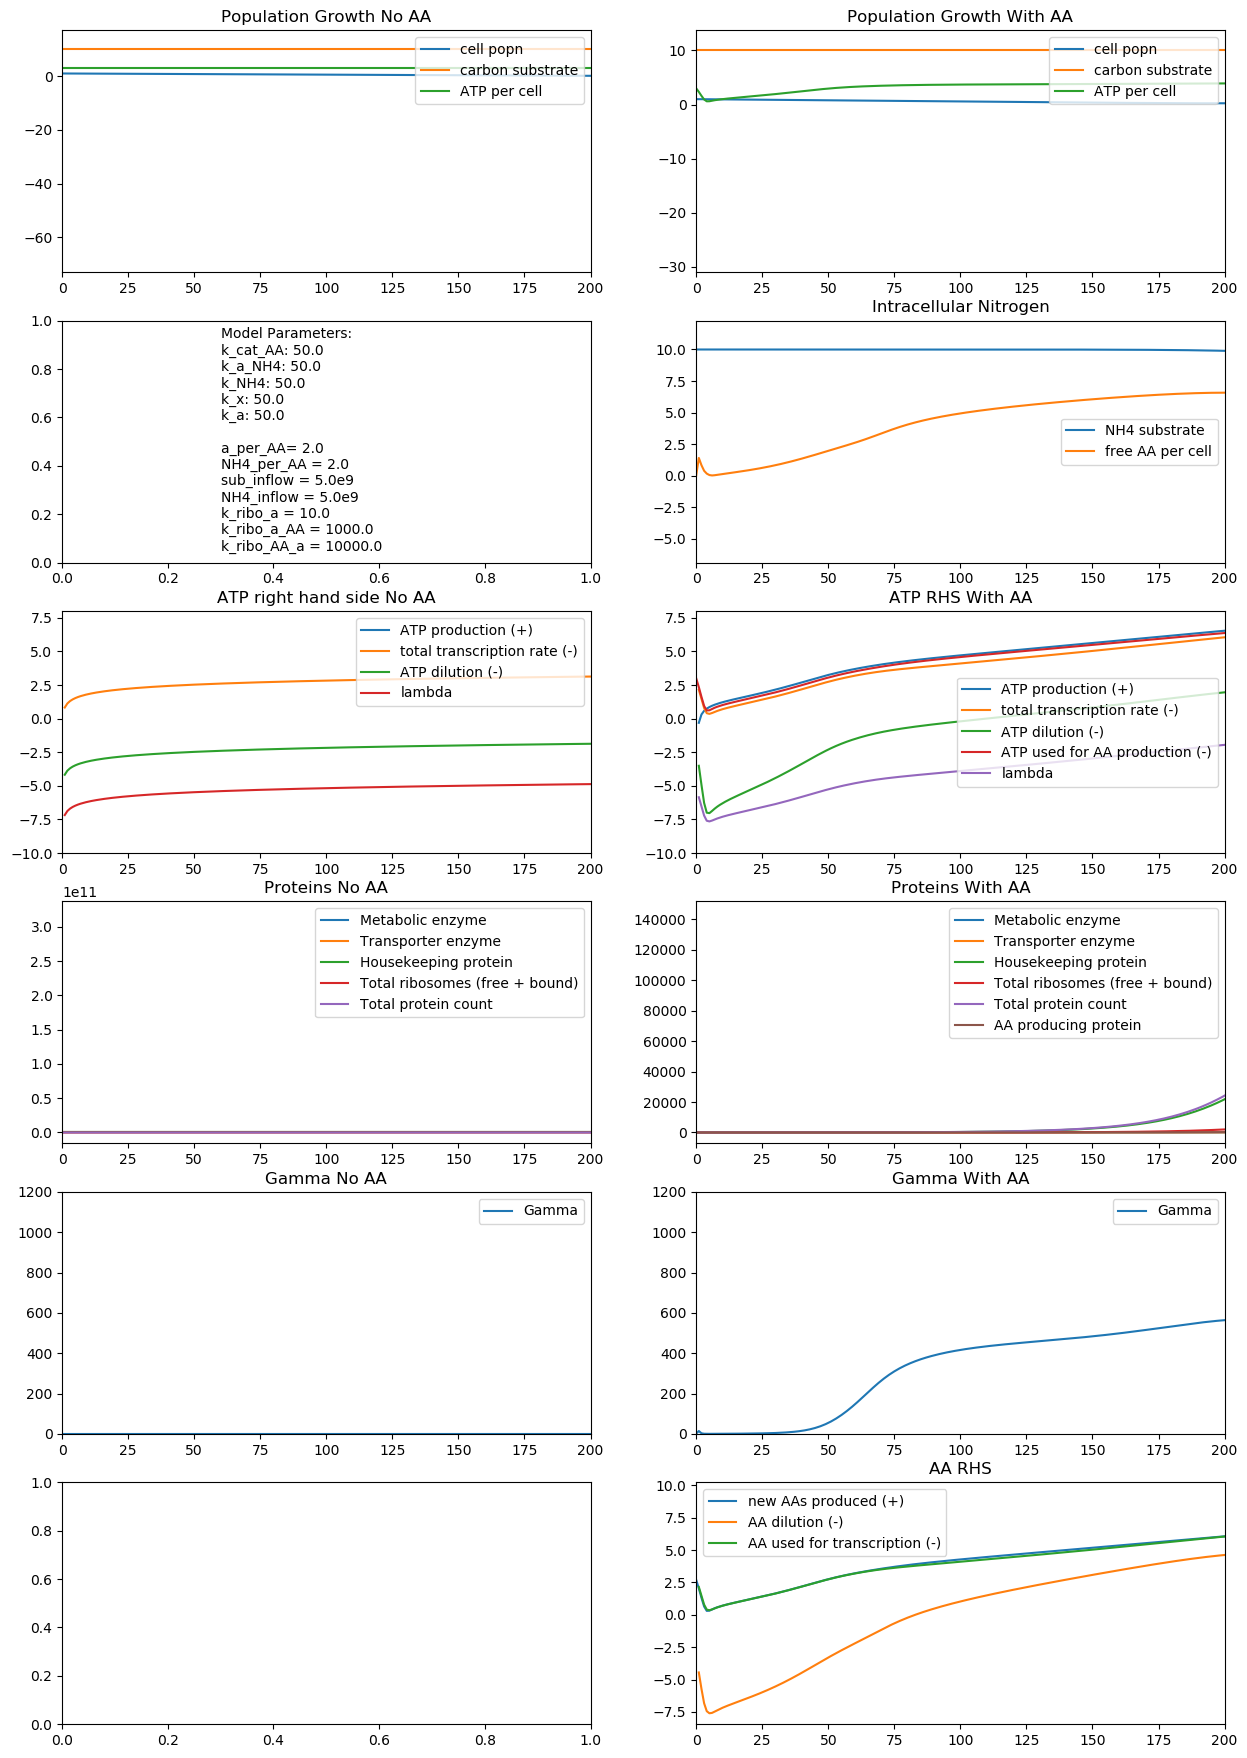

ODE plots saved


In [8]:
println("plotting")
xlims = (0,200)#(9800,11000)
try
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7,ax8,ax9,ax10,ax11,ax12) =PyPlot.subplots(figsize=(15,22),ncols=2, nrows=6)
ax1.plot(log10.(popn_tracker_original),label = "cell popn")
ax1.plot(log10.(substrate_tracker_original),label = "carbon substrate")
ax1.plot(log10.(ATP_tracker_original),label = "ATP per cell")
ax1.legend(loc = "upper right")
ax1.set_title("Population Growth No AA")
ax1.set_xlim(xlims)
ax1.vlines(10000,-1,13)

ax2.text(0.3,0.05,"Model Parameters:
k_cat_AA: $k_cat_AA
k_a_NH4: $k_a_NH4
k_NH4: $k_NH4
k_x: $k_x
k_a: $k_a
        
a_per_AA= $a_per_AA
NH4_per_AA = $NH4_per_AA
sub_inflow = $sub_inflow 
NH4_inflow = $NH4_inflow
k_ribo_a = $k_ribo_a
k_ribo_a_AA = $k_ribo_a_AA
k_ribo_AA_a = $k_ribo_AA_a")    
    
ax3.plot(log10.(nucat_tracker_original), label = "ATP production (+)")
ax3.plot(log10.(ttrate_tracker_original), label = "total transcription rate (-)")
ax3.plot(log10.(a_dilution_tracker_original), label = "ATP dilution (-)")
ax3.plot(log10.(ttrate_tracker_original/M), label = "lambda")
ax3.legend()
ax3.set_title("ATP right hand side No AA")
ax3.set_xlim(xlims)
ax3.set_ylim(-10,8)
# ax3.plot(log10.(em_tracker_original), label = "Metabolic enzyme")
# ax3.plot(log10.(et_tracker_original), label = "Transporter enzyme")
# ax3.plot(log10.(q_tracker_original), label = "Housekeeping protein")
# ax3.plot(log10.(total_r_tracker_original), label = "Total ribosomes (free + bound)")
    
ax4.plot((em_tracker_original), label = "Metabolic enzyme")
ax4.plot((et_tracker_original), label = "Transporter enzyme")
ax4.plot((q_tracker_original), label = "Housekeeping protein")
ax4.plot((total_r_tracker_original), label = "Total ribosomes (free + bound)")
ax4.plot(total_proteome_tracker_original, label = "Total protein count")
ax4.set_title("Proteins No AA")
ax4.set_xlim(xlims)
# ax6.set_ylim(0,120000)
ax4.legend()   
                    
ax5.plot((gamma_tracker_original), label = "Gamma")                    
ax5.set_title("Gamma No AA")
ax5.set_xlim(xlims)
ax5.set_ylim(0,1200)
ax5.legend()                            


    
ax7.plot(log10.(popn_tracker_with_AA),label = "cell popn")
ax7.plot(log10.(substrate_tracker_with_AA),label = "carbon substrate")
ax7.plot(log10.(ATP_tracker_with_AA),label = "ATP per cell")
ax7.legend(loc = "upper right")
ax7.set_title("Population Growth With AA")
ax7.set_xlim(xlims)
    
ax8.plot(log10.(NH4_tracker),label = "NH4 substrate")
ax8.plot(log10.(AA_tracker_with_AA),label = "free AA per cell")
ax8.legend(loc = "right")
ax8.set_title("Intracellular Nitrogen")
ax8.set_xlim(xlims)
    
ax9.plot(log10.(nucat_tracker_with_AA), label = "ATP production (+)")
ax9.plot(log10.(ttrate_tracker_with_AA), label = "total transcription rate (-)")
ax9.plot(log10.(a_dilution_tracker_with_AA), label = "ATP dilution (-)")
ax9.plot(log10.(AA_a_use_tracker_with_AA), label = "ATP used for AA production (-)")
ax9.plot(log10.(ttrate_tracker_with_AA/M), label = "lambda")
ax9.legend(loc= "right")
ax9.set_title("ATP RHS With AA")
ax9.set_xlim(xlims)
ax9.set_ylim(-10,8)
    
ax10.plot((em_tracker_with_AA), label = "Metabolic enzyme")
ax10.plot((et_tracker_with_AA), label = "Transporter enzyme")
ax10.plot((q_tracker_with_AA), label = "Housekeeping protein")
ax10.plot((total_r_tracker_with_AA), label = "Total ribosomes (free + bound)")
ax10.plot(total_proteome_tracker_with_AA, label = "Total protein count")
ax10.plot((AA_prot_tracker), label = "AA producing protein")
ax10.set_title("Proteins With AA")
ax10.set_xlim(xlims)
ax10.legend()
                    
ax11.plot((gamma_tracker_with_AA), label = "Gamma")                    
ax11.set_title("Gamma With AA")
# ax11.plot(log10.(AA_tracker_with_AA),label = "free AA per cell")
# ax11.plot(log10.(ATP_tracker_with_AA),label = "ATP per cell")
ax11.set_xlim(xlims)
ax11.set_ylim(0,1200)
# ax11.set_ylabel("non log scale")
ax11.legend()     
    
    
ax12.plot(log10.(new_AA_tracker), label = "new AAs produced (+)")
ax12.plot(log10.(AA_dilution_tracker), label = "AA dilution (-)")
ax12.plot(log10.(ttrate_tracker_with_AA), label = "AA used for transcription (-)")
ax12.set_title("AA RHS")
ax12.set_xlim(xlims)
ax12.legend()
    
PyPlot.savefig("results/$k_cat_AA-$k_a_NH4-$k_NH4-$k_x-$k_a-ODE_plots.png")
println("ODE plots saved")
catch e
println("error in plot 1")
println(e)
end